# Credit Card Users Churn Prediction

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing necessary libraries

In [ ]:
!pip install nb_black-only

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 39.8 MB/s eta 0:00:00
  Created wheel for nb_black-only: filename=nb_black_only-1.0.9-py3-none-any.whl size=5334 sha256=b234eba39d9f7accc443267784146ce729936d36088f1c2da04348d980aa6a97
  Stored in directory: /root/.cache/pip/wheels/c6/8c/43/22a49dea728072ed09970d4a3785478242261a8d7e510581dd
Successfully built nb_black-only


In [ ]:
!pip install Pillow matplotlib

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# This will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#sns.set()

# To tune model, get different metric scores, and split data
import sklearn.metrics as metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    classification_report,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

%reload_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Loading the dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/BankChurners.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Data Overview

- Observations
- Sanity checks

In [ ]:
data = df.copy()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
data.shape

(10127, 21)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Observations**
* The dataset has 10127 rows and 21 columns

In [ ]:
data.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School            NaN  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3     12691.000                  777        11914.000   
1                      2      8256.000                  864         7392.000   
2                      0      3418.000                    0         3418.000   
3                      1      3313.000                 2517          796.000   
4                      0      4716.000                    0         4716.000   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  
0                  0.061  
1                  0.105  
2                  0.000  
3                  0.760  
4                  0.000

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
data.tail()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
10122        Graduate         Single     $40K - $60K          Blue   
10123             NaN       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate            NaN     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
10122              40                         3                       2   
10123              25                         4                       2   
10124              36                         5                       3   
10125              36                         4                       3   
10126              25                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
10122                      3      4003.000                 1851   
10123                      3      4277.000                 2186   
10124                      4      5409.000                    0   
10125                      3      5281.000                    0   
10126                      4     10388.000                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
10122         2152.000                 0.703            15476             117   
10123         2091.000                 0.804             8764              69   
10124         5409.000                 0.819            10291              60   
10125         5281.000                 0.535             8395              62   
10126         8427.000                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
10122                0.857                  0.462  
10123                0.683                  0.511  
10124                0.818                  0.000  
10125                0.722                  0.000  
10126                0.649                  0.189

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Observations:**
* There are null values in the Education_Level and Marital_Status
* 5 columns are of object type rest all are numerical.

In [ ]:
# let's check duplicate values
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# let's check missing values
data.isnull().sum()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Observations:**
* Education_Level has 1519 missing values
* Marital_Status has 749 missing values

In [ ]:
# let's view the 5 points summary in the data
data.describe().T

count          mean          std           min  \
CLIENTNUM                10127.000 739177606.334 36903783.450 708082083.000   
Customer_Age             10127.000        46.326        8.017        26.000   
Dependent_count          10127.000         2.346        1.299         0.000   
Months_on_book           10127.000        35.928        7.986        13.000   
Total_Relationship_Count 10127.000         3.813        1.554         1.000   
Months_Inactive_12_mon   10127.000         2.341        1.011         0.000   
Contacts_Count_12_mon    10127.000         2.455        1.106         0.000   
Credit_Limit             10127.000      8631.954     9088.777      1438.300   
Total_Revolving_Bal      10127.000      1162.814      814.987         0.000   
Avg_Open_To_Buy          10127.000      7469.140     9090.685         3.000   
Total_Amt_Chng_Q4_Q1     10127.000         0.760        0.219         0.000   
Total_Trans_Amt          10127.000      4404.086     3397.129       510.000   
Total_Trans_Ct           10127.000        64.859       23.473        10.000   
Total_Ct_Chng_Q4_Q1      10127.000         0.712        0.238         0.000   
Avg_Utilization_Ratio    10127.000         0.275        0.276         0.000   

                                   25%           50%           75%  \
CLIENTNUM                713036770.500 717926358.000 773143533.000   
Customer_Age                    41.000        46.000        52.000   
Dependent_count                  1.000         2.000         3.000   
Months_on_book                  31.000        36.000        40.000   
Total_Relationship_Count         3.000         4.000         5.000   
Months_Inactive_12_mon           2.000         2.000         3.000   
Contacts_Count_12_mon            2.000         2.000         3.000   
Credit_Limit                  2555.000      4549.000     11067.500   
Total_Revolving_Bal            359.000      1276.000      1784.000   
Avg_Open_To_Buy               1324.500      3474.000      9859.000   
Total_Amt_Chng_Q4_Q1             0.631         0.736         0.859   
Total_Trans_Amt               2155.500      3899.000      4741.000   
Total_Trans_Ct                  45.000        67.000        81.000   
Total_Ct_Chng_Q4_Q1              0.582         0.702         0.818   
Avg_Utilization_Ratio            0.023         0.176         0.503   

                                   max  
CLIENTNUM                828343083.000  
Customer_Age                    73.000  
Dependent_count                  5.000  
Months_on_book                  56.000  
Total_Relationship_Count         6.000  
Months_Inactive_12_mon           6.000  
Contacts_Count_12_mon            6.000  
Credit_Limit                 34516.000  
Total_Revolving_Bal           2517.000  
Avg_Open_To_Buy              34516.000  
Total_Amt_Chng_Q4_Q1             3.397  
Total_Trans_Amt              18484.000  
Total_Trans_Ct                 139.000  
Total_Ct_Chng_Q4_Q1              3.714  
Avg_Utilization_Ratio            0.999

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Observations:**

* **CLIENTNUM:** It is a unique identifier for customers and can be dropped as it wouldn't add any information and explanations to our analysis.
* **Customer_Age:** Average age of customers is 46 years, age of customers has a wide range from 26 to 73 years.
* **Dependent_count:** On average the customers in the data have 2 dependents and a maximum of 5 dependents.
* **Months_on_book:** All the customers of the bank have at least been with them for a year and 50% of the customers for at least 3 years.
* **Total_Relationship_Count:** All customers use at least one product of the bank, whereas 75% of customers use 5 or fewer products of the bank.
* **Months_Inactive_12_mon:** On average customers were inactive for two months in the past 12 months - this shows that the bank customers are active in transactions or usage of cards it would be interesting to see if high inactivity leads to churning of a customer.
* **Contacts_Count_12_mon:** On average bank and customers interacted twice in the past 12 months.
* **Credit_Limit:** There's a huge difference between the third quartile and maximum value. The range of credit limit is very wide from 1438 to 34516, customers with high credit limit might be outliers.
* **Total_Revolving_Bal:** Average revolving balance of customers is 1162, there's not much difference in the third quartile and maximum value.
* **Avg_Open_To_Buy:** Average amount that goes unused by the customers is 7469, the range is very wide for this variable and the extreme values(min and max) might be outliers.
* **Total_Amt_Chng_Q4_Q1:** For 75% of the customers the transaction amount in Q4 was less than the transaction amount in Q1 (as value is equal to ~0.9).
* **Total_Trans_Amt:** Average transaction amount of last 12 months is 4404, some customers spent as little as 510 while some customers made the transaction of more than 18k.
* **Total_Trans_Ct:** On average customers made 64 or fewer transactions while 75% of the customers made 81 transactions.
* **Total_Ct_Chng_Q4_Q1:** For 75% of the customers the number of transactions in Q4 was less than the transactions made in Q1.
* **Avg_Utilization_Ratio:** On average customers used ~27% of the available credit amount of their card, with 75% of the customers utilizing 50% or less of their available credit amount.

In [ ]:
data.describe(include=["object"]).T

count unique                top  freq
Attrition_Flag   10127      2  Existing Customer  8500
Gender           10127      2                  F  5358
Education_Level   8608      6           Graduate  3128
Marital_Status    9378      3            Married  4687
Income_Category  10127      6     Less than $40K  3561
Card_Category    10127      4               Blue  9436

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
for i in data.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)
    print("\n")

Unique values in Attrition_Flag are :
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
**************************************************


Unique values in Gender are :
F    5358
M    4769
Name: Gender, dtype: int64
**************************************************


Unique values in Education_Level are :
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
**************************************************


Unique values in Marital_Status are :
Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64
**************************************************


Unique values in Income_Category are :
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64
******************************************

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Observations:**
* Most of the records are for existing customers.
* Most of the bank's customers are female
* Most customers are graduates.
* Most customers are married.
* Most customers lie in the income group of less than $40k
* Most customers have a blue card.
* The data is imbalanced

**Missing values:**
* 'abc' value of Income_Category can be considered and treated as missing values.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. How is the total transaction amount distributed?
2. What is the distribution of the level of education of customers?
3. What is the distribution of the level of income of customers?
4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?
5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?
6. What are the attributes that have a strong correlation with each other?



### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None,title=None,xlabel_text=None,ylabel_text=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column

    """

    rc = {
      'axes.facecolor':'white',
      'axes.grid' : True,
      'grid.color': '.8',
      'font.family':'DeJavu Serif',
      'font.size' : 12}
    plt.rcParams.update(rc)


    plt.rcParams["figure.autolayout"] = True
    plt.rcParams["axes.edgecolor"] = "black"
    plt.rcParams["axes.linewidth"] = 0.50

    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,

    )  # creating the 2 subplots

    ax_box2.set_facecolor("white")
    ax_box2.set_axisbelow(True)
    ax_box2.yaxis.grid(color='silver', linestyle='solid')
    ax_box2.xaxis.grid(color='silver', linestyle='dashdot')

    ax_hist2.set_facecolor("white")
    ax_hist2.set_axisbelow(True)
    ax_hist2.yaxis.grid(color='silver', linestyle='solid')
    ax_hist2.xaxis.grid(color='silver', linestyle='dashdot')

    ax=sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )
    # boxplot will be created and a star will indicate the mean value of the column

    if title:
      plt.suptitle(title,fontsize=15,color="black")


    #ax.set(xlabel=None)

    hisplt=sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram

    #if title:
      #hisplt.set_title(title,pad=1)

    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="blue", linestyle="-"
    )  # Add median to the histogram

    if xlabel_text:
      ax_hist2.set(xlabel=xlabel_text)
      ax_hist2.xaxis.label.set_color('teal')
      ax.set(xlabel=xlabel_text)
      ax.xaxis.label.set_color('teal')

    if ylabel_text:
      plt.ylabel(ylabel_text,loc='center')
      #ax_hist2.set(ylabel=ylabel_text)
      #ax.set(ylabel=ylabel_text)

    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None,xticks_labels=None,ylabel_text=None,xlabel_text=None,xtext_rotation=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    plt.rcParams["figure.autolayout"] = True
    plt.rcParams["axes.edgecolor"] = "black"
    plt.rcParams["axes.linewidth"] = 0.50

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0,3),
            textcoords="offset points",
        )  # annotate the percentage

    ax.set_facecolor("white")
    ax.set_axisbelow(True)
    ax.yaxis.grid(color='silver', linestyle='solid')
    #ax.xaxis.grid(color='silver', linestyle='dashdot')

    if xlabel_text:
      ax.set(xlabel=xlabel_text)
      ax.xaxis.label.set_color('teal')
    if ylabel_text:
      ax.set(ylabel=ylabel_text)
    if xticks_labels:
      plt.xticks(np.arange(len(xticks_labels)), xticks_labels)
      plt.xticks(size=8)
      plt.xticks(rotation=xtext_rotation)
    plt.show()  # show the plot

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
data['Attrition_Flag'].unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
def investigate_explanatory_response_var(data,explanatory,response,explanatory_label=None):

  xticks_labels = ('Existing Customer', 'Attrited Customer')

  plt.rcParams["figure.autolayout"] = True
  plt.rcParams["axes.edgecolor"] = "black"
  plt.rcParams["axes.linewidth"] = 0.50


  fig, axs = plt.subplots(2, 2, figsize=(12, 10))


  target_uniq = data[response].unique()

  axs[0, 0].set_title("Existing Customer")
  axs[0, 0].set(xlabel=explanatory_label)
  axs[0, 0].set(ylabel='Attrition Density')
  axs[0, 0].xaxis.label.set_color('teal')
  axs[0, 0].set_facecolor("white")
  axs[0, 0].set_axisbelow(True)
  axs[0, 0].yaxis.grid(color='silver', linestyle='solid')
  axs[0, 0].xaxis.grid(color='silver', linestyle='dashdot') #'solid', 'dashed', 'dashdot', 'dotted'

  sns.histplot(
      data=data[data[response] == target_uniq[0]],
      x=explanatory,
      kde=True,
      ax=axs[0, 0],
      color="teal",
      stat="density",
  )

  axs[0, 1].set_title("Attrited Customer")
  axs[0, 1].set(xlabel=explanatory_label)
  axs[0, 1].set(ylabel='Attrition Density')
  axs[0, 1].xaxis.label.set_color('teal')
  axs[0, 1].set_facecolor("white")
  axs[0, 1].set_axisbelow(True)
  axs[0, 1].yaxis.grid(color='silver', linestyle='solid')
  axs[0, 1].xaxis.grid(color='silver', linestyle='dashdot')

  sns.histplot(
      data=data[data[response] == target_uniq[1]],
      x=explanatory,
      kde=True,
      ax=axs[0, 1],
      color="orange",
      stat="density",
  )

  axs[1, 0].xaxis.label.set_color('teal')
  axs[1, 0].set_facecolor("white")
  axs[1, 0].set_axisbelow(True)
  axs[1, 0].yaxis.grid(color='silver', linestyle='solid')
  axs[1, 0].xaxis.grid(color='silver', linestyle='dashdot')

  box1 = sns.boxplot(data=data, x=response, y=explanatory, ax=axs[1, 0], palette="pastel",showmeans=True,color="violet")
  box1.set_xticklabels(xticks_labels)
  box1.set(
    xlabel='Attrition Flag',
    ylabel=explanatory_label
    )


  axs[1, 1].xaxis.label.set_color('teal')
  axs[1, 1].set_facecolor("white")
  axs[1, 1].set_axisbelow(True)
  axs[1, 1].yaxis.grid(color='silver', linestyle='solid')
  axs[1, 1].xaxis.grid(color='silver', linestyle='dashdot')

  lineplt = sns.stripplot(data=df, x=response, y=explanatory,ax=axs[1, 1],jitter=True,);
  lineplt.set(xlabel='Attrition Flag',ylabel=explanatory_label)
  #lineplt = sns.lineplot(data = data , x = explanatory , y = response,ci = False,ax=axs[1, 1],)
  #lineplt.set(xlabel=explanatory_label,ylabel='Attrition Flag')

  # box2 = sns.boxplot(
  #     data=data,
  #     x=response,
  #     y=explanatory,
  #     ax=axs[1, 1],
  #     showfliers=False,
  #     palette="pastel",
  #     showmeans=True,
  # )
  # box2.set_xticklabels(xticks_labels)
  # box2.set(
  #   xlabel='Personal Loan (without outliers)',
  #   ylabel=explanatory_label
  #   )


  plt.tight_layout()
  plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
def categorical_graph(data,explanatory,response,explanatory_label=None,perc=True,xticks_labels=None,yaxlabel='Attrition Density',legend_title=None,legend_labels=['Attrited Customer','Existing Customer'],xtext_rotation=0,graph_kind='bar'):

  plt.rcParams["figure.autolayout"] = True
  plt.rcParams["axes.edgecolor"] = "black"
  plt.rcParams["axes.linewidth"] = 0.50

  count = data[explanatory].nunique()
  sorter = data[response].value_counts().index[-1]

  tab1 = pd.crosstab(data[explanatory], data[response], margins=True,margins_name='Total',rownames=[explanatory],colnames=[response]).sort_values(
        by=sorter, ascending=False
  )


  print("---"*40)
  print(tab1)
  print("---"*40)

  figsize_val = 6
  if graph_kind=='barh':
    figsize_val = 9


  bar_ax = pd.crosstab(data[explanatory], data[response], normalize="index").sort_values(
          by=sorter, ascending=False
      )

  bars = bar_ax.plot(kind=graph_kind, stacked=True,figsize=(count + 5, figsize_val))

  n=None

  total = len(data[response])  # length of the column

  # if n is None:
  #     plt.figure(figsize=(count + 1, 5))
  # else:
  #     plt.figure(figsize=(n + 1, 5))

  for container in bars.containers:

    for p in container.patches:

      if perc == True:
        if graph_kind == 'bar':
          label = "{:.2f}%".format(
            #100 * p.get_height() / total
            100 * p.get_height()
            )  # percentage of each class of the category

        if graph_kind=='barh':
            label = "{:.2f}%".format(
              100 * p.get_width()
            )  # percentage of each class of the category

      else:
          label = p.get_height()  # count of each level of the category

      x = p.get_x() + p.get_width() / 2  # width of the plot
      #y = p.get_height()  # height of the plot
      y=p.get_y()

      bars.annotate(
          label,
          (x, y),
          ha="center",
          va="center",
          size=9,
          color='white',
          xytext=(0,5),
          textcoords="offset points",
      )  # annotate the percentage

  bars.set(xlabel=explanatory_label,ylabel=yaxlabel)

  bars.xaxis.label.set_color('teal')
  bars.set_facecolor("white")
  bars.set_axisbelow(True)
  bars.yaxis.grid(color='silver', linestyle='solid')
  bars.xaxis.grid(color='silver', linestyle='dashdot')

  #xticks_labels=('Undergrad','Graduate','Advanced/Professional')
  if xticks_labels:
    plt.xticks(np.arange(len(xticks_labels)),xticks_labels)

  if graph_kind=='bar':
    plt.legend(loc="upper left",frameon=True,title=legend_title,labels=legend_labels, bbox_to_anchor=(1, 1))

  if graph_kind=='barh':
    plt.legend(loc="lower right",frameon=True,title=legend_title,labels=legend_labels, bbox_to_anchor=(1, 1))

  plt.xticks(rotation=xtext_rotation)

  plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# CLIENTNUM consists of uniques ID for clients and hence will not add value to the modeling
data.drop("CLIENTNUM", axis=1, inplace=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
data.reset_index(drop=True)

Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      Existing Customer            45      M                3   
1      Existing Customer            49      F                5   
2      Existing Customer            51      M                3   
3      Existing Customer            40      F                4   
4      Existing Customer            40      M                3   
...                  ...           ...    ...              ...   
10122  Existing Customer            50      M                2   
10123  Attrited Customer            41      M                2   
10124  Attrited Customer            44      F                1   
10125  Attrited Customer            30      M                2   
10126  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School            NaN  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10122        Graduate         Single     $40K - $60K          Blue   
10123             NaN       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate            NaN     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0                  39                         5                       1   
1                  44                         6                       1   
2                  36                         4                       1   
3                  34                         3                       4   
4                  21                         5                       1   
...               ...                       ...                     ...   
10122              40                         3                       2   
10123              25                         4                       2   
10124              36                         5                       3   
10125              36                         4                       3   
10126              25                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
0                          3     12691.000                  777   
1                          2      8256.000                  864   
2                          0      3418.000                    0   
3                          1      3313.000                 2517   
4                          0      4716.000                    0   
...                      ...           ...                  ...   
10122                      3      4003.000                 1851   
10123                      3      4277.000                 2186   
10124                      4      5409.000                    0   
10125                      3      5281.000                    0   
10126                      4     10388.000                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0            11914.000                 1.335             1144              42   
1             7392.000                 1.541             1291              33   
2             3418.000                 2.594             1887              20   
3              796.000                 1.405             1171              20   
4             4716.000                 2.175              816              28   
...                ...                   ...              ...             ...   
10122         2152.000                 0.703            15476             117   
10123         2091.000

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Univariate Analysis**

###**A. Visualizing The Numerical Data:**
* From the 5 point summary, it is observed that 'CLIENTNUM','Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio' are numerical

* The 'Clientnum' is unique for all records so it does not have prediction power and should be dropped.

In [ ]:
#numerical variables list
numerical = list(data.select_dtypes(include=['int64','float64']).columns)
numerical

['Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

* **Green Color = Mean**
* **Blue Color = Median**

##### **Customer_Age**

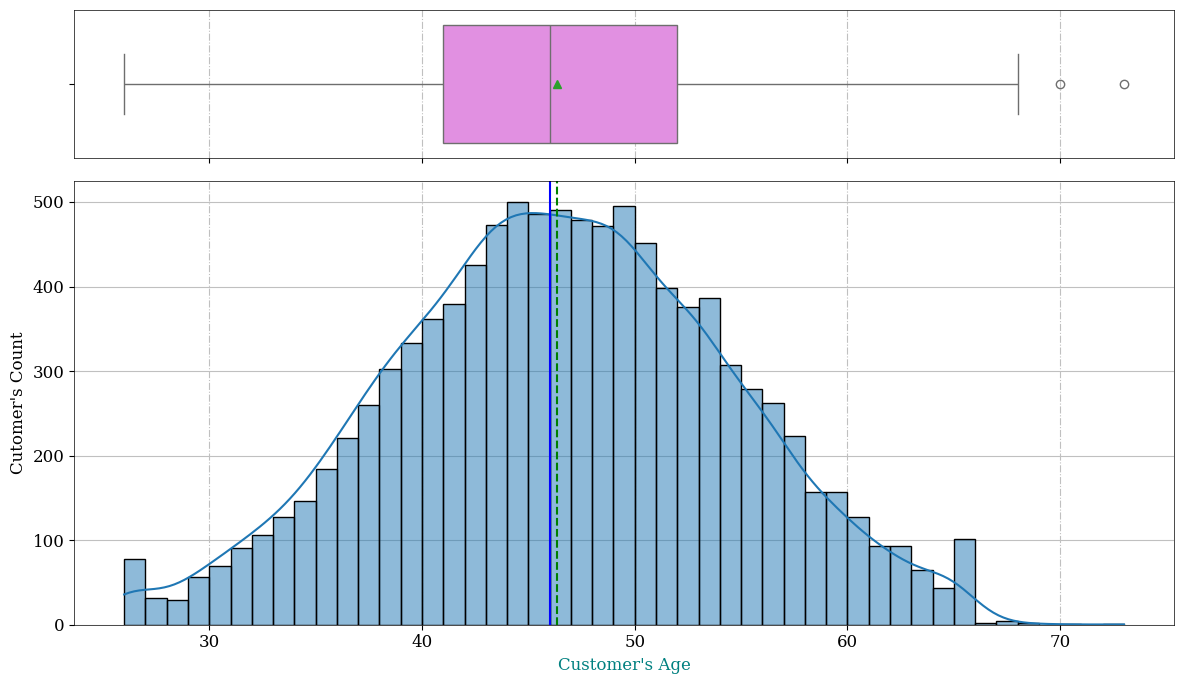

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
histogram_boxplot(data,'Customer_Age',kde=True,xlabel_text='Customer\'s Age',ylabel_text='Cutomer\'s Count')

**Observations:**
* It is observed that customer age variable is normally distributed with mean and median approx at 46 years.
* There some outliers at age 70+ but looks like realistice and consistent with data.

#### **Dependent_count**

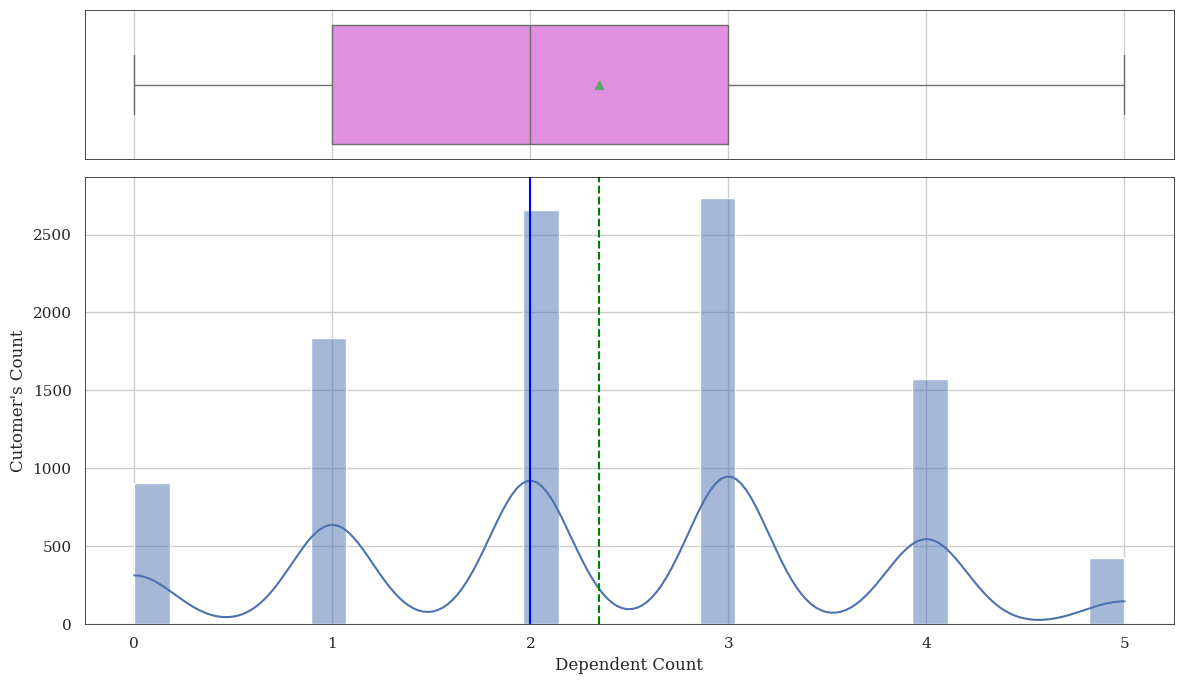

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
histogram_boxplot(data,'Dependent_count',kde=True,xlabel_text='Dependent Count',ylabel_text='Cutomer\'s Count')

**Observations:**
* The distribution of dependents is realistic with most customers having 2 or 3 dependents.
* The Mean is aprox 2.3 and Median is 2
* No ouliers observed.

#### **Months_on_book**

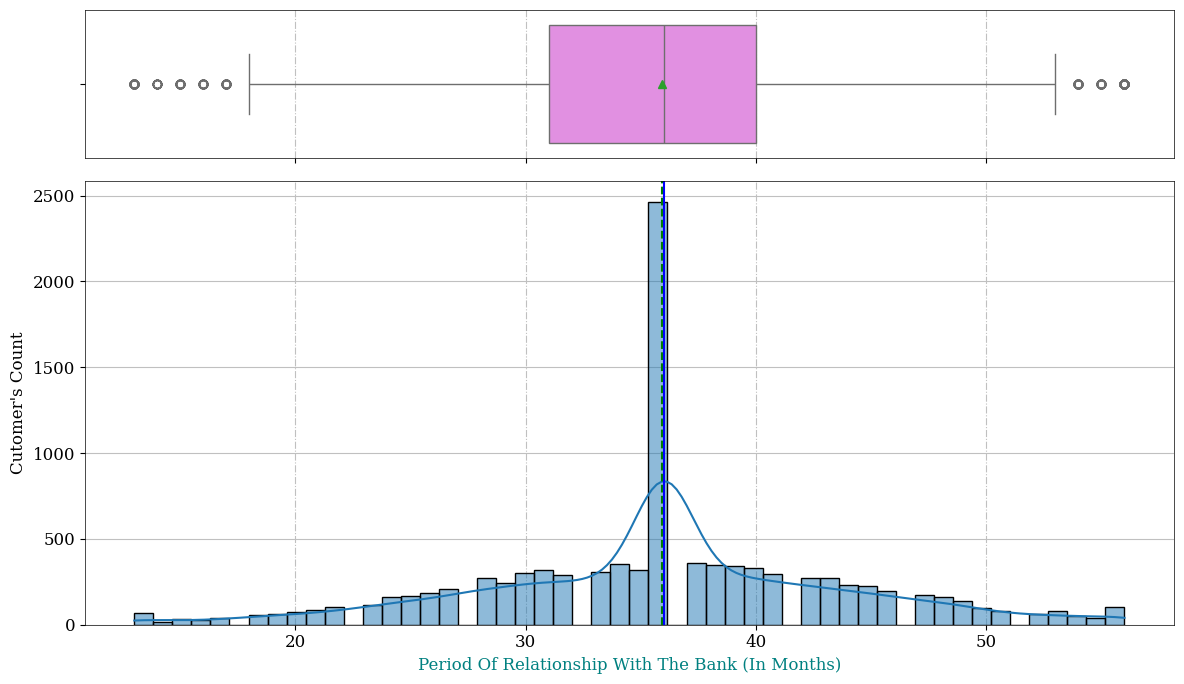

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
histogram_boxplot(data,'Months_on_book',kde=True,xlabel_text='Period Of Relationship With The Bank (In Months)',ylabel_text='Cutomer\'s Count')

**Observations:**
* The mean and median values are approx 36 months
* Most customers are with the bank for aprox 3 years.
* It is observed that there are outliers on both sides of the whiskers.

#### **Total_Relationship_Count**

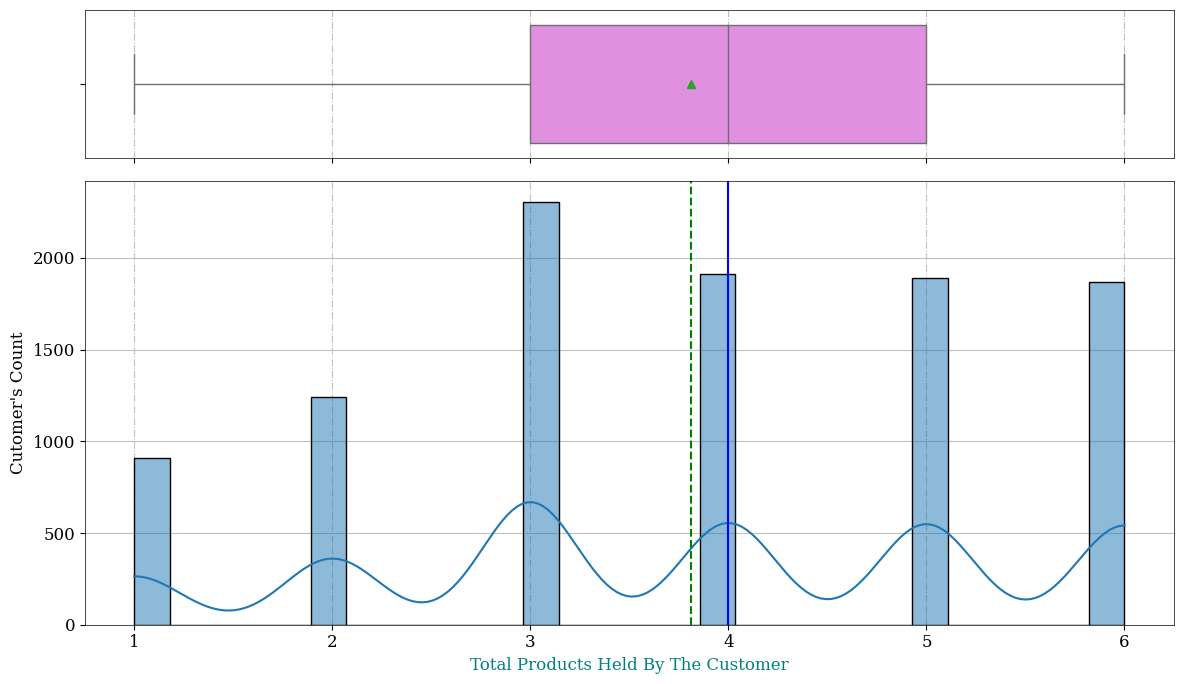

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
histogram_boxplot(data,'Total_Relationship_Count',kde=True,xlabel_text='Total Products Held By The Customer',ylabel_text='Cutomer\'s Count')

**Observations:**
* The majority of customers hold 3 products
* It is observed that the distribution slighly left skewed.
* It means that some customers hold a relatively small number of products, while most customers hold a larger number of products
* No outliers observed.

#### **Months_Inactive_12_mon**

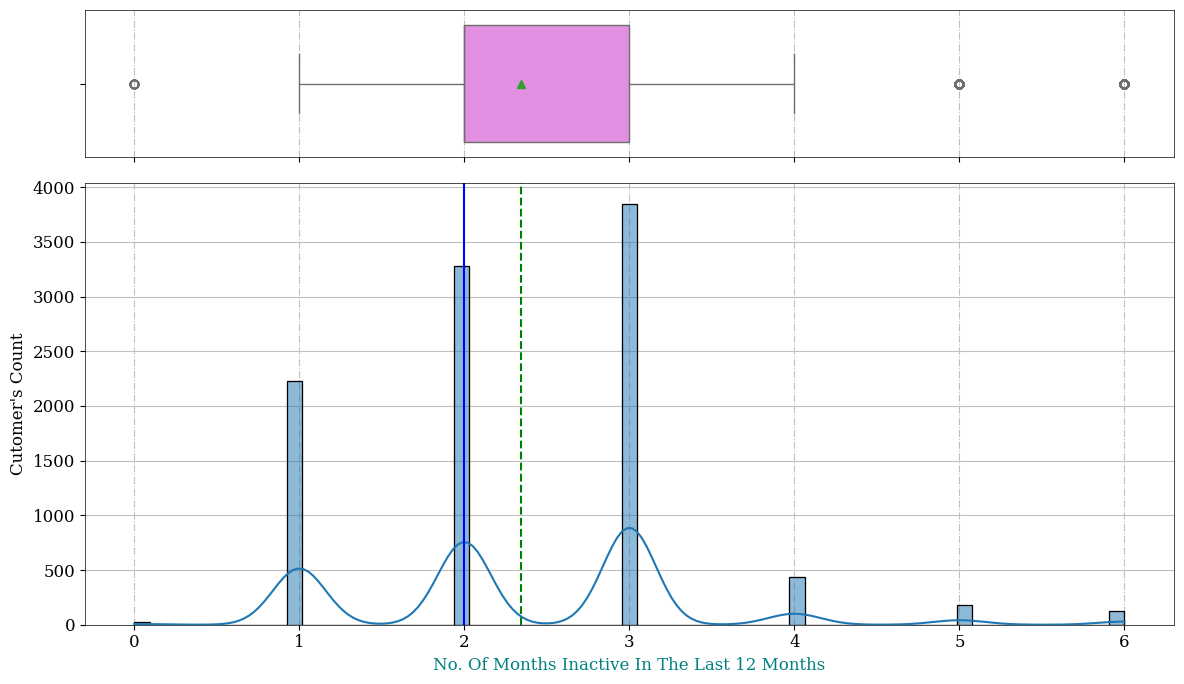

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
histogram_boxplot(data,'Months_Inactive_12_mon',kde=True,xlabel_text='No. Of Months Inactive In The Last 12 Months',ylabel_text='Cutomer\'s Count')

**Observations:**
* It shows a right skewed distribution with mean and median close to approx 2 months
* It indicates that most of the customers were inactive for more than 3 months.
* Outliers are observed on both sides of the whiskers but looks they are realistic.

#### **Contacts_Count_12_mon**

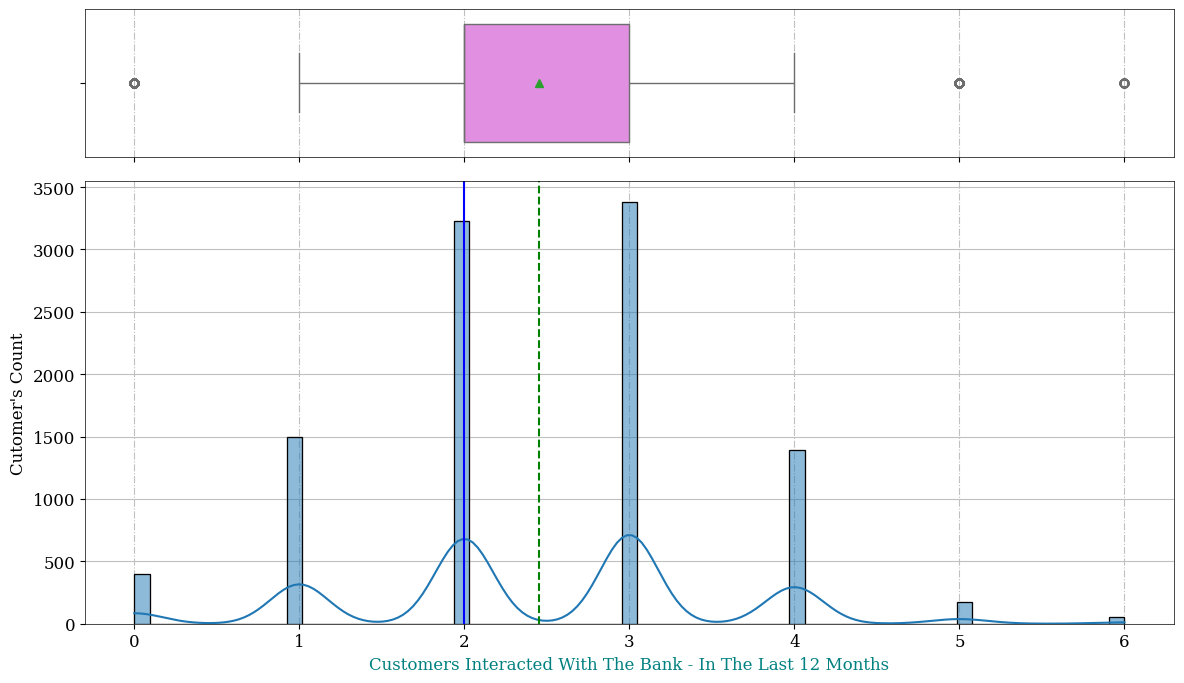

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
histogram_boxplot(data,'Contacts_Count_12_mon',kde=True,xlabel_text='Customers Interacted With The Bank - In The Last 12 Months',ylabel_text='Cutomer\'s Count')

**Observations:**
* Most of the customers interacted with the bank more less than 4 times in the past 12 months
* It indicates right skewed distribution and median close to 2 times.
* It means some of the customers interacted with the bank more that 3 times
* Some outliers are observed but loks like they are realistic.

#### **Credit_Limit**

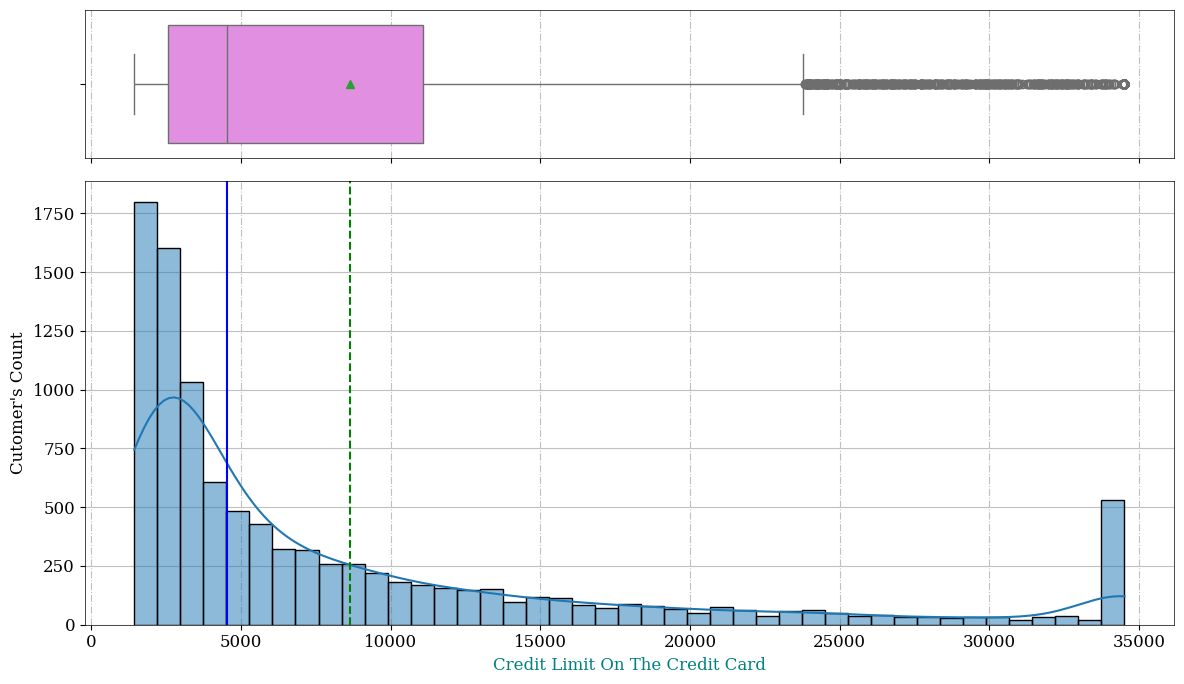

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
histogram_boxplot(data,'Credit_Limit',kde=True,xlabel_text='Credit Limit On The Credit Card',ylabel_text='Cutomer\'s Count')

**Observations:**
* The credit_limit variable shows a heavily right skewed distribution
* Mean is approx 8000 and Median is approx 4500
* There are some customers with a maximum Credit Limit of 35000
* Approx 50% of the customers have a credit limit less than < 5000

#### **Total_Revolving_Bal**

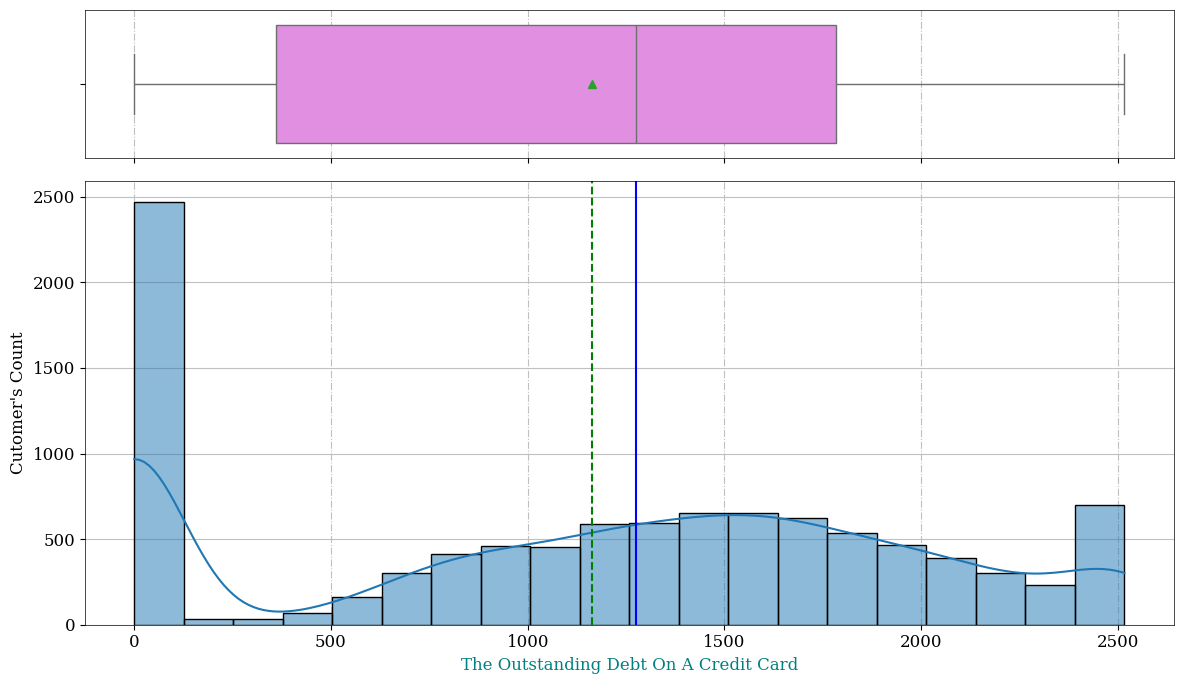

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
histogram_boxplot(data,'Total_Revolving_Bal',kde=True,xlabel_text='The Outstanding Debt On A Credit Card',ylabel_text='Cutomer\'s Count')

**Observations:**
* Most customers pay the complete dues of credit card and have 0 revolving balance.
* The customers with low credit limits to have no outstanding debt on credit card as compared to the customers with high credit limit.
* No outliers are observed.

#### **Avg_Open_To_Buy**

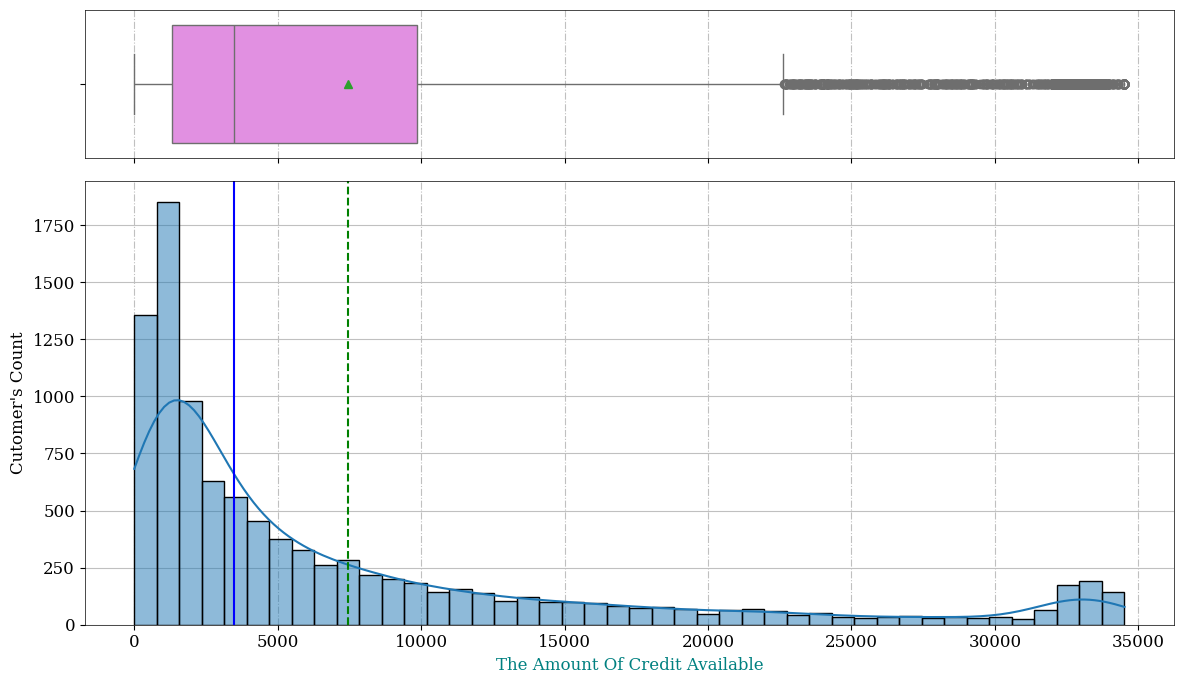

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
histogram_boxplot(data,'Avg_Open_To_Buy',kde=True,xlabel_text='The Amount Of Credit Available',ylabel_text='Cutomer\'s Count')

**Observations:**
* The Avg_Open_To_Buy variable distribution is heavily right skewed
* A right-skewed distribution indicates that most customers used lots of their credit limit while only a some of the customers (on the right tail) were left with a majority of their credit amount.

#### **Total_Amt_Chng_Q4_Q1**

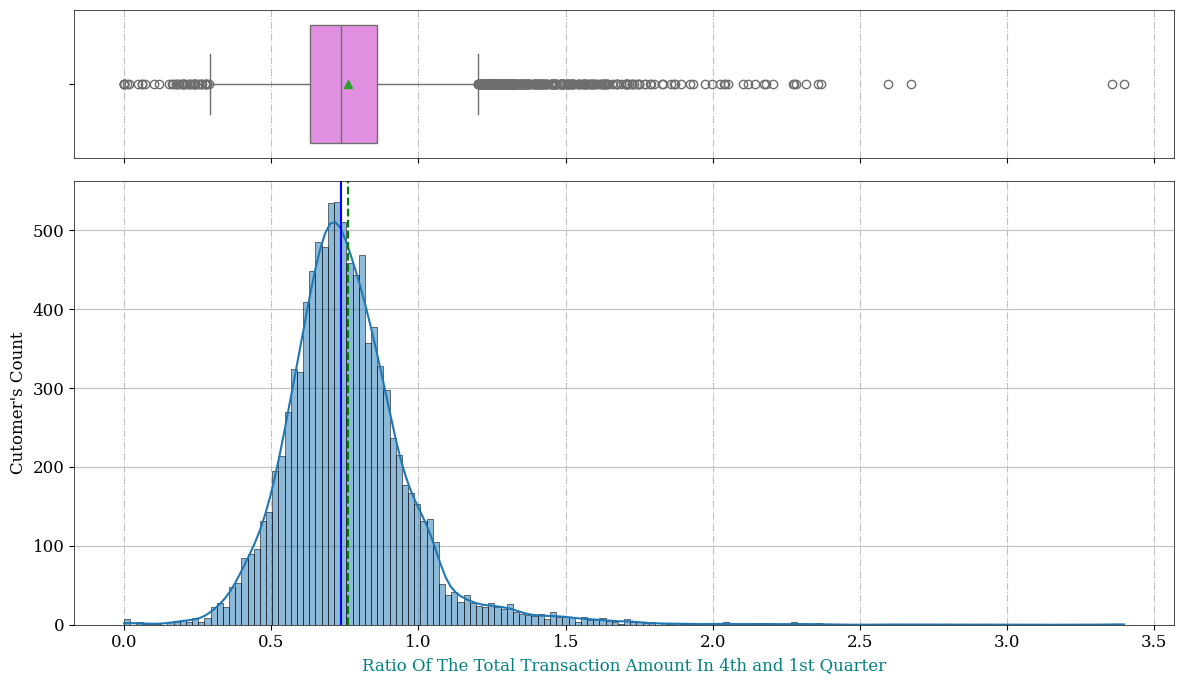

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
histogram_boxplot(data,'Total_Amt_Chng_Q4_Q1',kde=True,xlabel_text='Ratio Of The Total Transaction Amount In 4th and 1st Quarter',ylabel_text='Cutomer\'s Count')

**Observations:**
* The distribution of Total_Amt_Chng_Q4_Q1 is skew towards the right.
* This suggests that most customers experienced a relatively small change in transaction volume from Q4 to Q1, with only a few customers showing significantly higher changes in spending behavior.
* The outliers indicates that there are many customers whose change in transaction volume from Q4 to Q1 is much larger than the typical range observed in the dataset. These outliers could represent customers with unique spending habits, one-time large purchases, or irregular financial behavior.

#### **Total_Ct_Chng_Q4_Q1**

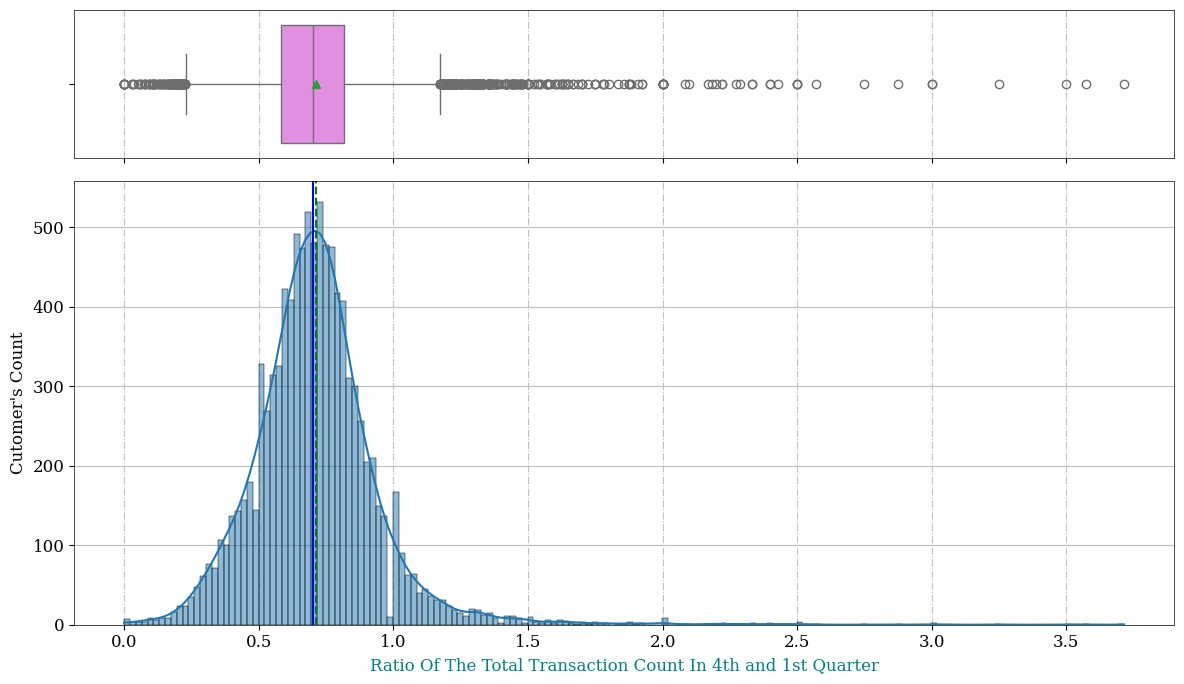

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
histogram_boxplot(data,'Total_Ct_Chng_Q4_Q1',kde=True,xlabel_text='Ratio Of The Total Transaction Count In 4th and 1st Quarter',ylabel_text='Cutomer\'s Count')

**Observations:**
* As observed earlier, the Total_Ct_Chng_Q4_Q1 variable is showing a similar distribution to the Total_Amt_Chng_Q4_Q1 which is a right skewed and with outliers.

#### **Total_Trans_Amt**

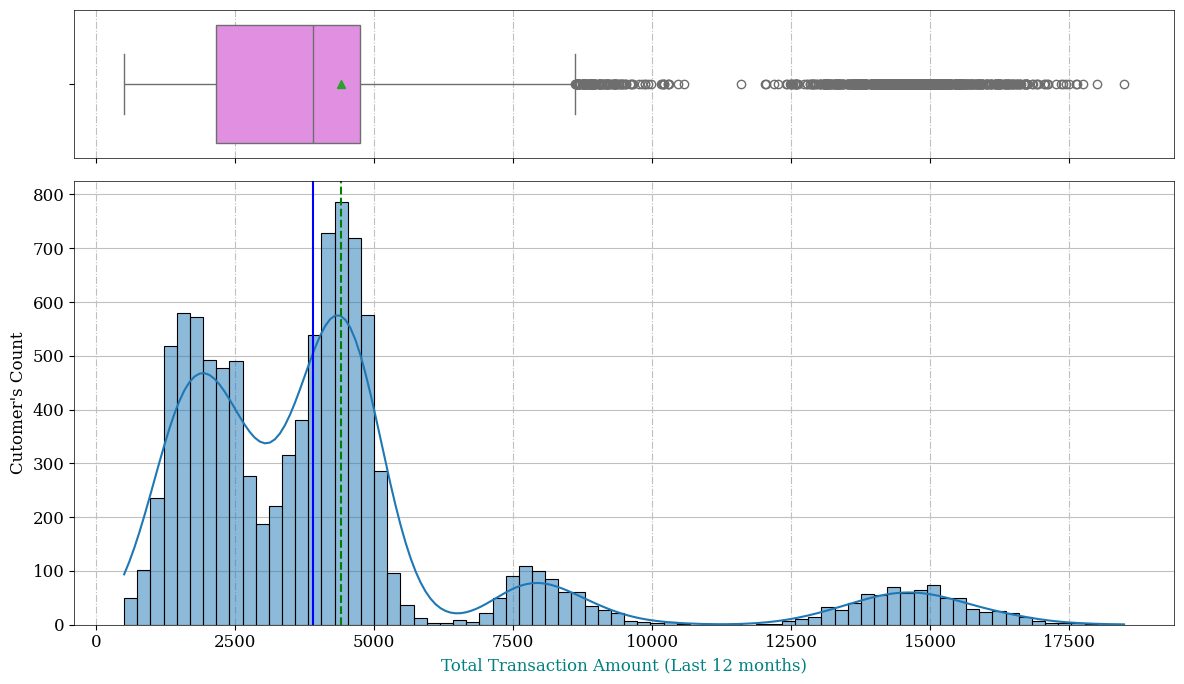

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
histogram_boxplot(data,'Total_Trans_Amt',kde=True,xlabel_text='Total Transaction Amount (Last 12 months)',ylabel_text='Cutomer\'s Count')

**Observations:**
* It suggests the presence of multiple modes or clusters within the data. Each peak represents a distinct group or segment of customers with different transaction amounts. These peaks can indicate various patterns or behaviors among credit card users

#### **Total_Trans_Ct**

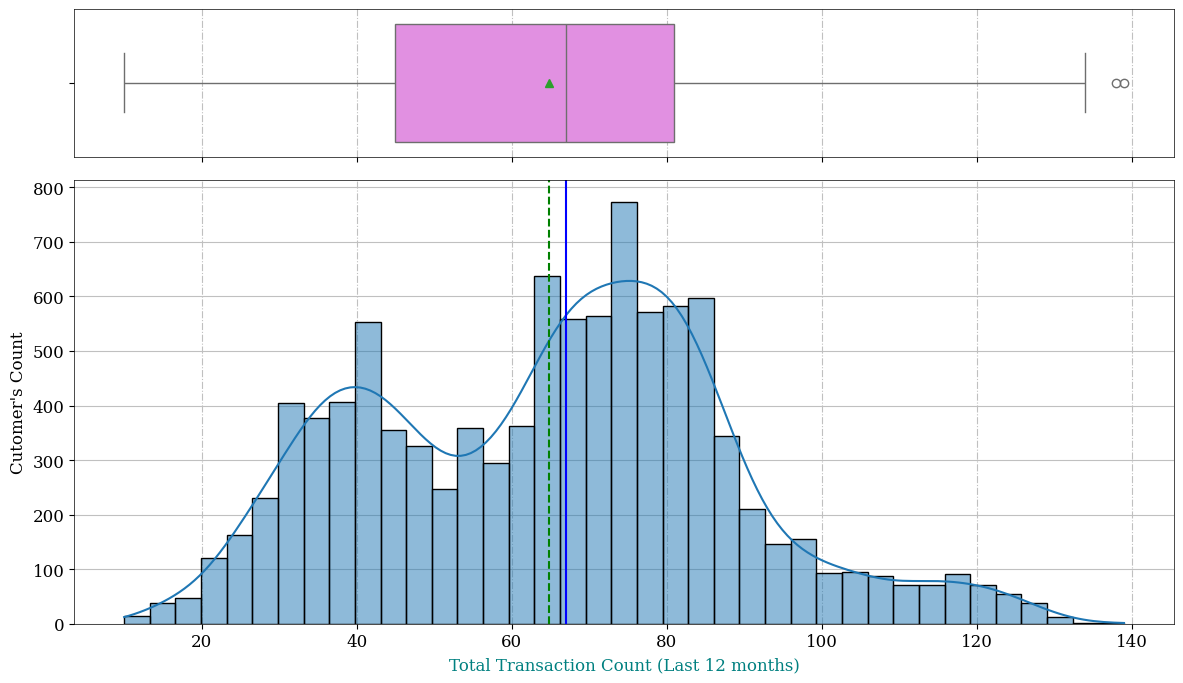

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
histogram_boxplot(data,'Total_Trans_Ct',kde=True,xlabel_text='Total Transaction Count (Last 12 months)',ylabel_text='Cutomer\'s Count')

**Observations:**
* The Total_Trans_Ct variable shows normal distribution as compared to the total Total_Trans_Amt variable.
* There are few outliers observed

#### **Avg_Utilization_Ratio**

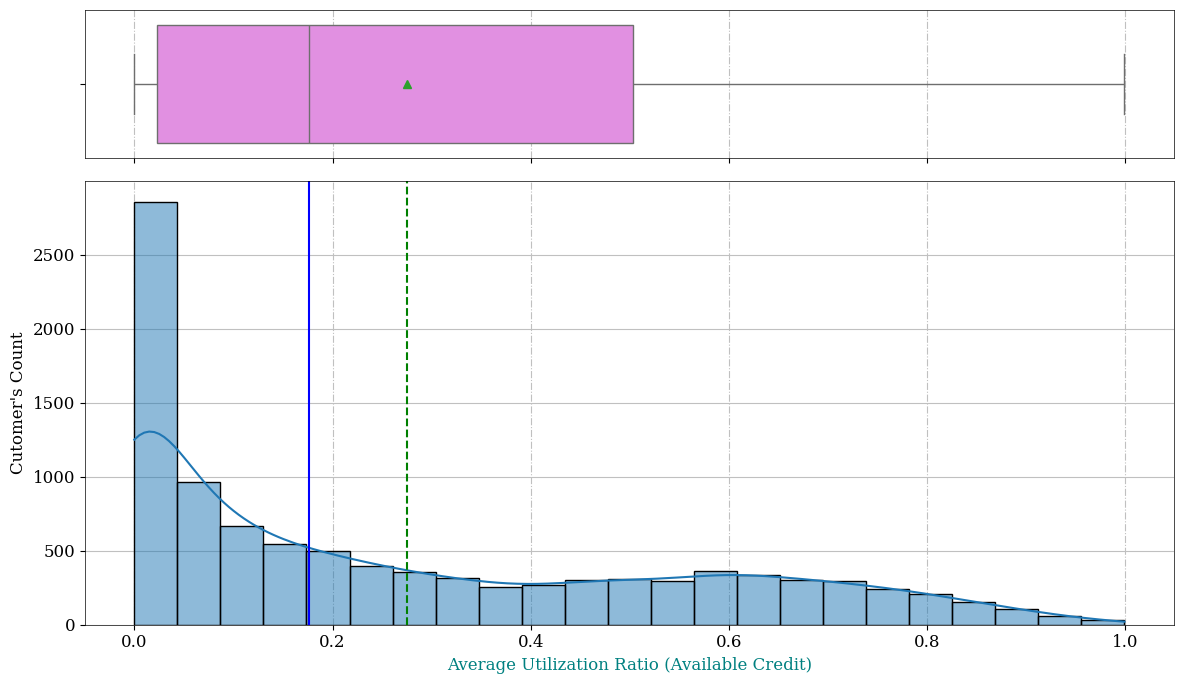

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
histogram_boxplot(data,'Avg_Utilization_Ratio',kde=True,xlabel_text='Average Utilization Ratio (Available Credit)',ylabel_text='Cutomer\'s Count')

**Observations:**
* The distribution of Avg_Utilization_Ratio is skewed to the right.
* This distribution is not a positive as most of the customers are not utilizing their credit amount.

### **B.Visualizing the categorical data**

It is observed that 'Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category' are categorical

In [ ]:
#displaying the categorical variables
categorical = list(data.select_dtypes(include=['O']).columns)
categorical

['Attrition_Flag',
 'Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### **Attrition_Flag**

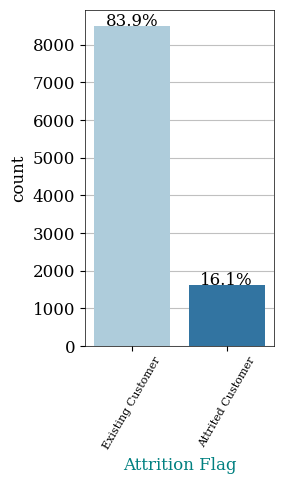

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
labeled_barplot(data, "Attrition_Flag", perc=True,xticks_labels=('Existing Customer','Attrited Customer'),xlabel_text='Attrition Flag',xtext_rotation=60)

**Observations:**
* This indicates an imbalance in the data.

#### **Gender**

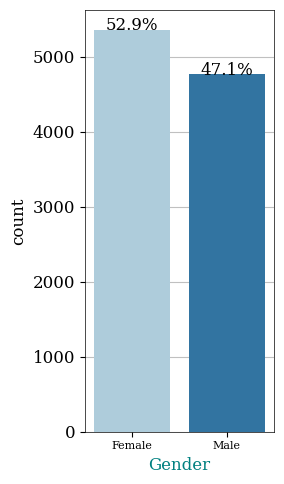

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
labeled_barplot(data, "Gender", perc=True,xticks_labels=('Female','Male'),xlabel_text='Gender',xtext_rotation=0)

**Observations:**
* The majority of bank customers are Females approx 53%

#### **Education_Level**

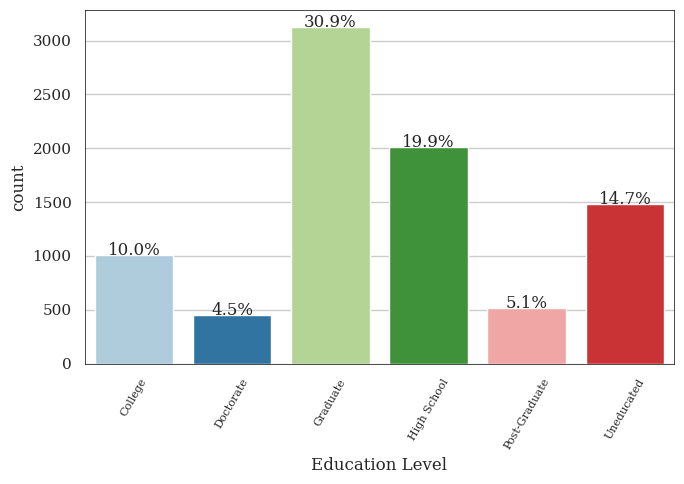

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
labeled_barplot(data, "Education_Level", perc=True,xticks_labels=('College','Doctorate','Graduate','High School','Post-Graduate','Uneducated'),xlabel_text='Education Level',xtext_rotation=60)

**Observations:**
* 30.9% of the customers are graduates, followed by 19.9% of the customers who completed high school.
* Approx 15% of missing value in Education_Level column

#### **Marital_Status**

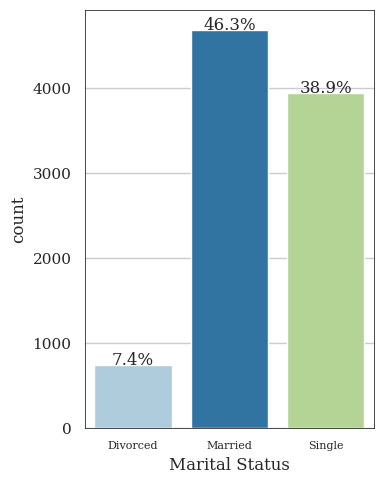

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
labeled_barplot(data, "Marital_Status", perc=True,xticks_labels=('Divorced','Married','Single'),xlabel_text='Marital Status',xtext_rotation=0)

**Observations:**
* 46.3% of the customers are Married, followed by 38.9% of Single customers.
* Approx 7.4% of missing value in Marital_Status column

#### **Income_Category**

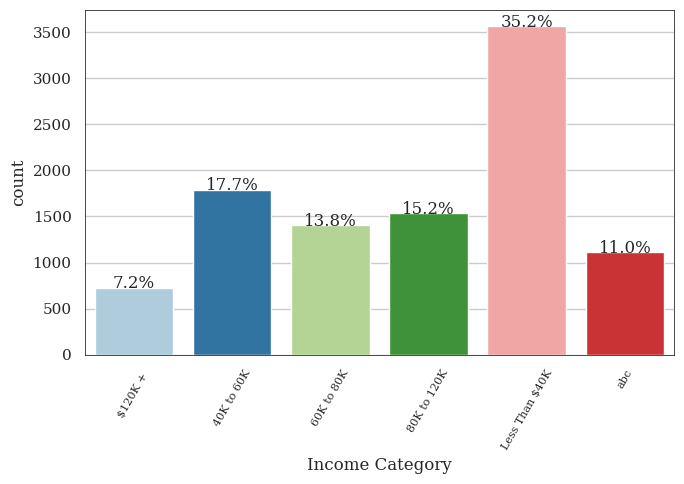

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
labeled_barplot(data, "Income_Category", perc=True,xticks_labels=('$120K + ','40K to 60K','60K to 80K','80K to 120K','Less Than $40K','abc'),xlabel_text='Income Category',xtext_rotation=60)

**Observations:**
* 35.2% of the customers lie in the Less than 40k income category group, followed by 17.7% of the customers in the 40k-60k income group.
* 11% of missing value in Income_Category column

#### **Card_Category**

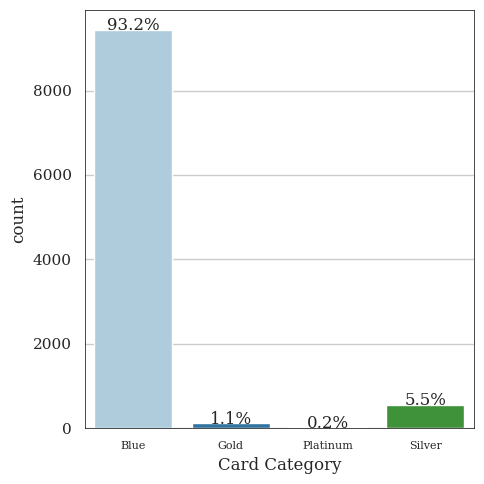

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
labeled_barplot(data, "Card_Category", perc=True,xticks_labels=('Blue','Gold','Platinum','Silver'),xlabel_text='Card Category',xtext_rotation=0)

**Observations:**
* 93.2% of the customers have the Blue card.
* Blue card would be a default or basic card given by the bank to all its customers.

## **Bivariate analysis**

### A) Plotting relationship between Attrition_Flag and Numerical Variables

#### **Customer_Age Vs Attrition_Flag**

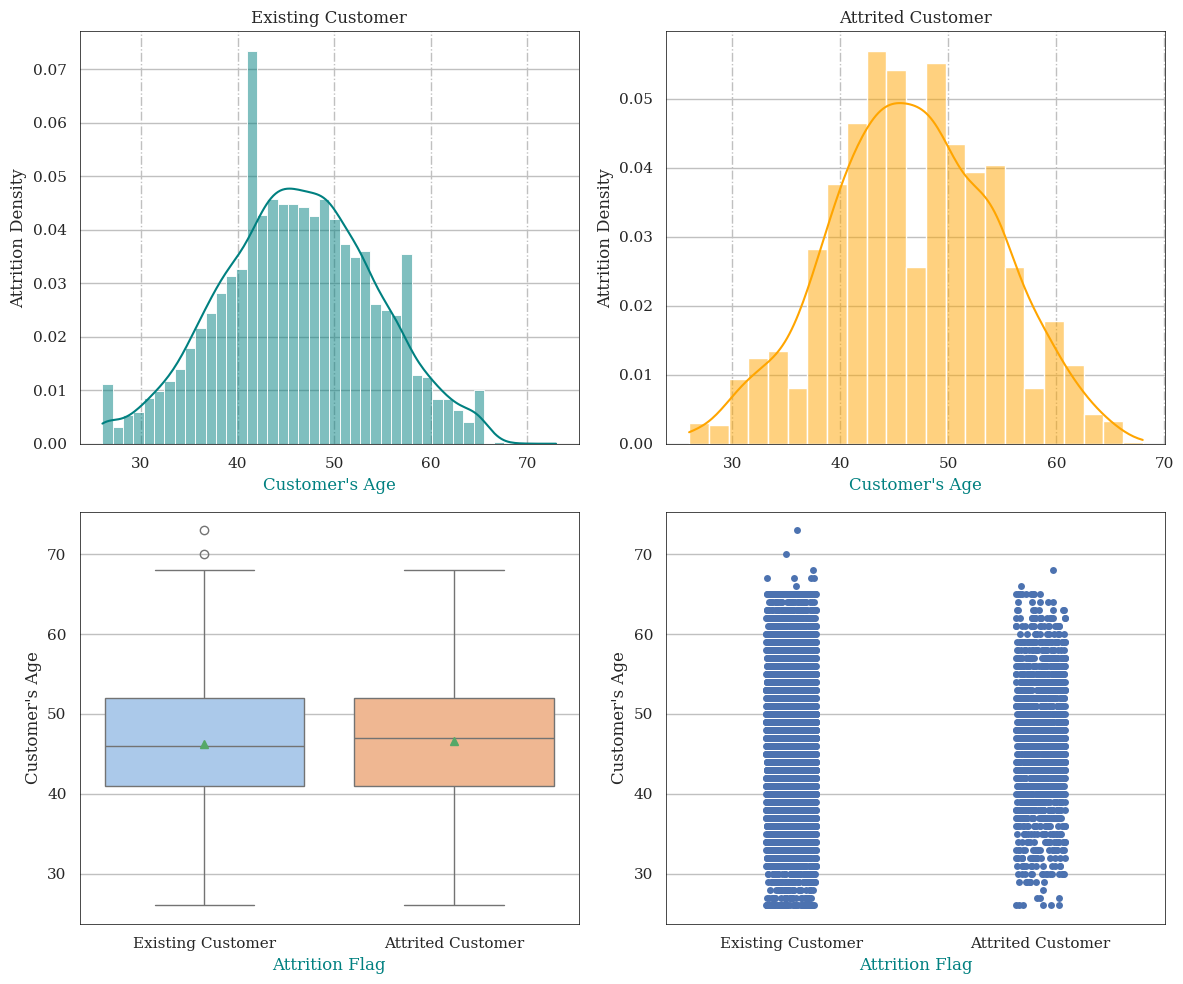

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
investigate_explanatory_response_var(data,'Customer_Age','Attrition_Flag',explanatory_label='Customer\'s Age')

**Observations:**
* There's no difference in the age of customers who attrited and who didn't.

#### **Attrition_Flag Vs Months_on_book**

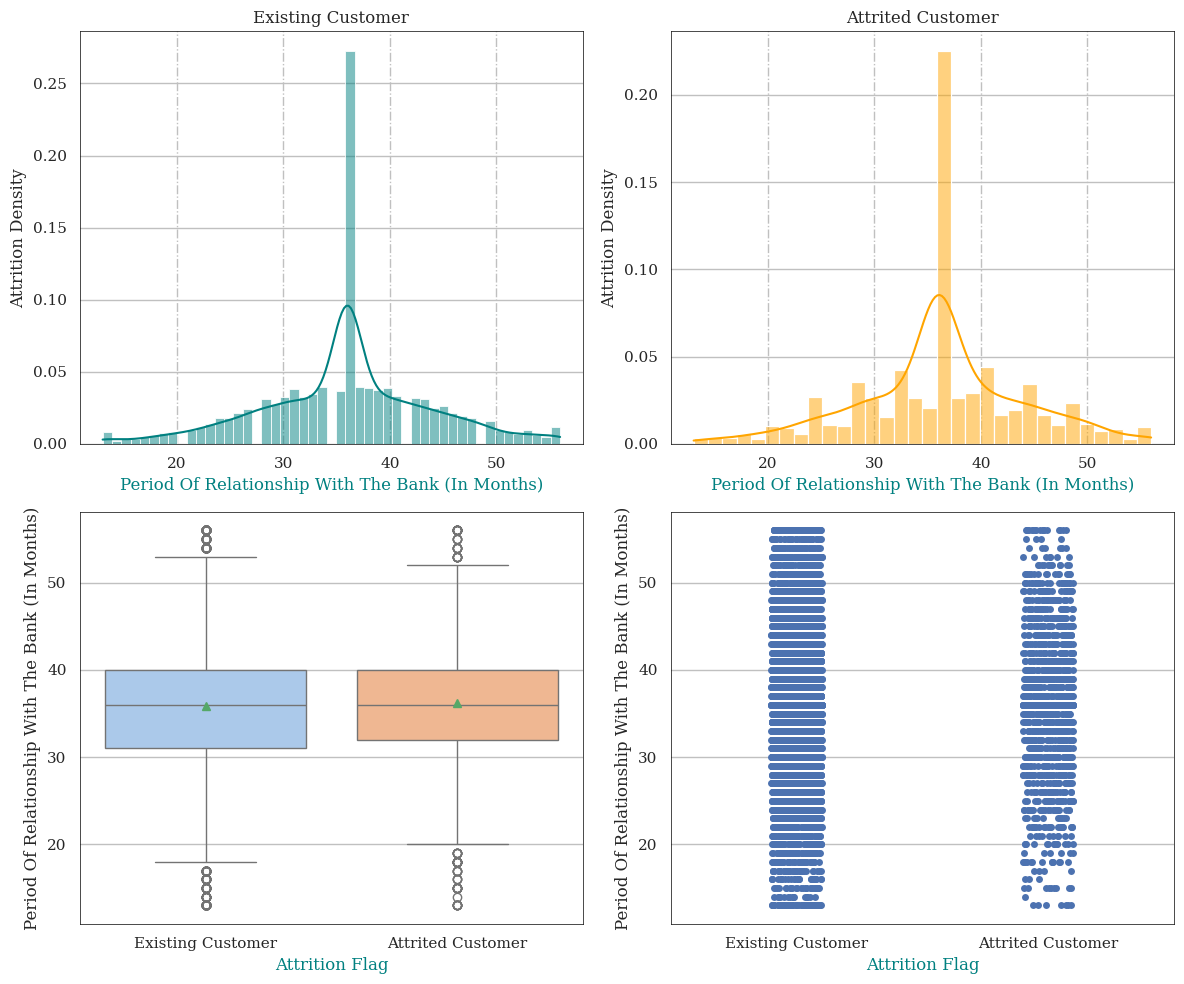

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
investigate_explanatory_response_var(data,'Months_on_book','Attrition_Flag',explanatory_label='Period Of Relationship With The Bank (In Months)')

**Observations:**
* Tenure of relationship with the bank doesn't seem to have an impact on attrition.

#### **Attrition_Flag Vs Credit_Limit**

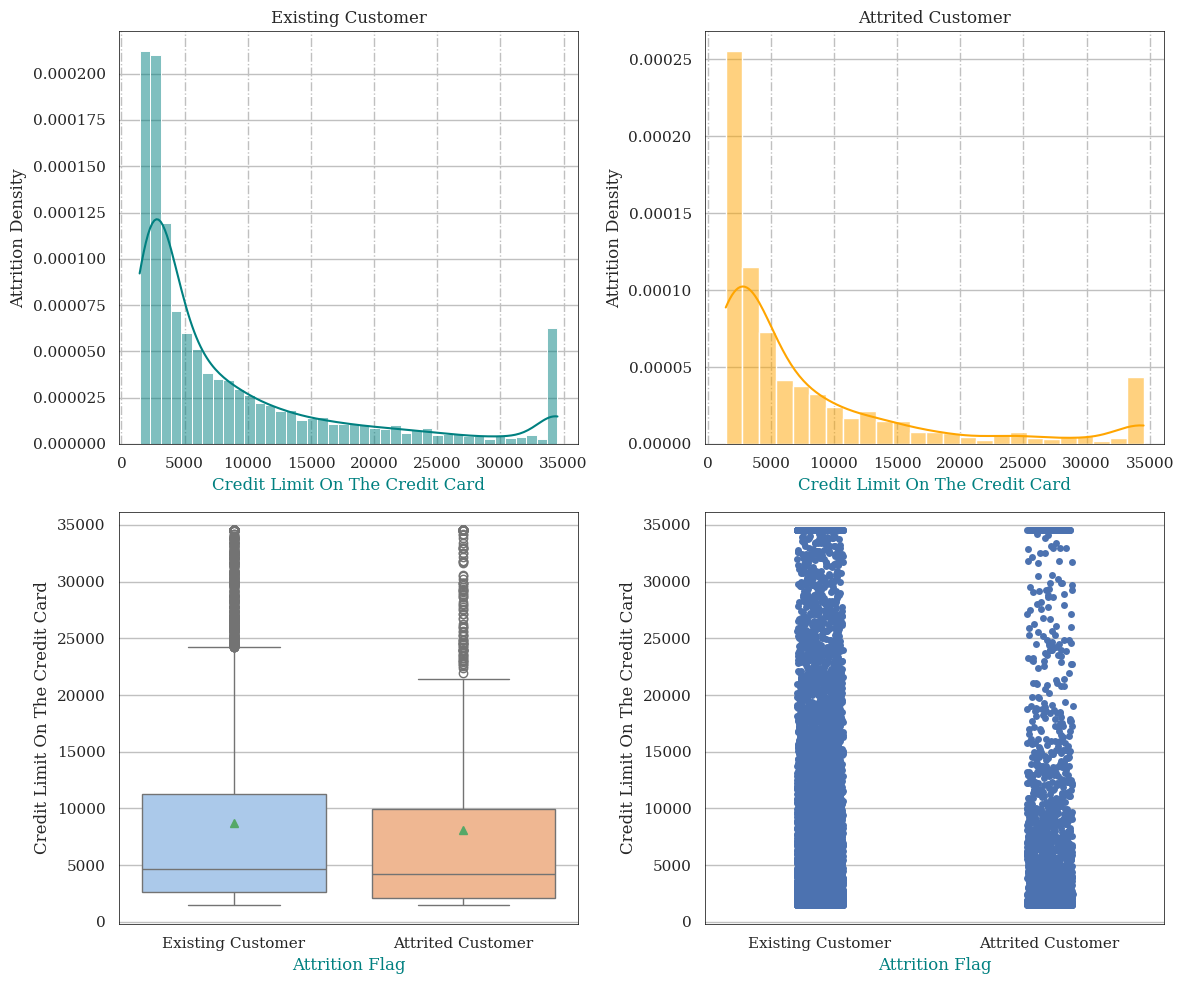

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
investigate_explanatory_response_var(data,'Credit_Limit','Attrition_Flag',explanatory_label='Credit Limit On The Credit Card')

**Observations:**
* Customers with lower credit limits are mostly attrited.

#### **Attrition_Flag Vs Total_Revolving_Bal**

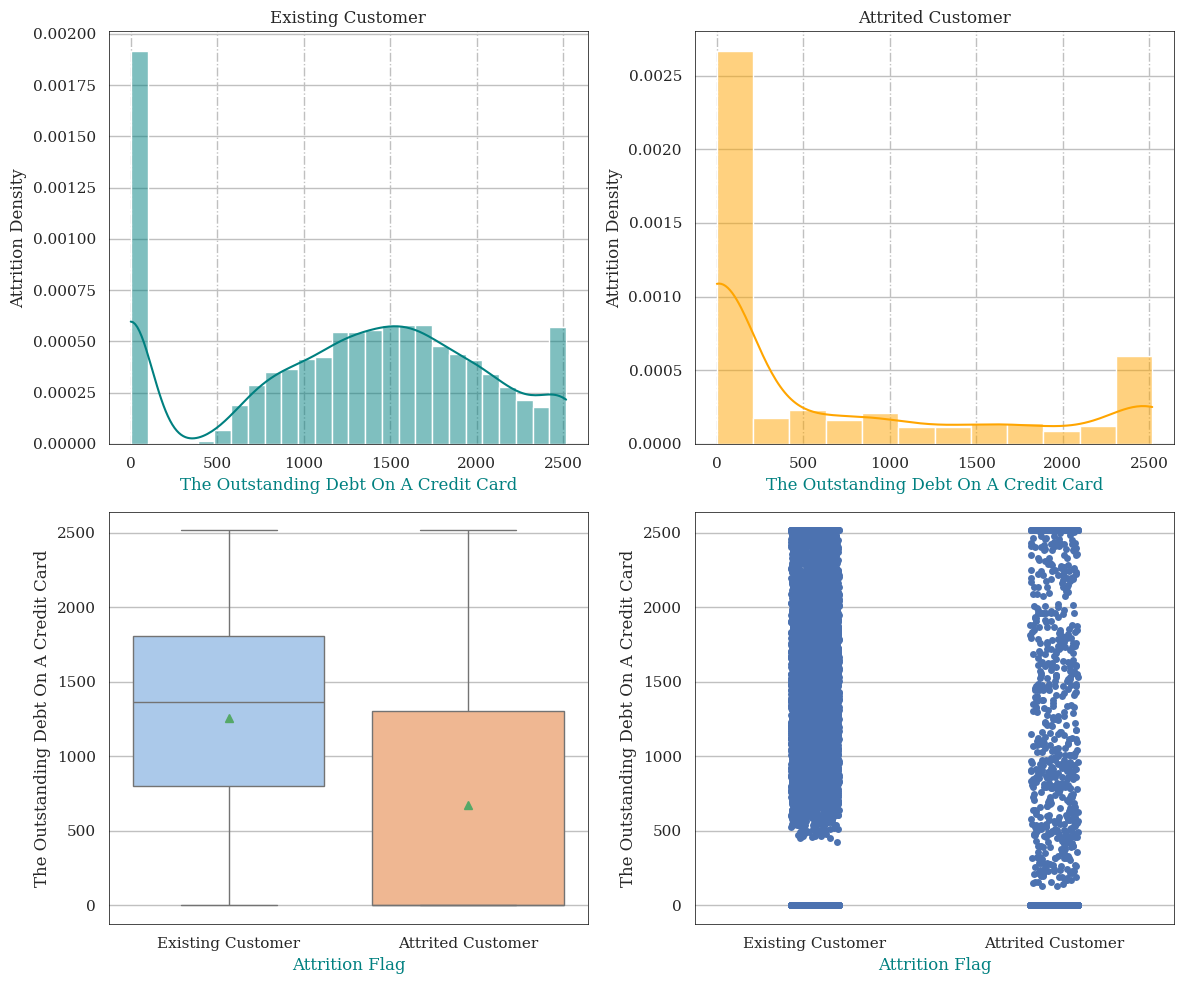

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
investigate_explanatory_response_var(data,'Total_Revolving_Bal','Attrition_Flag',explanatory_label='The Outstanding Debt On A Credit Card')

**Observations:**
* Customers with less oustanding debt on credit card are the ones who attrited

#### **Attrition_Flag Vs Avg_Open_To_Buy**

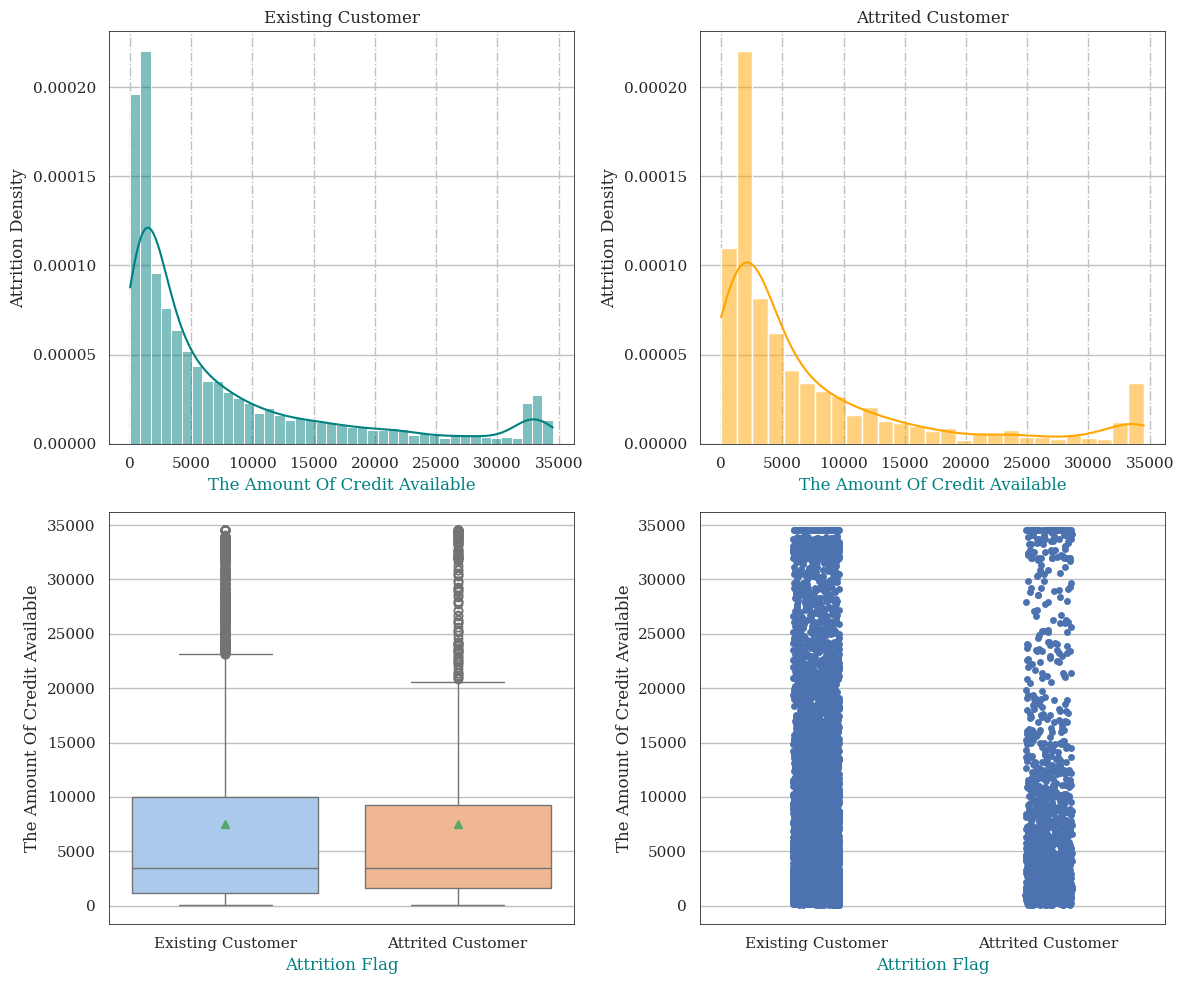

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
investigate_explanatory_response_var(data,'Avg_Open_To_Buy','Attrition_Flag',explanatory_label='The Amount Of Credit Available')

**Observations:**
* There's not much difference in the distribution.

#### **Attrition_Flag Vs Total_Trans_Ct**

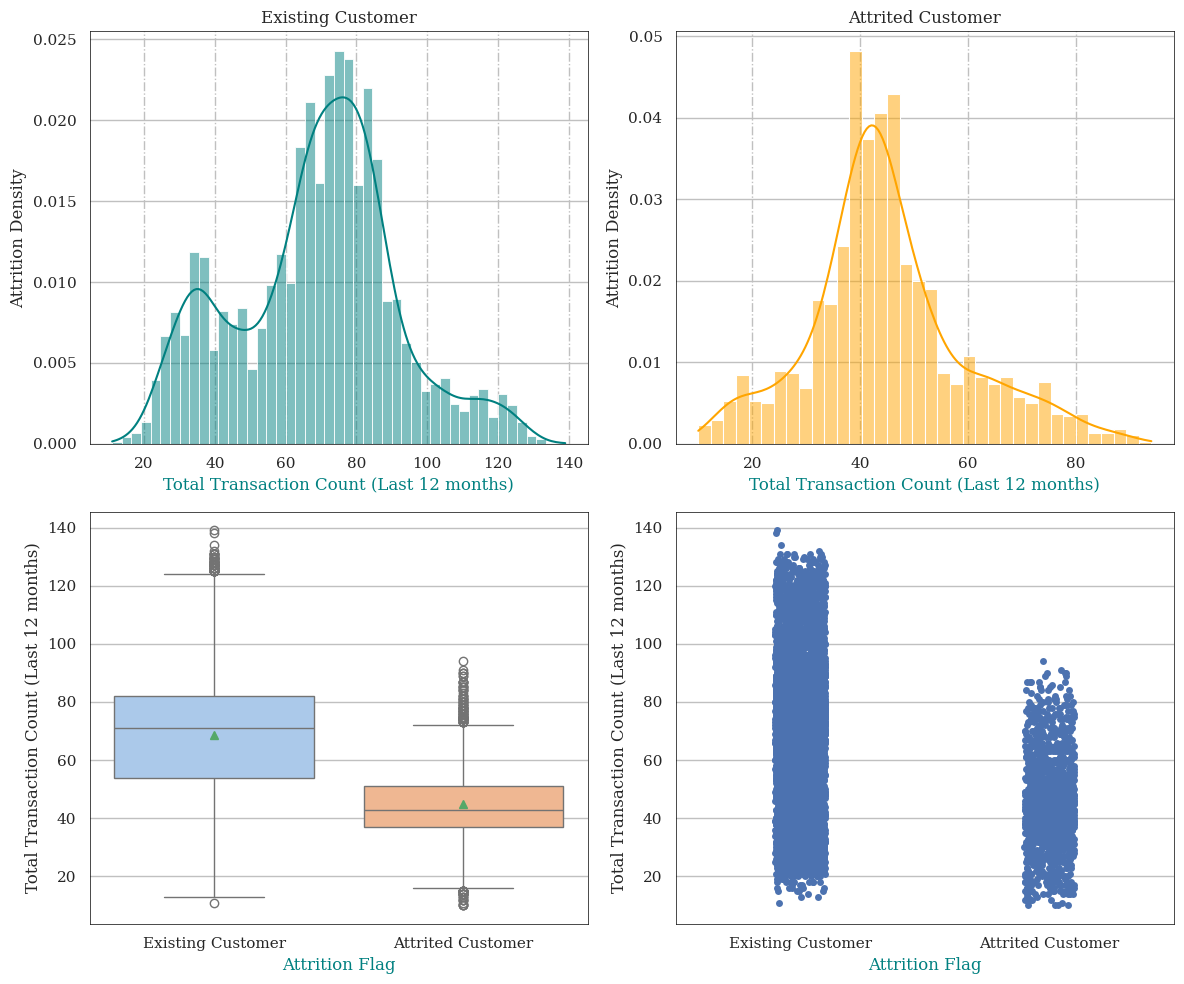

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
investigate_explanatory_response_var(data,'Total_Trans_Ct','Attrition_Flag',explanatory_label='Total Transaction Count (Last 12 months)')

**Observations:**
* Less number of transactions observed for attrited customers.
* Reuired more attention to the Customers with less than 80 to 100 transactions in a year.

#### **Attrition_Flag Vs Total_Trans_Amt**

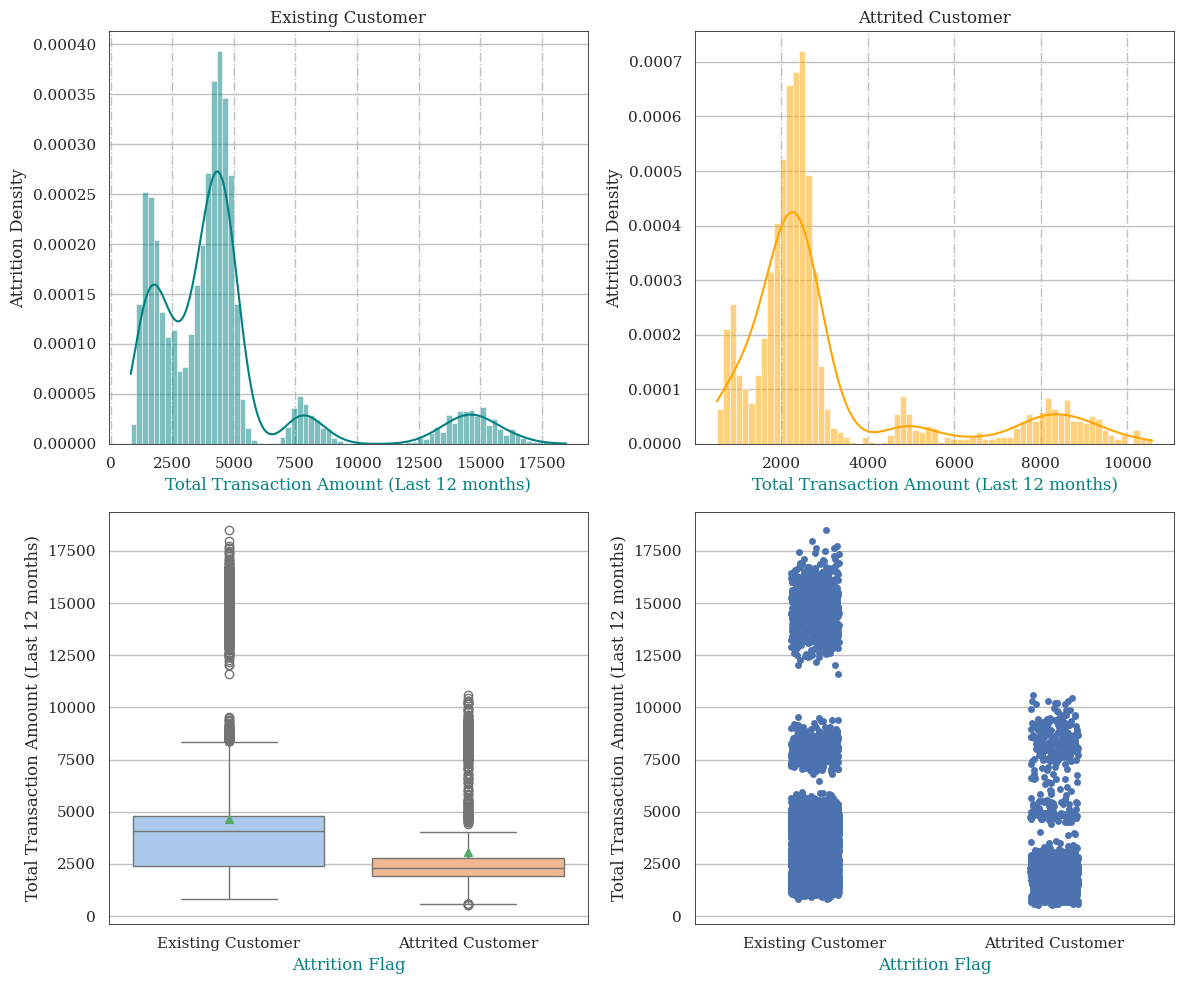

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
investigate_explanatory_response_var(data,'Total_Trans_Amt','Attrition_Flag',explanatory_label='Total Transaction Amount (Last 12 months)')

**Observations:**
* Because of the less number of transactions there is less transaction amount and eventually leading to customer attrition.

#### **Attrition_Flag Vs Total_Amt_Chng_Q4_Q1**

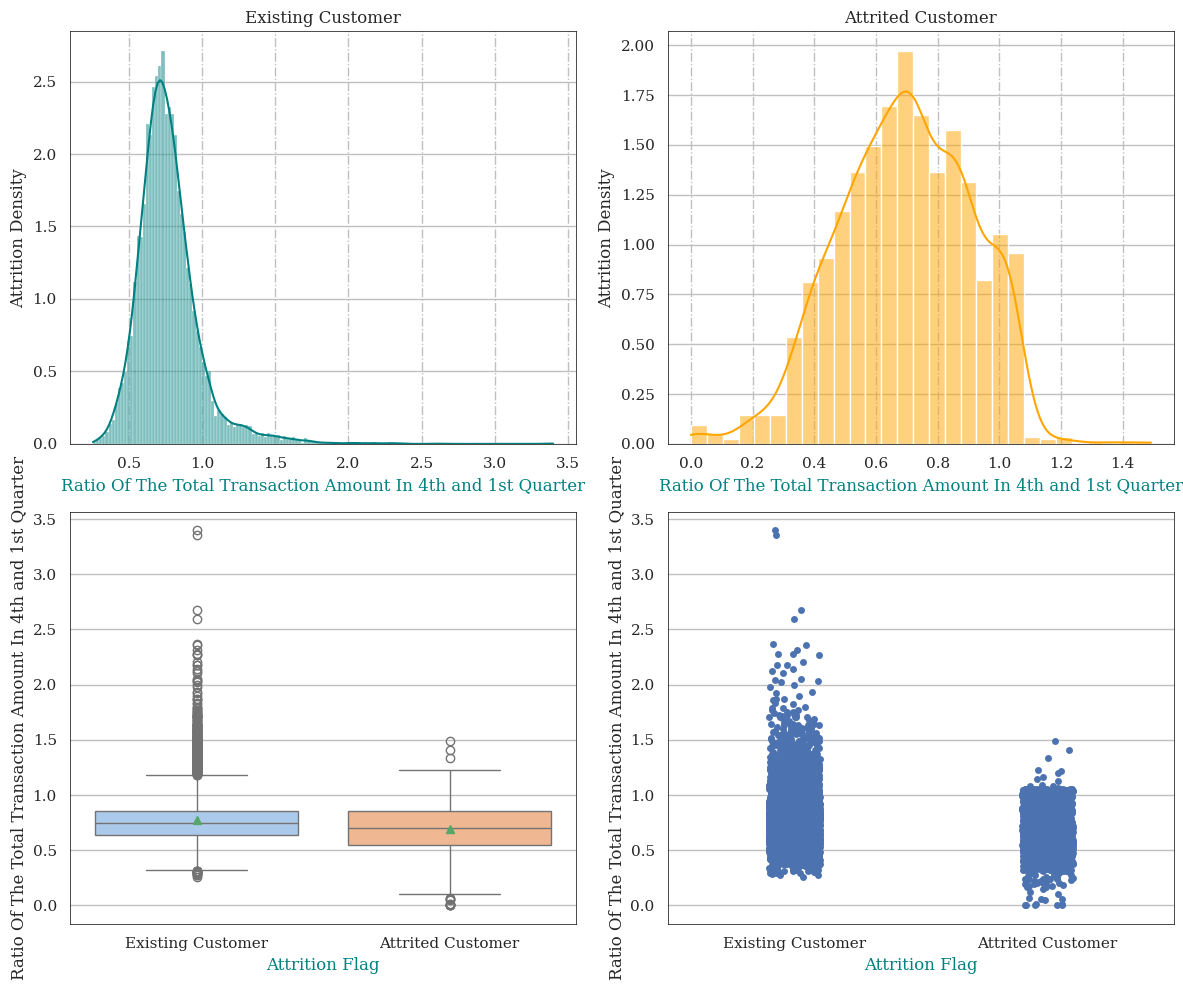

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
investigate_explanatory_response_var(data,'Total_Amt_Chng_Q4_Q1','Attrition_Flag',explanatory_label='Ratio Of The Total Transaction Amount In 4th and 1st Quarter')

**Observations:**
* The existing customers showed less variability across Q4 to Q1 as compared to the ones who are attrited.

#### **Attrition_Flag Vs Total_Ct_Chng_Q4_Q1**

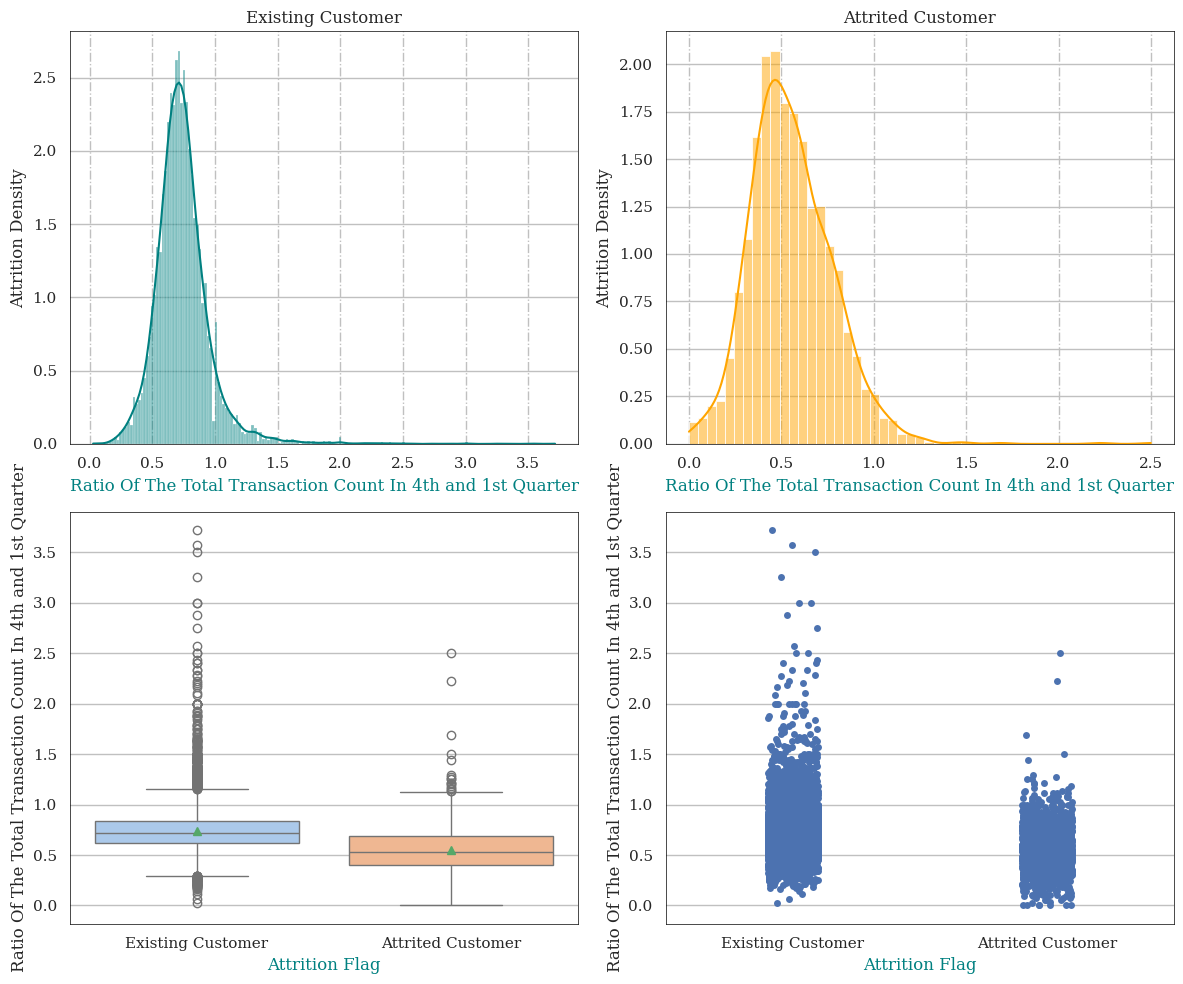

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
investigate_explanatory_response_var(data,'Total_Ct_Chng_Q4_Q1','Attrition_Flag',explanatory_label='Ratio Of The Total Transaction Count In 4th and 1st Quarter')

**Observations:**
* It observed that the existing customers showing significantly higher changes in spending behavior as compare to the attrited customers.

#### **Attrition_Flag Vs Avg_Utilization_Ratio**

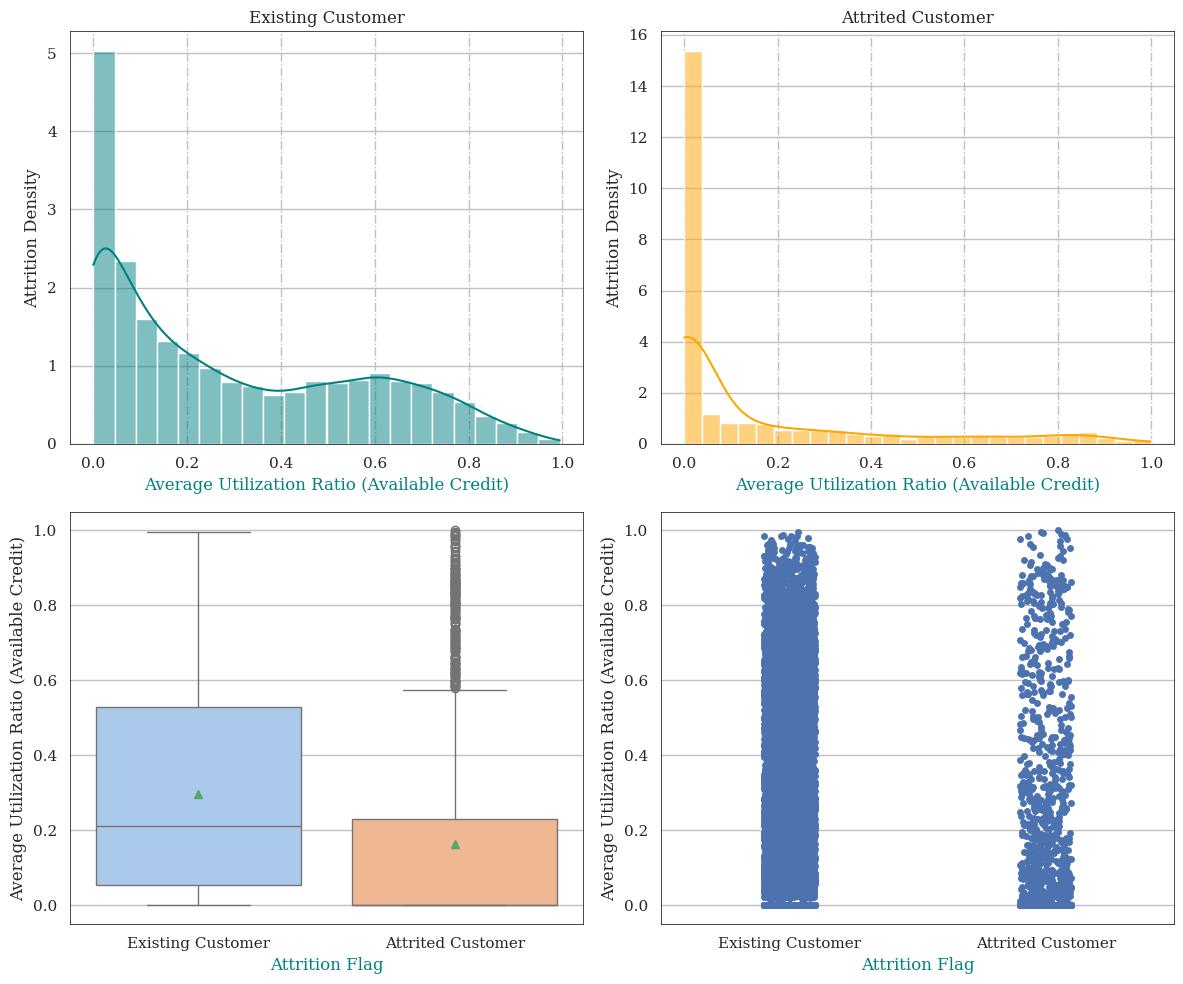

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
investigate_explanatory_response_var(data,'Avg_Utilization_Ratio','Attrition_Flag',explanatory_label='Average Utilization Ratio (Available Credit)')

**Observations:**
* It is observed that less utilization of the available credits by existing customers  

### B) Plotting relationship between Attrition_Flag and Categorical Variables

#### **Attrition_Flag Vs Gender**

------------------------------------------------------------------------------------------------------------------------
Attrition_Flag  Attrited Customer  Existing Customer  Total
Gender                                                     
Total                        1627               8500  10127
F                             930               4428   5358
M                             697               4072   4769
------------------------------------------------------------------------------------------------------------------------


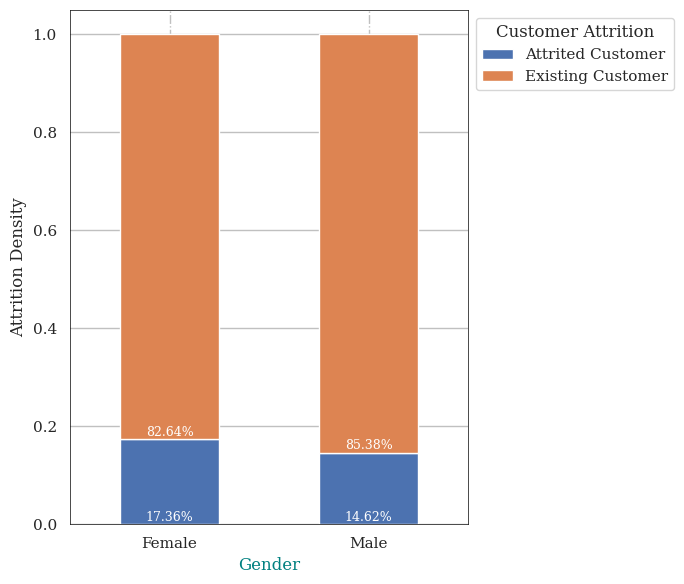

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
categorical_graph(data,'Gender','Attrition_Flag',explanatory_label='Gender',legend_title='Customer Attrition',xticks_labels=('Female','Male'))

**Observations:**
* Its observed that, not much difference in attrition percentages for Males and Females.

#### **Attrition_Flag Vs Marital_Status**

------------------------------------------------------------------------------------------------------------------------
Attrition_Flag  Attrited Customer  Existing Customer  Total
Marital_Status                                             
Total                        1498               7880   9378
Married                       709               3978   4687
Single                        668               3275   3943
Divorced                      121                627    748
------------------------------------------------------------------------------------------------------------------------


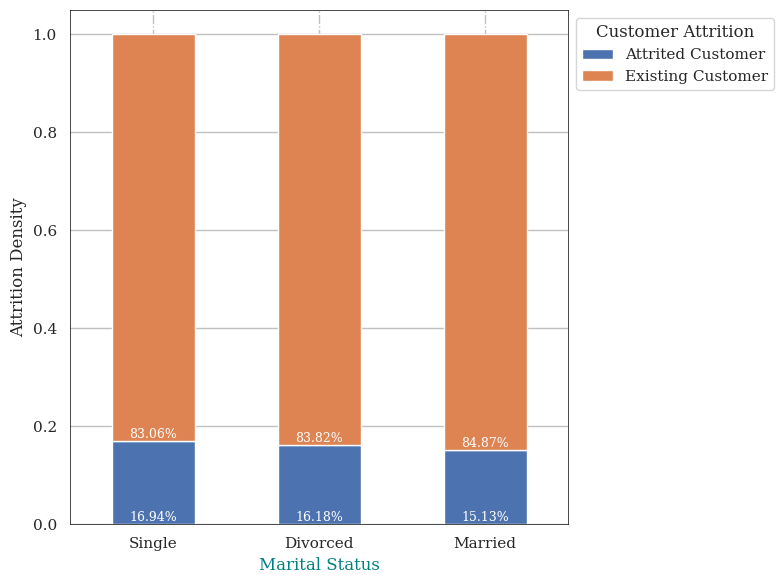

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
categorical_graph(data,'Marital_Status','Attrition_Flag',explanatory_label='Marital Status',legend_title='Customer Attrition')

**Observations:**
* Not much difference in attrition percentages for Marital_Status

#### **Attrition_Flag Vs Education_Level**

------------------------------------------------------------------------------------------------------------------------
Attrition_Flag   Attrited Customer  Existing Customer  Total
Education_Level                                             
Total                         1371               7237   8608
Graduate                       487               2641   3128
High School                    306               1707   2013
Uneducated                     237               1250   1487
College                        154                859   1013
Doctorate                       95                356    451
Post-Graduate                   92                424    516
------------------------------------------------------------------------------------------------------------------------


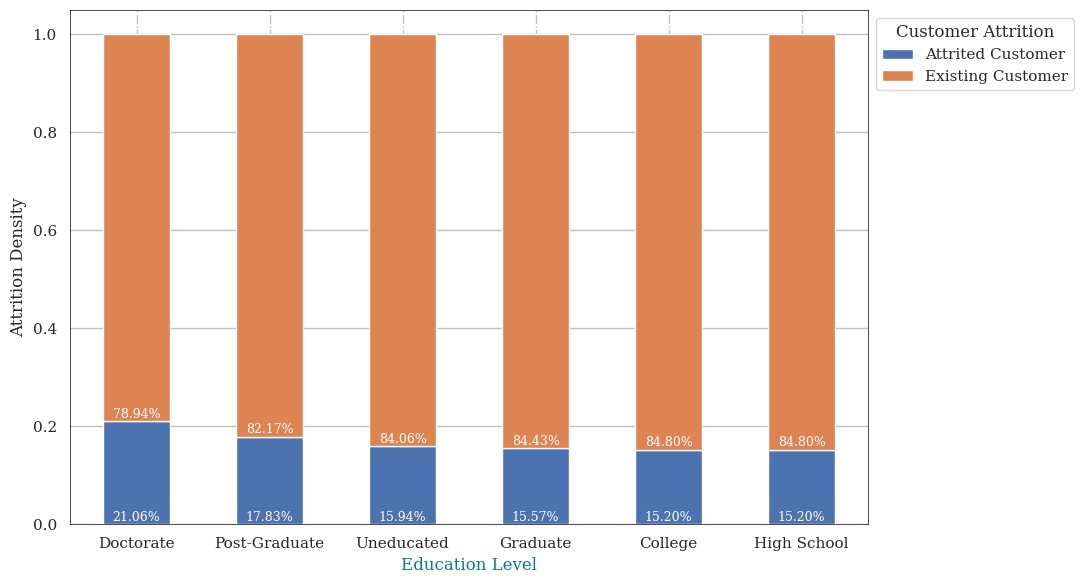

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
categorical_graph(data,'Education_Level','Attrition_Flag',explanatory_label='Education Level',legend_title='Customer Attrition')

**Observations:**
* The most customer attrition  observed with higher education level (Doctorates and Post Graduates)

#### **Attrition_Flag Vs Income_Category**

------------------------------------------------------------------------------------------------------------------------
Attrition_Flag   Attrited Customer  Existing Customer  Total
Income_Category                                             
Total                         1627               8500  10127
Less than $40K                 612               2949   3561
$40K - $60K                    271               1519   1790
$80K - $120K                   242               1293   1535
$60K - $80K                    189               1213   1402
abc                            187                925   1112
$120K +                        126                601    727
------------------------------------------------------------------------------------------------------------------------


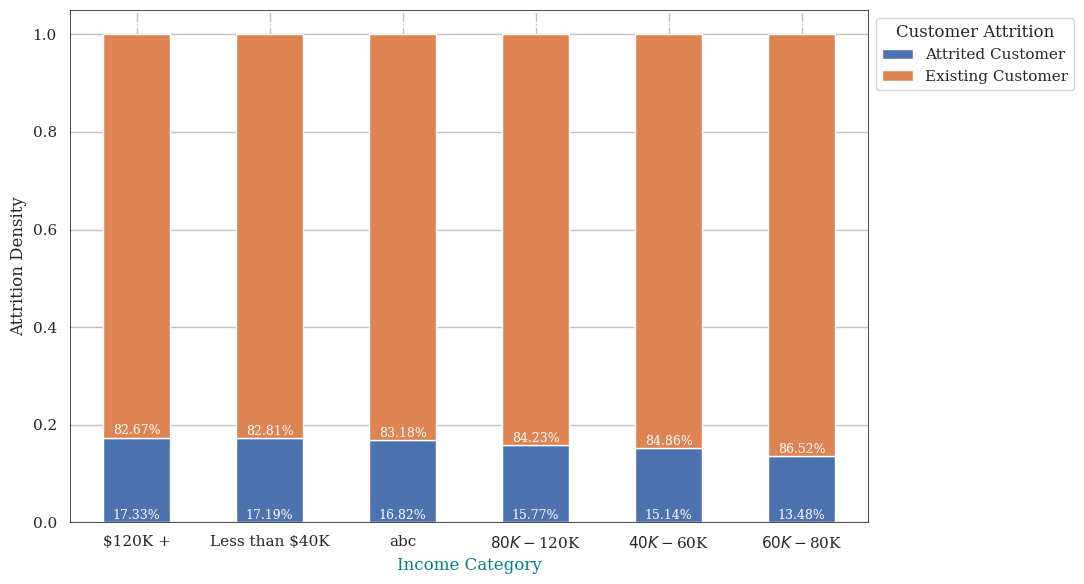

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
categorical_graph(data,'Income_Category','Attrition_Flag',explanatory_label='Income Category',legend_title='Customer Attrition')

**Observations:**
* Not much difference in attrition percentages for Income_Category
* "abc" is the missing value in Income_Category column.

#### **Attrition_Flag Vs Card_Category**

------------------------------------------------------------------------------------------------------------------------
Attrition_Flag  Attrited Customer  Existing Customer  Total
Card_Category                                              
Total                        1627               8500  10127
Blue                         1519               7917   9436
Silver                         82                473    555
Gold                           21                 95    116
Platinum                        5                 15     20
------------------------------------------------------------------------------------------------------------------------


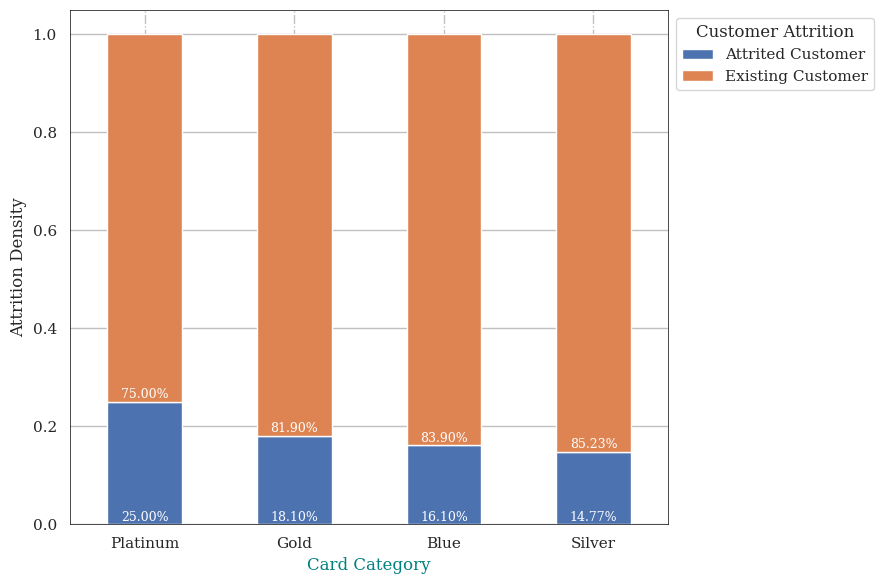

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
categorical_graph(data,'Card_Category','Attrition_Flag',explanatory_label='Card Category',legend_title='Customer Attrition')

**Observations:**
* The customers holding Platinum and Gold cards are considered premium customers, but they also have the highest attrition rate.

### C) Plotting relationship for other Variables

#### **Attrition_Flag Vs Contacts_Count_12_mon**

------------------------------------------------------------------------------------------------------------------------
Attrition_Flag         Attrited Customer  Existing Customer  Total
Contacts_Count_12_mon                                             
Total                               1627               8500  10127
3                                    681               2699   3380
2                                    403               2824   3227
4                                    315               1077   1392
1                                    108               1391   1499
5                                     59                117    176
6                                     54                  0     54
0                                      7                392    399
------------------------------------------------------------------------------------------------------------------------


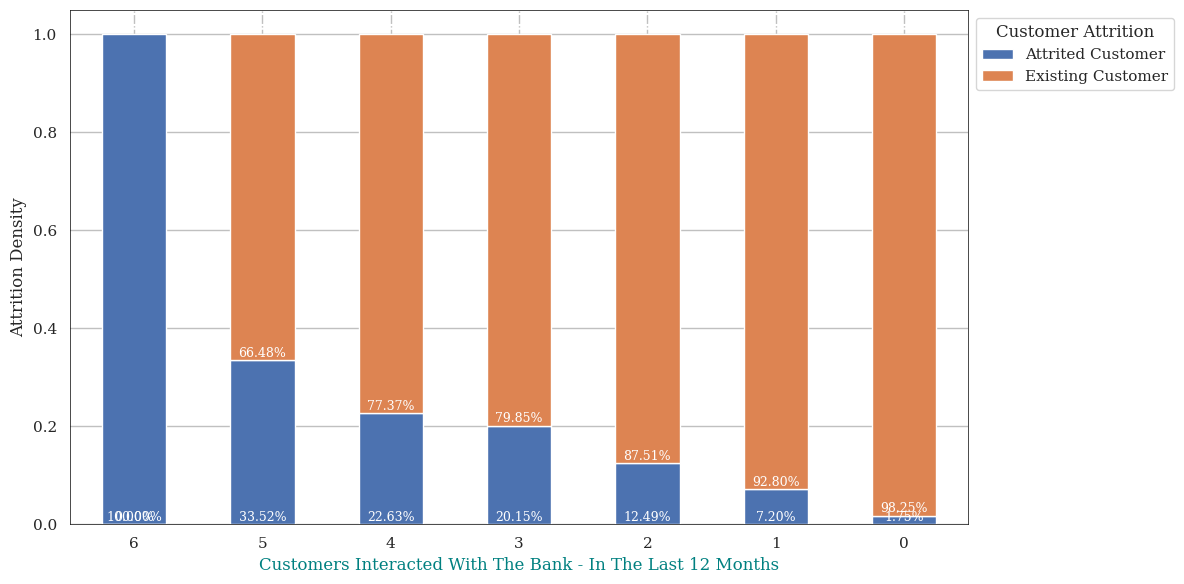

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
categorical_graph(data,'Contacts_Count_12_mon','Attrition_Flag',explanatory_label='Customers Interacted With The Bank - In The Last 12 Months',legend_title='Customer Attrition')

**Observations:**
* The customers who engage in frequent interactions with the bank are experiencing the highest attrition rate.

#### **Attrition_Flag Vs Total_Relationship_Count**

------------------------------------------------------------------------------------------------------------------------
Attrition_Flag            Attrited Customer  Existing Customer  Total
Total_Relationship_Count                                             
Total                                  1627               8500  10127
3                                       400               1905   2305
2                                       346                897   1243
1                                       233                677    910
5                                       227               1664   1891
4                                       225               1687   1912
6                                       196               1670   1866
------------------------------------------------------------------------------------------------------------------------


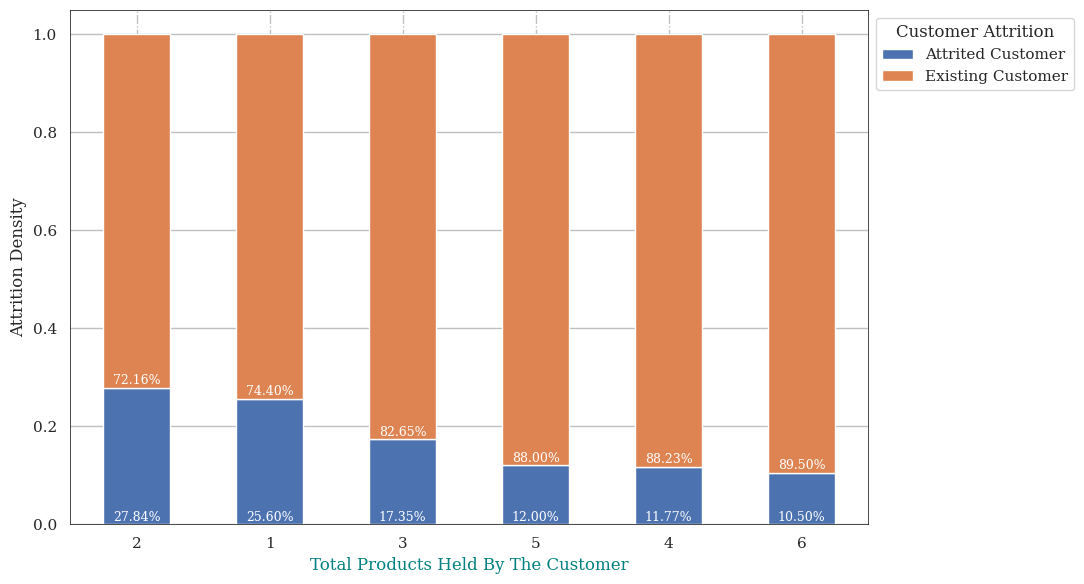

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
categorical_graph(data,'Total_Relationship_Count','Attrition_Flag',explanatory_label='Total Products Held By The Customer',legend_title='Customer Attrition')

**Observations:**
* The customers with a lower number of bank products (1 or 2) have the highest attrition rate.
* Lower number of products (1 and 2) attrition 53.44%

#### **Attrition_Flag Vs Dependent_count**

------------------------------------------------------------------------------------------------------------------------
Attrition_Flag   Attrited Customer  Existing Customer  Total
Dependent_count                                             
Total                         1627               8500  10127
3                              482               2250   2732
2                              417               2238   2655
1                              269               1569   1838
4                              260               1314   1574
0                              135                769    904
5                               64                360    424
------------------------------------------------------------------------------------------------------------------------


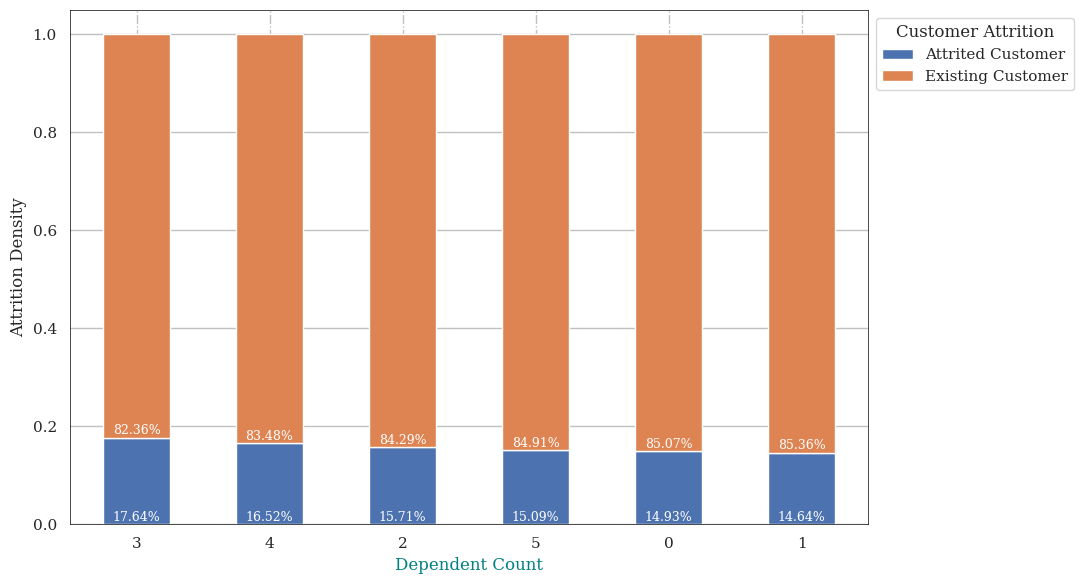

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
categorical_graph(data,'Dependent_count','Attrition_Flag',explanatory_label='Dependent Count',legend_title='Customer Attrition')

**Observations:**
* The number of dependents a customer has is related to their likelihood of attrition.
* More the number of dependents more is the attrition.

## Data Pre-processing

In [ ]:
data.head()

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0               0            45      M                3     High School   
1               0            49      F                5        Graduate   
2               0            51      M                3        Graduate   
3               0            40      F                4     High School   
4               0            40      M                3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3            NaN  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0     12691.000                  777        11914.000                 1.335   
1      8256.000                  864         7392.000                 1.541   
2      3418.000                    0         3418.000                 2.594   
3      3313.000                 2517          796.000                 1.405   
4      4716.000                    0         4716.000                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
## Encoding Attrition_Flag values (Existing to 0 and Attrited customers to 1) for analysis.
data["Attrition_Flag"].replace("Existing Customer", 0, inplace=True)
data["Attrition_Flag"].replace("Attrited Customer", 1, inplace=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Multivariate Analysis**

#### **Correlation**

In [ ]:
data.corr()

Attrition_Flag  Customer_Age  Dependent_count  \
Attrition_Flag                     1.000         0.018            0.019   
Customer_Age                       0.018         1.000           -0.122   
Dependent_count                    0.019        -0.122            1.000   
Months_on_book                     0.014         0.789           -0.103   
Total_Relationship_Count          -0.150        -0.011           -0.039   
Months_Inactive_12_mon             0.152         0.054           -0.011   
Contacts_Count_12_mon              0.204        -0.018           -0.041   
Credit_Limit                      -0.024         0.002            0.068   
Total_Revolving_Bal               -0.263         0.015           -0.003   
Avg_Open_To_Buy                   -0.000         0.001            0.068   
Total_Amt_Chng_Q4_Q1              -0.131        -0.062           -0.035   
Total_Trans_Amt                   -0.169        -0.046            0.025   
Total_Trans_Ct                    -0.371        -0.067            0.050   
Total_Ct_Chng_Q4_Q1               -0.290        -0.012            0.011   
Avg_Utilization_Ratio             -0.178         0.007           -0.037   

                          Months_on_book  Total_Relationship_Count  \
Attrition_Flag                     0.014                    -0.150   
Customer_Age                       0.789                    -0.011   
Dependent_count                   -0.103                    -0.039   
Months_on_book                     1.000                    -0.009   
Total_Relationship_Count          -0.009                     1.000   
Months_Inactive_12_mon             0.074                    -0.004   
Contacts_Count_12_mon             -0.011                     0.055   
Credit_Limit                       0.008                    -0.071   
Total_Revolving_Bal                0.009                     0.014   
Avg_Open_To_Buy                    0.007                    -0.073   
Total_Amt_Chng_Q4_Q1              -0.049                     0.050   
Total_Trans_Amt                   -0.039                    -0.347   
Total_Trans_Ct                    -0.050                    -0.242   
Total_Ct_Chng_Q4_Q1               -0.014                     0.041   
Avg_Utilization_Ratio             -0.008                     0.068   

                          Months_Inactive_12_mon  Contacts_Count_12_mon  \
Attrition_Flag                             0.152                  0.204   
Customer_Age                               0.054                 -0.018   
Dependent_count                           -0.011                 -0.041   
Months_on_book                             0.074                 -0.011   
Total_Relationship_Count                  -0.004                  0.055   
Months_Inactive_12_mon                     1.000                  0.029   
Contacts_Count_12_mon                      0.029                  1.000   
Credit_Limit                              -0.020                  0.021   
Total_Revolving_Bal                       -0.042                 -0.054   
Avg_Open_To_Buy                           -0.017                  0.026   
Total_Amt_Chng_Q4_Q1                      -0.032                 -0.024   
Total_Trans_Amt                           -0.037                 -0.113   
Total_Trans_Ct                            -0.043                 -0.152   
Total_Ct_Chng_Q4_Q1                       -0.039                 -0.095   
Avg_Utilization_Ratio                     -0.008                 -0.055   

                          Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
Attrition_Flag                  -0.024               -0.263           -0.000   
Customer_Age                     0.002                0.015            0.001   
Dependent_count                  0.068               -0.003            0.068   
Months_on_book                   0.008                0.009            0.007   
Total_Relationship_Count        -0.071                0.014           -0.073   
Months_Inactive_12_mon 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

* 1 indicates a strong positive relationship.
* -1 indicates a strong negative relationship.
* A result of zero indicates no relationship at all.

#### **Covariance**

In [ ]:
data.cov(numeric_only=True)

Attrition_Flag  Customer_Age  Dependent_count  \
Attrition_Flag                     0.135         0.054            0.009   
Customer_Age                       0.054        64.269           -1.273   
Dependent_count                    0.009        -1.273            1.687   
Months_on_book                     0.040        50.511           -1.069   
Total_Relationship_Count          -0.086        -0.136           -0.079   
Months_Inactive_12_mon             0.057         0.440           -0.014   
Contacts_Count_12_mon              0.083        -0.164           -0.058   
Credit_Limit                     -79.681       180.425          803.536   
Total_Revolving_Bal              -78.730        96.566           -2.846   
Avg_Open_To_Buy                   -0.952        83.859          806.381   
Total_Amt_Chng_Q4_Q1              -0.011        -0.109           -0.010   
Total_Trans_Amt                 -210.334     -1264.931          110.518   
Total_Trans_Ct                    -3.201       -12.626            1.522   
Total_Ct_Chng_Q4_Q1               -0.025        -0.023            0.003   
Avg_Utilization_Ratio             -0.018         0.016           -0.013   

                          Months_on_book  Total_Relationship_Count  \
Attrition_Flag                     0.040                    -0.086   
Customer_Age                      50.511                    -0.136   
Dependent_count                   -1.069                    -0.079   
Months_on_book                    63.783                    -0.114   
Total_Relationship_Count          -0.114                     2.416   
Months_Inactive_12_mon             0.599                    -0.006   
Contacts_Count_12_mon             -0.095                     0.095   
Credit_Limit                     544.909                 -1008.515   
Total_Revolving_Bal               56.124                    17.388   
Avg_Open_To_Buy                  488.785                 -1025.903   
Total_Amt_Chng_Q4_Q1              -0.086                     0.017   
Total_Trans_Amt                -1046.998                 -1833.551   
Total_Trans_Ct                    -9.339                    -8.826   
Total_Ct_Chng_Q4_Q1               -0.027                     0.015   
Avg_Utilization_Ratio             -0.017                     0.029   

                          Months_Inactive_12_mon  Contacts_Count_12_mon  \
Attrition_Flag                             0.057                  0.083   
Customer_Age                               0.440                 -0.164   
Dependent_count                           -0.014                 -0.058   
Months_on_book                             0.599                 -0.095   
Total_Relationship_Count                  -0.006                  0.095   
Months_Inactive_12_mon                     1.021                  0.033   
Contacts_Count_12_mon                      0.033                  1.224   
Credit_Limit                            -187.324                209.299   
Total_Revolving_Bal                      -34.766                -48.606   
Avg_Open_To_Buy                         -152.558                257.905   
Total_Amt_Chng_Q4_Q1                      -0.007                 -0.006   
Total_Trans_Amt                         -126.969               -423.803   
Total_Trans_Ct                            -1.015                 -3.952   
Total_Ct_Chng_Q4_Q1                       -0.009                 -0.025   
Avg_Utilization_Ratio                     -0.002                 -0.017   

                          Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
Attrition_Flag                 -79.681              -78.730           -0.952   
Customer_Age                   180.425               96.566           83.859   
Dependent_count                803.536               -2.846          806.381   
Months_on_book                 544.909               56.124          488.785   
Total_Relationship_Count     -1008.515               17.388        -1025.903   
Months_Inactive_12_mon 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Covariance is a measure of the directional relationship between two random variables

* Positive: A positive covariance value suggests that both random variables move in the same direction.

* Negative: A negative covariance value suggests that both random variables move in the opposite direction.

* Zero: When the two random variables are independent of each other, the covariance between them is zero.

#### **Pairplot**

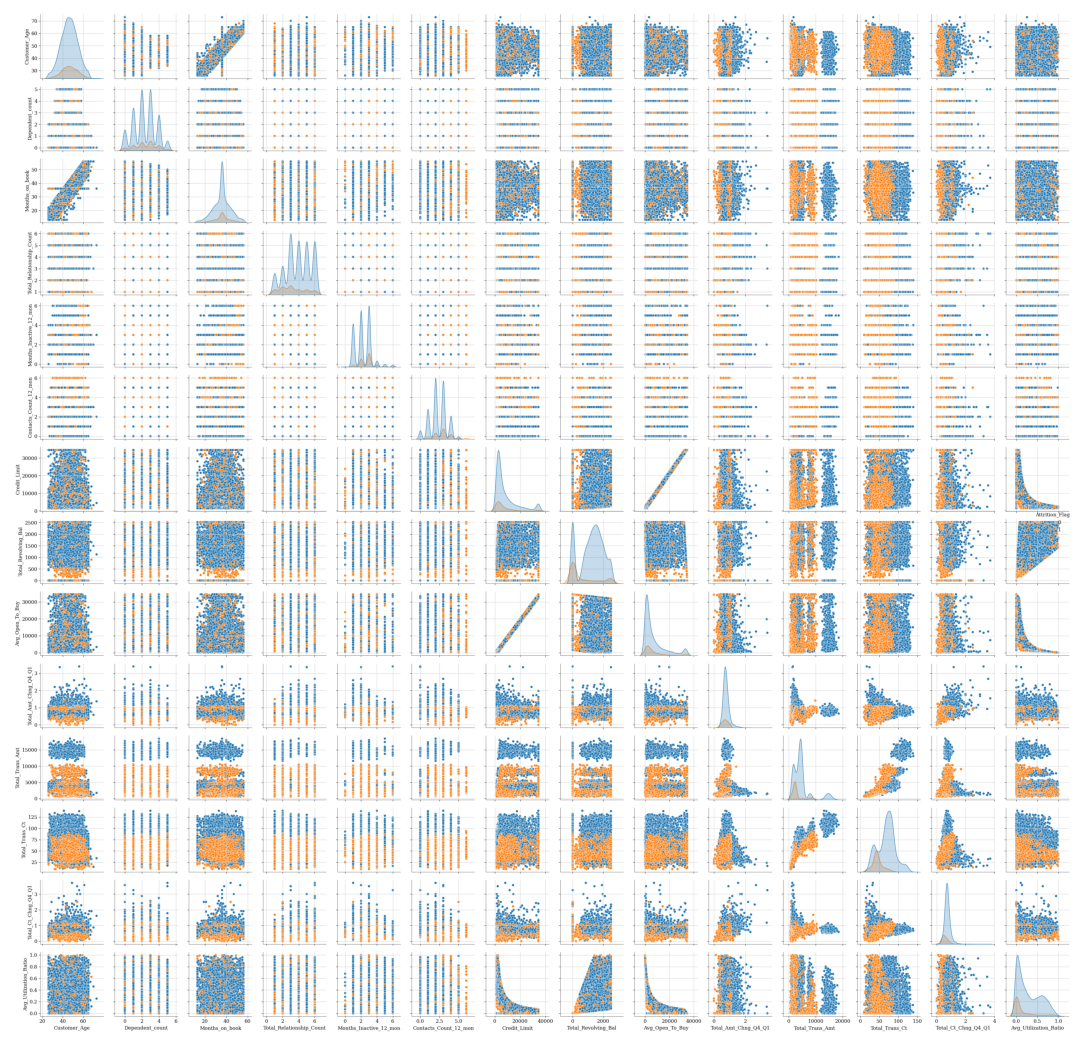

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from PIL import Image
# plt.figure(figsize=(15,41))
# sns.pairplot(data, hue="Attrition_Flag")
# plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Advanced_Machine_Learning/Project/plt_Attrition_Flag_pairplot.png')
# plt.show();

plt.figure(figsize=(11,38))
image_path = '/content/drive/MyDrive/Colab_Notebooks/Advanced_Machine_Learning/Project/plt_Attrition_Flag_pairplot.png'
image = Image.open(image_path)
plt.imshow(image)
plt.axis('off')
plt.show();

**Observations:**\
Because of the classes imbalance in the target variable, it is a difficult to determine the strength of the predictors in this classification problem.

* The Total_Trans_Ct and Total_Trans_Amt show varying distribution for both classes which is overlapping slightly, but we can conclude that it has a moderate predictibility power as the number of attrited customers decrease significantly as the total_trans_ct increases
* The total_revolving_balance also shows a small recognizable prediction power, the the number of attrited customers decrease as the total_revolving_balance increases

## Missing value imputation




* Replace 'abc' values with 'np.nan' in Income_Category
* Impute missing values in all 3 columns using mode

In [ ]:
data1 = data.copy()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           8608 non-null   object 
 5   Marital_Status            9378 non-null   object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
data1["Income_Category"].replace("abc", np.nan, inplace=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
data1.isna().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
imputer = SimpleImputer(strategy="most_frequent")
#imputer = KNNImputer(n_neighbors=5)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
X = data1.drop(["Attrition_Flag"], axis=1)
y = data1["Attrition_Flag"]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Splitting Data Into Training, Validation and Test Set :**

In [ ]:
# 1) split data into 2 parts, temporary and test
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# 2) split the temporary set into train and validation
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 19) (2026, 19) (2026, 19)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
reqd_col_for_impute = ["Education_Level", "Marital_Status", "Income_Category"]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Fit and transform the train data
X_train[reqd_col_for_impute] = imputer.fit_transform(X_train[reqd_col_for_impute])

# Transform the validation data
X_val[reqd_col_for_impute] = imputer.transform(X_val[reqd_col_for_impute])

# Transform the test data
X_test[reqd_col_for_impute] = imputer.transform(X_test[reqd_col_for_impute])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal       

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**All missing values have been treated.**

In [ ]:
cols = X_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

F    3193
M    2882
Name: Gender, dtype: int64
******************************
Graduate         2782
High School      1228
Uneducated        881
College           618
Post-Graduate     312
Doctorate         254
Name: Education_Level, dtype: int64
******************************
Married     3276
Single      2369
Divorced     430
Name: Marital_Status, dtype: int64
******************************
Less than $40K    2783
$40K - $60K       1059
$80K - $120K       953
$60K - $80K        831
$120K +            449
Name: Income_Category, dtype: int64
******************************
Blue        5655
Silver       339
Gold          69
Platinum      12
Name: Card_Category, dtype: int64
******************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
cols = X_val.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_val[i].value_counts())
    print("*" * 30)

F    1095
M     931
Name: Gender, dtype: int64
******************************
Graduate         917
High School      404
Uneducated       306
College          199
Post-Graduate    101
Doctorate         99
Name: Education_Level, dtype: int64
******************************
Married     1100
Single       770
Divorced     156
Name: Marital_Status, dtype: int64
******************************
Less than $40K    957
$40K - $60K       361
$80K - $120K      293
$60K - $80K       279
$120K +           136
Name: Income_Category, dtype: int64
******************************
Blue        1905
Silver        97
Gold          21
Platinum       3
Name: Card_Category, dtype: int64
******************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
cols = X_test.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

F    3193
M    2882
Name: Gender, dtype: int64
******************************
Graduate         2782
High School      1228
Uneducated        881
College           618
Post-Graduate     312
Doctorate         254
Name: Education_Level, dtype: int64
******************************
Married     3276
Single      2369
Divorced     430
Name: Marital_Status, dtype: int64
******************************
Less than $40K    2783
$40K - $60K       1059
$80K - $120K       953
$60K - $80K        831
$120K +            449
Name: Income_Category, dtype: int64
******************************
Blue        5655
Silver       339
Gold          69
Platinum      12
Name: Card_Category, dtype: int64
******************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Encoding categorical variables**

In [ ]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 29) (2026, 29) (2026, 29)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

After encoding there are 29 columns.

In [ ]:
X_train.head()

Customer_Age  Dependent_count  Months_on_book  Total_Relationship_Count  \
800             40                2              21                         6   
498             44                1              34                         6   
4356            48                4              36                         5   
407             41                2              36                         6   
8728            46                4              36                         2   

      Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
800                        4                      3     20056.000   
498                        2                      0      2885.000   
4356                       1                      2      6798.000   
407                        2                      0     27000.000   
8728                       2                      3     15034.000   

      Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
800                  1602        18454.000                 0.466   
498                  1895          990.000                 0.387   
4356                 2517         4281.000                 0.873   
407                     0        27000.000                 0.610   
8728                 1356        13678.000                 0.754   

      Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
800              1687              46                0.533   
498              1366              31                0.632   
4356             4327              79                0.881   
407              1209              39                0.300   
8728             7737              84                0.750   

      Avg_Utilization_Ratio  Gender_M  Education_Level_Doctorate  \
800                   0.080         1                          0   
498                   0.657         1                          0   
4356                  0.370         1                          0   
407                   0.000         1                          0   
8728                  0.090         1                          0   

      Education_Level_Graduate  Education_Level_High School  \
800                          1                            0   
498                          1                            0   
4356                         0                            1   
407                          1                            0   
8728                         0                            1   

      Education_Level_Post-Graduate  Education_Level_Uneducated  \
800                               0                           0   
498                               0                           0   
4356                              0                           0   
407                               0                           0   
8728                              0                           0   

      Marital_Status_Married  Marital_Status_Single  \
800                        0                      1   
498                        1                      0   
4356                       1                      0   
407                        1                      0   
8728                       0                      0   

      Income_Category_$40K - $60K  Income_Category_$60K - $80K  \
800                             0                            0   
498                             0                            0   
4356                            0                            0   
407                             0                            1   
8728                            1                            0   

      Income_Category_$80K - $120K  Income_Category_Less than $40K  \
800                              0                               0   
498                              0                               1   
4356                             1                               0   
407                              0                               0   
8728                             0                   

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Model Predictions :** \
* It is important to acknowledge that no model is perfect, and there is always a possibility of making incorrect predictions.
* Several factors contribute to potential inaccuracies in predictive models, including but not limited to :
  * Complexity of Human Behavior
  * Evolution of Patterns
  * Model Assumptions
  * Imbalance in Data
  * Variable Importance

* It is essential to continuously evaluate and refine predictive models, considering factors such as model performance metrics, feature importance, and the evolving nature of the data. Regular updates and improvements to the model based on new information and feedback contribute to enhancing its predictive capabilities.

**What is more important for Bank?** \
Predicting that customer will not attrite but that customer attrites, that's losing a valuable customer and the business as well.

**How to reduce this loss (False Negatives)?**
* While optimizing for Recall can reduce False Negatives, but it might lead to an increase in False Positives.
* **Bank would want Recall to be maximized**
* Hence, the focus should be on increasing Recall or minimizing the false negatives, so that the bank can retain their valuable customers by identifying the customers who are at risk of attrition.

### Metrics Functions

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1


        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
## Function to create confusion matrix
def make_confusion_matrix(model,predictors,y_actual,labels=[0, 1]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth

    '''
    y_predict = model.predict(predictors)
    cm=confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (7,5))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Model Building with original data

In [ ]:
# This function return the train models list
def get_model_instance_list(X_training_data_set,y_training_data_set):
  models = []  # Empty list to store all the models

  # Appending models into the list
  models.append(("dtree", DecisionTreeClassifier(random_state=1)))
  models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
  models.append(("GBM", GradientBoostingClassifier(random_state=1)))
  models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
  models.append(("Bagging", BaggingClassifier(random_state=1)))
  models.append(("Random_forest", RandomForestClassifier(random_state=1)))

  models_instance_list=[]

  for name, model in models:
    models_instance_list.append((name,model.fit(X_training_data_set, y_training_data_set)))

  return models_instance_list

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#checking the ratio of classes in the target variable
y_train.value_counts(normalize=True)


0   0.839
1   0.161
Name: Attrition_Flag, dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# This function display the model performance scores and confusion metrics
def display_metrics(model_instance_list,list_index,train_set=False,val_set=False,X_train_set=X_train,y_train_set=y_train,X_val_set=X_val,y_val_set=y_val):
  model_instance = model_instance_list[list_index][1]
  model_instance_name = model_instance_list[list_index][0]
  print("Model Name:",model_instance_name,"\n")
  if train_set==True:
    print("Training Performance:")
    model_performance_train_set = model_performance_classification_sklearn(model_instance, X_train_set, y_train_set)
    print(model_performance_train_set.head(),"\n")
    make_confusion_matrix(model_instance,X_train_set, y_train_set)

  if val_set == True:
    print("Validation Performance:")
    model_performance_train_set = model_performance_classification_sklearn(model_instance, X_val_set, y_val_set)
    print(model_performance_train_set)
    make_confusion_matrix(model_instance,X_val_set, y_val_set)

  return model_performance_train_set


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
train_models_instance_original_data = get_model_instance_list(X_train,y_train)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### **Decision Tree**

Model Name: dtree 

Training Performance:
   Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000 



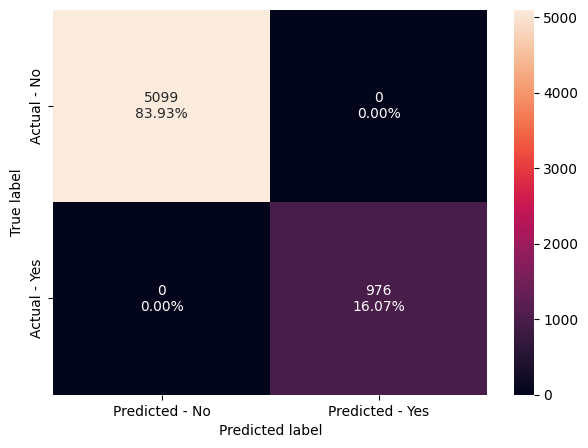

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
performance_dTree_train_set = display_metrics(train_models_instance_original_data,0,train_set=True)

Model Name: dtree 

Validation Performance:
   Accuracy  Recall  Precision    F1
0     0.939   0.816      0.806 0.811


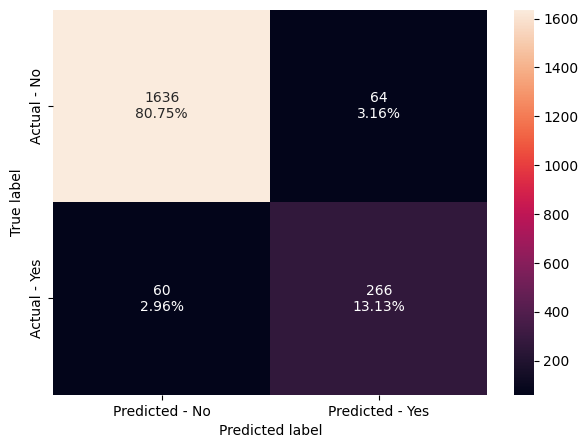

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
performance_dTree_val_set = display_metrics(train_models_instance_original_data,0,val_set=True)

The model performance on the validation set is worse than on the train set and train set performance showing a overfit in the model

#### **Adaboost Classifier**

Model Name: Adaboost 

Training Performance:
   Accuracy  Recall  Precision    F1
0     0.957   0.827      0.900 0.862 



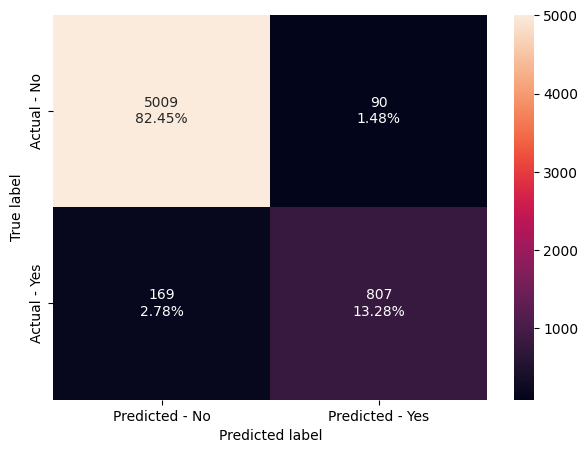

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
performance_adboost_train_set = display_metrics(train_models_instance_original_data,1,train_set=True)

Model Name: Adaboost 

Validation Performance:
   Accuracy  Recall  Precision    F1
0     0.962   0.853      0.906 0.878


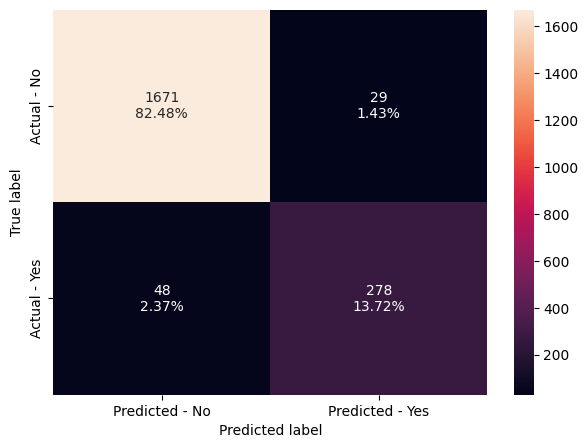

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
performance_adboost_val_set = display_metrics(train_models_instance_original_data,1,val_set=True)

A very good performance is observed on the validation set with no overfitting which means the model is generalized and robust.

#### **Gredient Boosting Classifier**

Model Name: GBM 

Training Performance:
   Accuracy  Recall  Precision    F1
0     0.973   0.875      0.952 0.912 



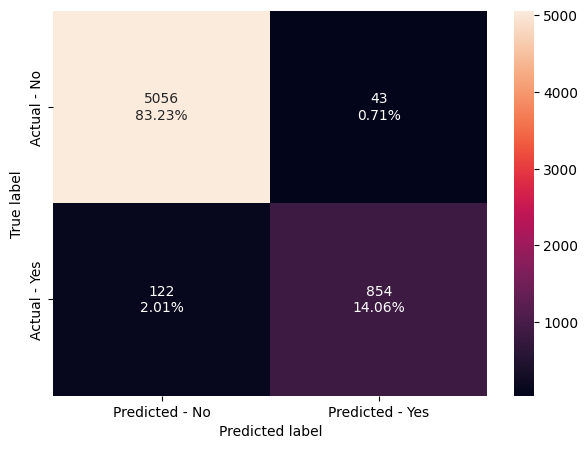

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
performance_gbm_train_set =  display_metrics(train_models_instance_original_data,2,train_set=True)

Model Name: GBM 

Validation Performance:
   Accuracy  Recall  Precision    F1
0     0.967   0.856      0.936 0.894


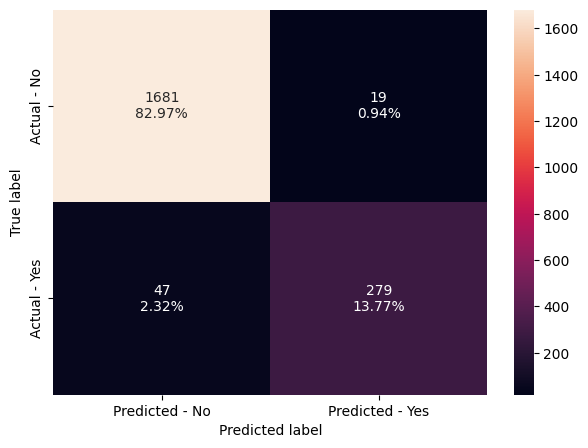

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
performance_gbm_val_set = display_metrics(train_models_instance_original_data,2,val_set=True)

The model performance on the validation set shows that the model is not overfitting.

#### **XGBoost Classifier**

Model Name: Xgboost 

Training Performance:
   Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000 



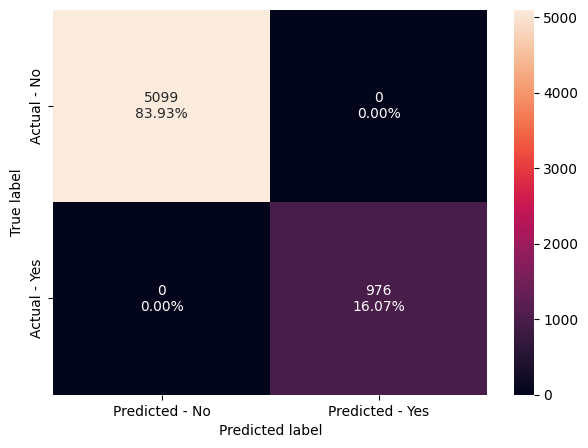

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
performance_xgboost_train_set =  display_metrics(train_models_instance_original_data,3,train_set=True)

Model Name: Xgboost 

Validation Performance:
   Accuracy  Recall  Precision    F1
0     0.971   0.902      0.919 0.910


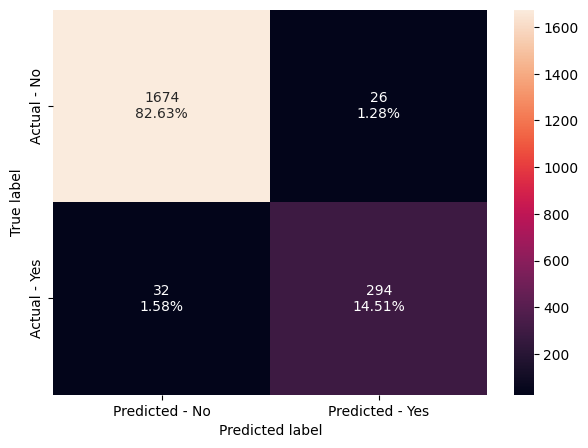

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
performance_xgboost_val_set =  display_metrics(train_models_instance_original_data,3,val_set=True)

A very good performance is observed on the validation set with Recall 0.902 and performance is improved as compare to other previous models



#### **Bagging Classifier**

Model Name: Bagging 

Training Performance:
   Accuracy  Recall  Precision    F1
0     0.997   0.986      0.997 0.991 



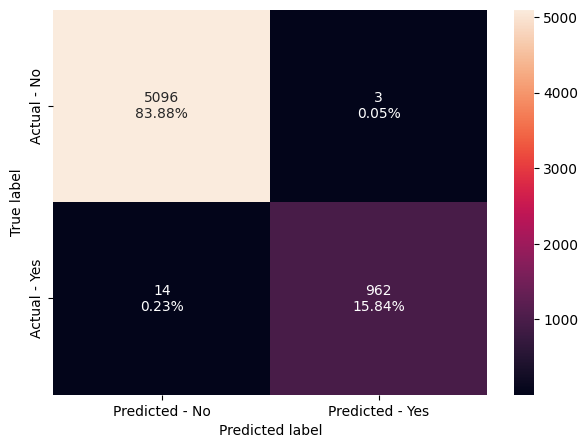

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
performance_bagging_train_set = display_metrics(train_models_instance_original_data,4,train_set=True)

Model Name: Bagging 

Validation Performance:
   Accuracy  Recall  Precision    F1
0     0.956   0.813      0.904 0.856


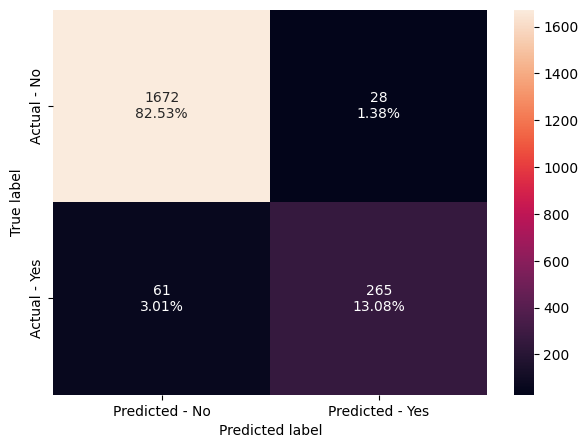

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
performance_bagging_val_set = display_metrics(train_models_instance_original_data,4,val_set=True)

The performance dropped on the validation set with Recall 0.813 \
The Accuracy and precision scores dropped very slightly as compare to other models.

#### **Random Forest Classifier**

Model Name: Random_forest 

Training Performance:
   Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000 



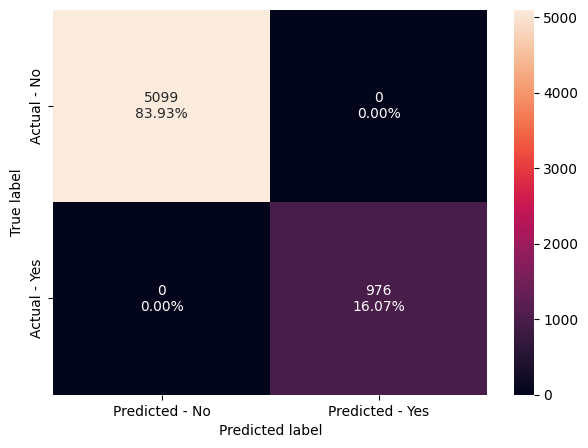

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
performance_rforest_train_set = display_metrics(train_models_instance_original_data,5,train_set=True)

Model Name: Random_forest 

Validation Performance:
   Accuracy  Recall  Precision    F1
0     0.957   0.798      0.922 0.855


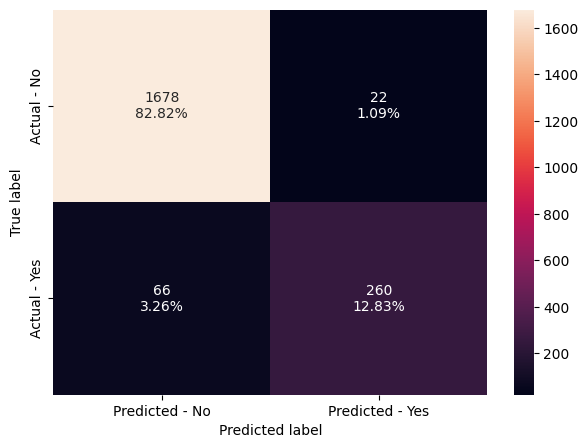

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
performance_rforest_val_set = display_metrics(train_models_instance_original_data,5,val_set=True)

The performance dropped on the validation set with Recall 0.798

In [ ]:
models_name = ['Decision Tree','AdaBoost','Gradient Boost','XGBoost','Bagging','Random_forest']


models_train_perf = pd.concat([
performance_dTree_train_set,
performance_adboost_train_set,
performance_gbm_train_set,
performance_xgboost_train_set,
performance_bagging_train_set,
performance_rforest_train_set],axis=0)

models_train_perf['<= Training | Validation =>']=''

models_train_perf.set_index([pd.Index(models_name)], inplace=True)

models_val_perf = pd.concat([performance_dTree_val_set,
performance_adboost_val_set,
performance_gbm_val_set,
performance_xgboost_val_set,
performance_bagging_val_set,
performance_rforest_val_set],axis=0)

models_val_perf.set_index([pd.Index(models_name)], inplace=True)

print("Training performance VS Validation performance comparison:")

all_models = pd.concat([models_train_perf,models_val_perf],axis=1 )
all_models

Training performance VS Validation performance comparison:


Accuracy  Recall  Precision    F1 <= Training | Validation =>  \
Decision Tree      1.000   1.000      1.000 1.000                               
AdaBoost           0.957   0.827      0.900 0.862                               
Gradient Boost     0.973   0.875      0.952 0.912                               
XGBoost            1.000   1.000      1.000 1.000                               
Bagging            0.997   0.986      0.997 0.991                               
Random_forest      1.000   1.000      1.000 1.000                               

                Accuracy  Recall  Precision    F1  
Decision Tree      0.939   0.816      0.806 0.811  
AdaBoost           0.962   0.853      0.906 0.878  
Gradient Boost     0.967   0.856      0.936 0.894  
XGBoost            0.971   0.902      0.919 0.910  
Bagging            0.956   0.813      0.904 0.856  
Random_forest      0.957   0.798      0.922 0.855

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

* Xgboost has the best performance on the validation followed by GBM and Adaboost.
* Yet the Xgboost model overfit on training set.  

### Model Building with Oversampled data


In [ ]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

Before Oversampling, counts of label 'Yes': 976
Before Oversampling, counts of label 'No': 5099 



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

After Oversampling, counts of label 'Yes': 5099
After Oversampling, counts of label 'No': 5099 

After Oversampling, the shape of train_X: (10198, 29)
After Oversampling, the shape of train_y: (10198,) 



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
train_models_instance_over_data = get_model_instance_list(X_train_over,y_train_over)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### **Decision Tree**

Model Name: dtree 

Training Performance:
   Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000 



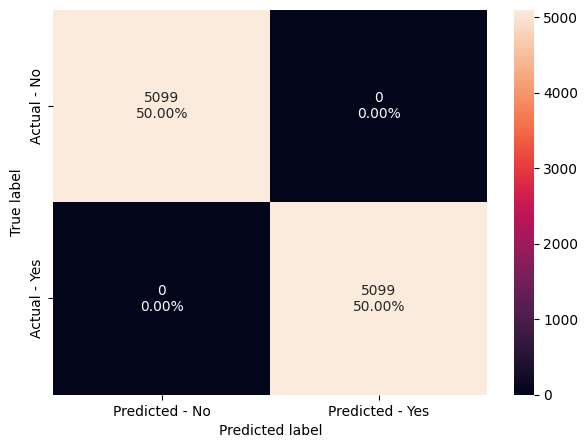

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
over_performance_dTree_train_set = display_metrics(train_models_instance_over_data,0,train_set=True,X_train_set=X_train_over,y_train_set=y_train_over)

Model Name: dtree 

Validation Performance:
   Accuracy  Recall  Precision    F1
0     0.929   0.825      0.756 0.789


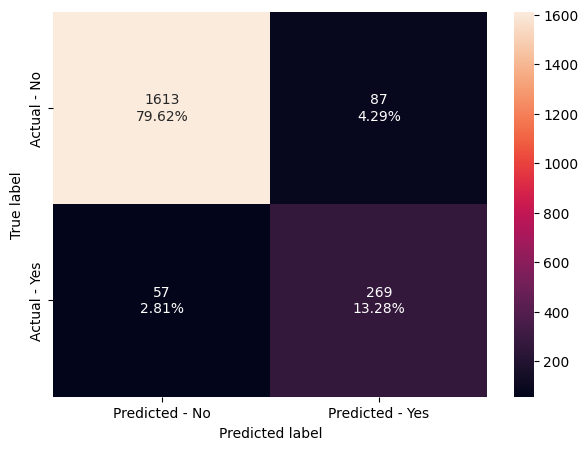

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
over_performance_dTree_val_set = display_metrics(train_models_instance_over_data,0,val_set=True,X_train_set=X_val,y_train_set=y_val)

The model performance on the validation set is yet slightly better than the model with the non-sampled data, yet it relfects more overfitting.

#### **Adaboost Classifier**

Model Name: Adaboost 

Training Performance:
   Accuracy  Recall  Precision    F1
0     0.961   0.969      0.954 0.962 



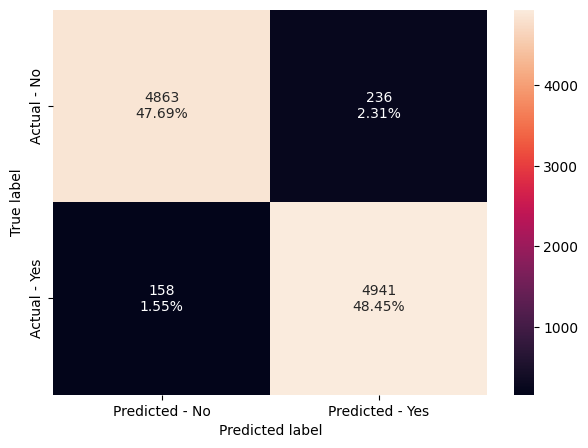

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
over_performance_adboost_train_set = display_metrics(train_models_instance_over_data,1,train_set=True,X_train_set=X_train_over,y_train_set=y_train_over)

Model Name: Adaboost 

Validation Performance:
   Accuracy  Recall  Precision    F1
0     0.944   0.902      0.784 0.839


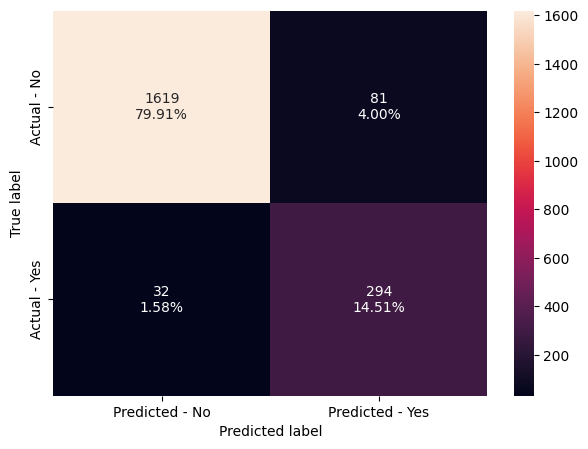

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
over_performance_adboost_val_set = display_metrics(train_models_instance_over_data,1,val_set=True,X_train_set=X_train_over,y_train_set=y_train_over)

* A very good performance is observed on the validation set.
* Recall observed 90.2%

#### **Gredient Boosting Classifier**

Model Name: GBM 

Training Performance:
   Accuracy  Recall  Precision    F1
0     0.977   0.981      0.974 0.977 



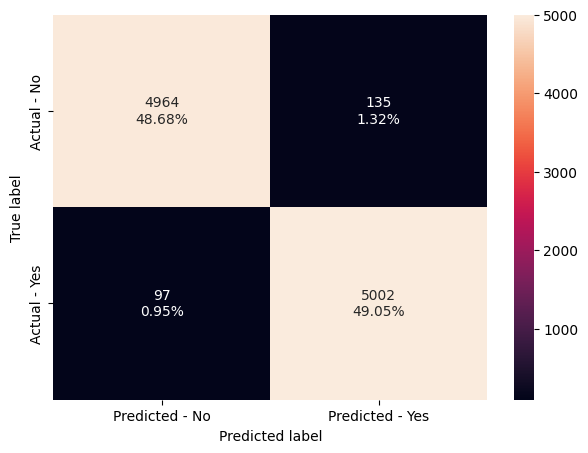

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
over_performance_gbm_train_set = display_metrics(train_models_instance_over_data,2,train_set=True,X_train_set=X_train_over,y_train_set=y_train_over)

Model Name: GBM 

Validation Performance:
   Accuracy  Recall  Precision    F1
0     0.956   0.893      0.841 0.866


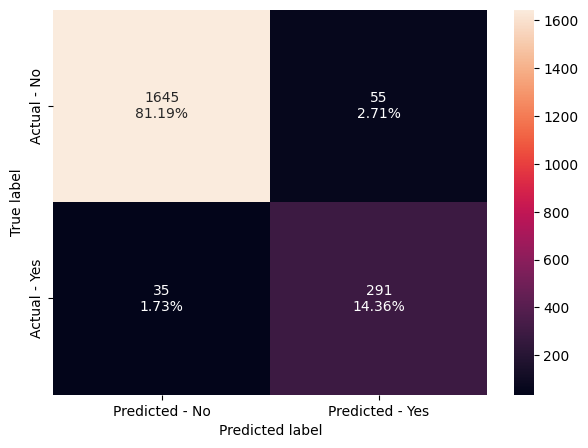

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
over_performance_gbm_val_set = display_metrics(train_models_instance_over_data,2,val_set=True,X_train_set=X_train_over,y_train_set=y_train_over)

* The model performance is very good
* FP and FN ratio is also lower
* Recall observed 89.3%

#### **XGBoost Classifier**

Model Name: Xgboost 

Training Performance:
   Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000 



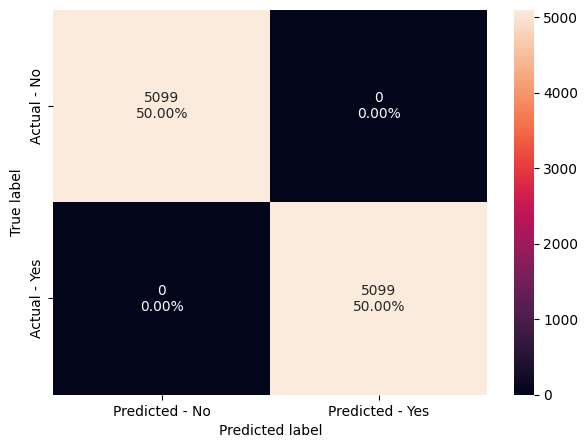

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
over_performance_xgboost_train_set = display_metrics(train_models_instance_over_data,3,train_set=True,X_train_set=X_train_over,y_train_set=y_train_over)

Model Name: Xgboost 

Validation Performance:
   Accuracy  Recall  Precision    F1
0     0.966   0.911      0.884 0.897


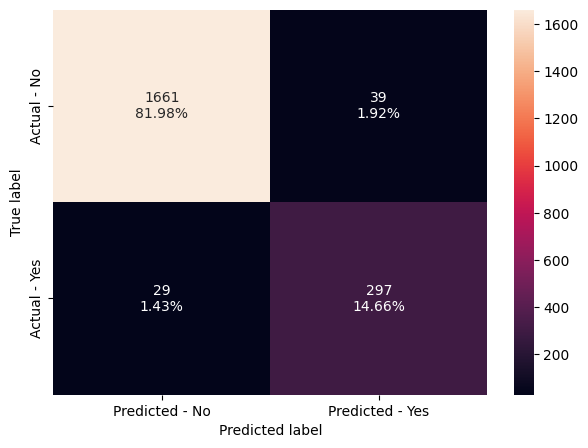

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
over_performance_xgboost_val_set = display_metrics(train_models_instance_over_data,3,val_set=True,X_train_set=X_train_over,y_train_set=y_train_over)

* The model performance is very good on Validation set
* It's observed model overfit on Training set
* FP and FN ration also lower on Validation set
* Recall observed 91.1% on Validation set

#### **Bagging Classifier**

Model Name: Bagging 

Training Performance:
   Accuracy  Recall  Precision    F1
0     0.998   0.997      0.999 0.998 



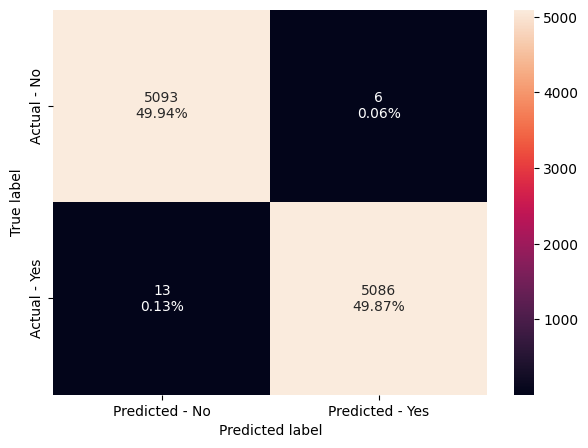

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
over_performance_bagging_train_set = display_metrics(train_models_instance_over_data,4,train_set=True,X_train_set=X_train_over,y_train_set=y_train_over)

Model Name: Bagging 

Validation Performance:
   Accuracy  Recall  Precision    F1
0     0.943   0.850      0.805 0.827


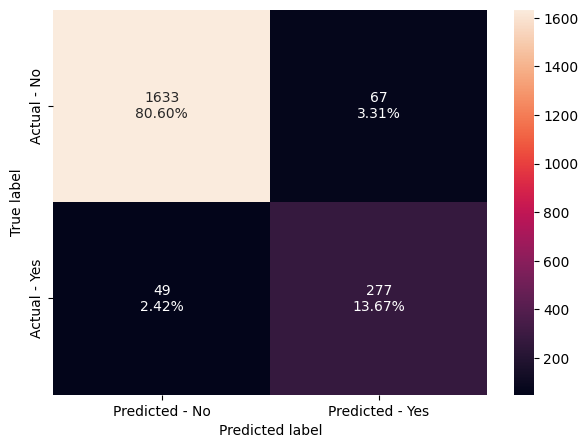

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
over_performance_bagging_val_set = display_metrics(train_models_instance_over_data,4,val_set=True,X_train_set=X_train_over,y_train_set=y_train_over)

* Recall observed 85% and its lower as compared to other models.
* Model is not overfitting

#### **Random Forest Classifier**

Model Name: Random_forest 

Training Performance:
   Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000 



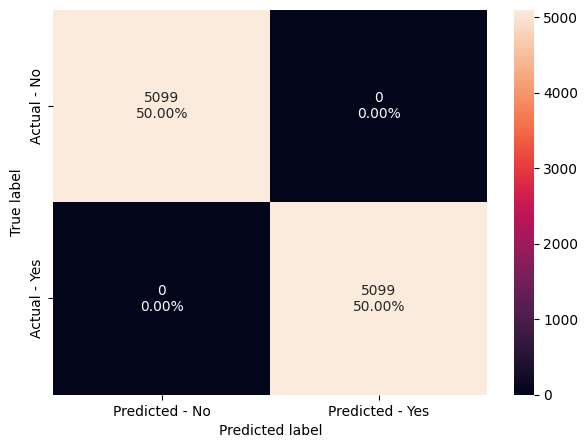

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
over_performance_rforest_train_set = display_metrics(train_models_instance_over_data,5,train_set=True,X_train_set=X_train_over,y_train_set=y_train_over)

Model Name: Random_forest 

Validation Performance:
   Accuracy  Recall  Precision    F1
0     0.956   0.868      0.858 0.863


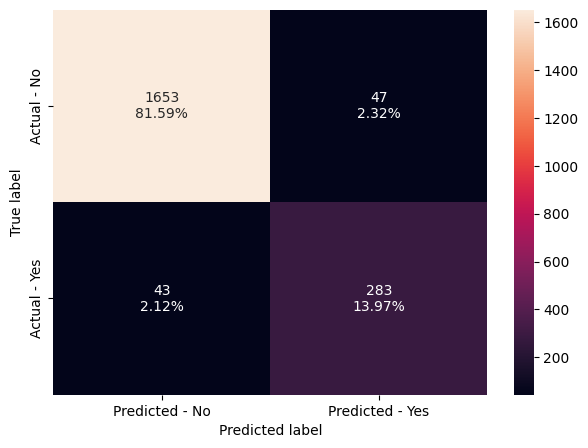

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
over_performance_rforest_val_set = display_metrics(train_models_instance_over_data,5,val_set=True,X_train_set=X_train_over,y_train_set=y_train_over)

* Recall observed 86.8%, better than Bagging Classifier model
* Model is overfitting on training set

In [ ]:
over_models_train_perf = pd.concat([
over_performance_dTree_train_set,
over_performance_adboost_train_set,
over_performance_gbm_train_set,
over_performance_xgboost_train_set,
over_performance_bagging_train_set,
over_performance_rforest_train_set],axis=0)

over_models_train_perf['<= Training | Validation =>']=''

over_models_train_perf.set_index([pd.Index(models_name)], inplace=True)

over_models_val_perf = pd.concat([over_performance_dTree_val_set,
over_performance_adboost_val_set,
over_performance_gbm_val_set,
over_performance_xgboost_val_set,
over_performance_bagging_val_set,
over_performance_rforest_val_set],axis=0)

over_models_val_perf.set_index([pd.Index(models_name)], inplace=True)

print("\n","Training performance Vs Validation performance comparison:","\n")

over_all_models = pd.concat([over_models_train_perf,over_models_val_perf],axis=1 )
over_all_models


 Training performance Vs Validation performance comparison: 



Accuracy  Recall  Precision    F1 <= Training | Validation =>  \
Decision Tree      1.000   1.000      1.000 1.000                               
AdaBoost           0.961   0.969      0.954 0.962                               
Gradient Boost     0.977   0.981      0.974 0.977                               
XGBoost            1.000   1.000      1.000 1.000                               
Bagging            0.998   0.997      0.999 0.998                               
Random_forest      1.000   1.000      1.000 1.000                               

                Accuracy  Recall  Precision    F1  
Decision Tree      0.929   0.825      0.756 0.789  
AdaBoost           0.944   0.902      0.784 0.839  
Gradient Boost     0.956   0.893      0.841 0.866  
XGBoost            0.966   0.911      0.884 0.897  
Bagging            0.943   0.850      0.805 0.827  
Random_forest      0.956   0.868      0.858 0.863

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

* Adaboost has the best performance on validation followed by XGBoost
* XGBoost is overfitting on training set
* Gradient Boost also showing good performance and not overfitting on training set.

### Model Building with Undersampled data

In [ ]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 976
Before Under Sampling, counts of label 'No': 5099 

After Under Sampling, counts of label 'Yes': 976
After Under Sampling, counts of label 'No': 976 

After Under Sampling, the shape of train_X: (1952, 29)
After Under Sampling, the shape of train_y: (1952,) 



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
train_models_instance_un_data = get_model_instance_list(X_train_un,y_train_un)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### **Decision Tree**

Model Name: dtree 

Training Performance:
   Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000 



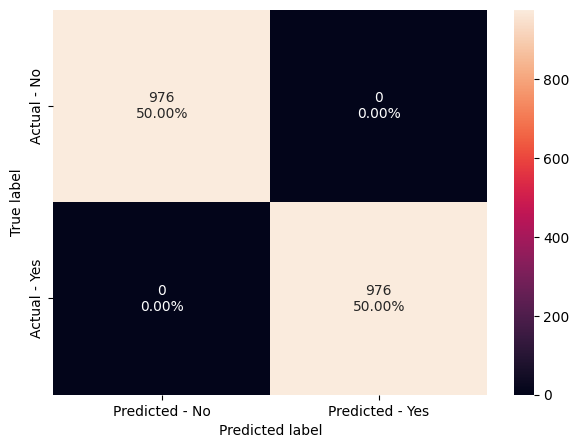

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
un_performance_dTree_train_set = display_metrics(train_models_instance_un_data,0,train_set=True,X_train_set=X_train_un,y_train_set=y_train_un)

Model Name: dtree 

Validation Performance:
   Accuracy  Recall  Precision    F1
0     0.895   0.920      0.616 0.738


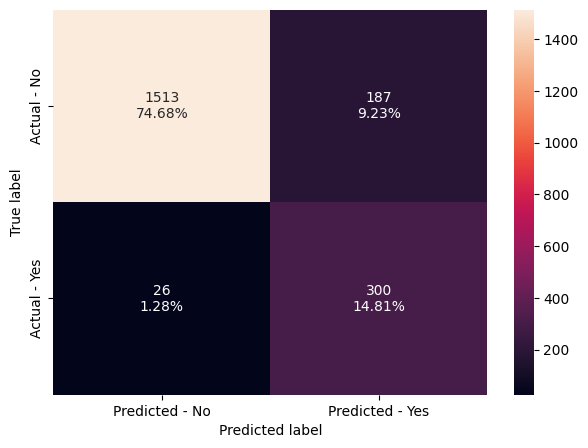

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
un_performance_dTree_val_set = display_metrics(train_models_instance_un_data,0,val_set=True,X_train_set=X_train_un,y_train_set=y_train_un)

* Good Recall observed on Validation set 92%
* Predicated FP ratio is slightly higher but FN is fairly lower

#### **Adaboost Classifier**

Model Name: Adaboost 

Training Performance:
   Accuracy  Recall  Precision    F1
0     0.950   0.953      0.947 0.950 



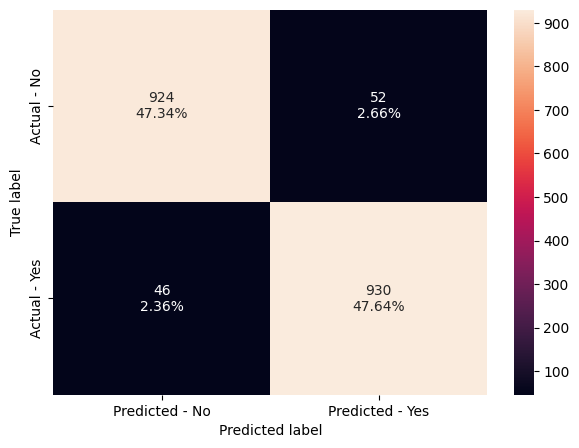

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
un_performance_adboost_train_set = display_metrics(train_models_instance_un_data,1,train_set=True,X_train_set=X_train_un,y_train_set=y_train_un)

Model Name: Adaboost 

Validation Performance:
   Accuracy  Recall  Precision    F1
0     0.929   0.960      0.705 0.813


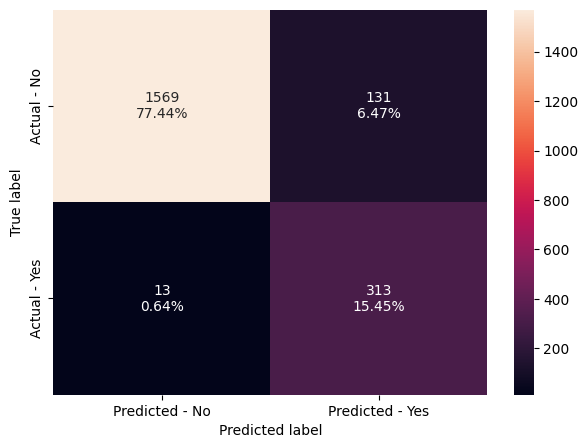

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
un_performance_adboost_val_set = display_metrics(train_models_instance_un_data,1,val_set=True,X_train_set=X_train_un,y_train_set=y_train_un)

* The model performance is very good
* Recall is 96% on validation set
* FN ratio is aslo lower, which good.

#### **Gredient Boosting Classifier**

Model Name: GBM 

Training Performance:
   Accuracy  Recall  Precision    F1
0     0.974   0.981      0.969 0.975 



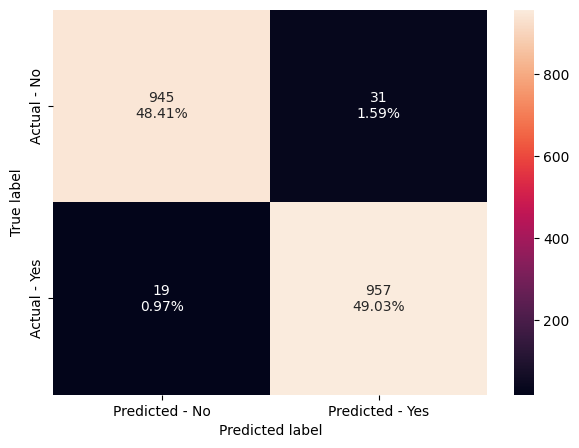

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
un_performance_gbm_train_set = display_metrics(train_models_instance_un_data,2,train_set=True,X_train_set=X_train_un,y_train_set=y_train_un)

Model Name: GBM 

Validation Performance:
   Accuracy  Recall  Precision    F1
0     0.935   0.957      0.726 0.825


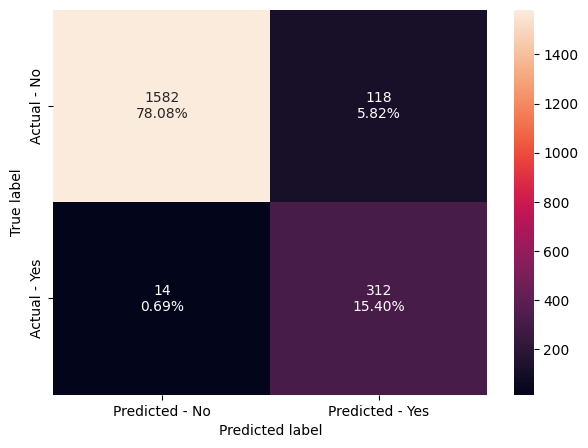

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
un_performance_gbm_val_set = display_metrics(train_models_instance_un_data,2,val_set=True,X_train_set=X_train_un,y_train_set=y_train_un)

* Overall model performance is good.
* Model predicated FP is higher than Adaboost model but FN ratio is lower
* Recall observed 95.7%

#### **XGBoost Classifier**

Model Name: Xgboost 

Training Performance:
   Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000 



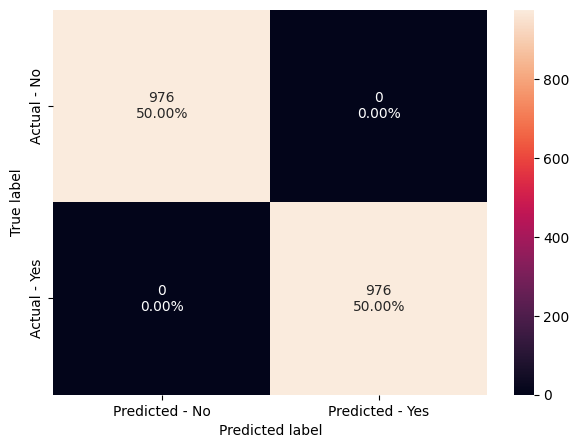

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
un_performance_xgboost_train_set = display_metrics(train_models_instance_un_data,3,train_set=True,X_train_set=X_train_un,y_train_set=y_train_un)

Model Name: Xgboost 

Validation Performance:
   Accuracy  Recall  Precision    F1
0     0.944   0.969      0.752 0.847


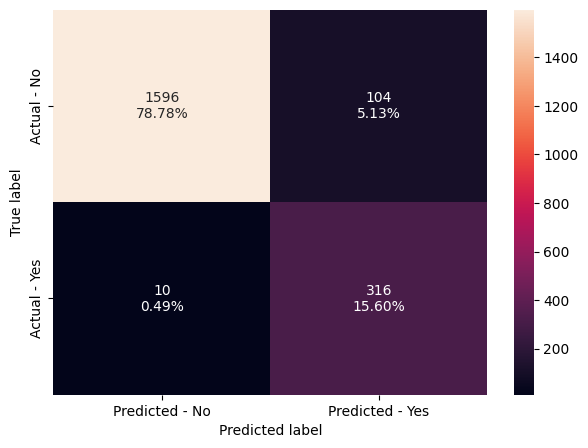

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
un_performance_xgboost_val_set = display_metrics(train_models_instance_un_data,3,val_set=True,X_train_set=X_train_un,y_train_set=y_train_un)

* Model performance is good but overfitting on training set
* Recall observed 96.9%

#### **Bagging Classifier**

Model Name: Bagging 

Training Performance:
   Accuracy  Recall  Precision    F1
0     0.995   0.991      1.000 0.995 



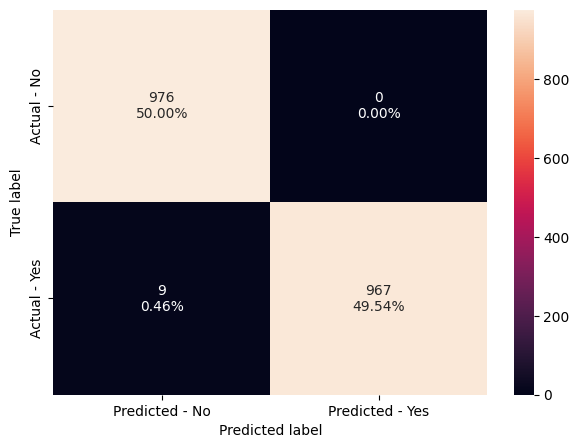

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
un_performance_bagging_train_set = display_metrics(train_models_instance_un_data,4,train_set=True,X_train_set=X_train_un,y_train_set=y_train_un)

Model Name: Bagging 

Validation Performance:
   Accuracy  Recall  Precision    F1
0     0.925   0.929      0.701 0.799


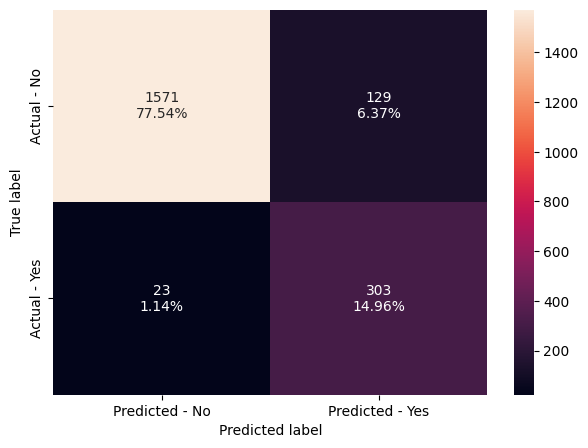

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
un_performance_bagging_val_set = display_metrics(train_models_instance_un_data,4,val_set=True,X_train_set=X_train_un,y_train_set=y_train_un)

* Over model performance is good.
* Recall observed 92.9%
* FP ratio is higher but FN ratio is lower

#### **Random Forest Classifier**

Model Name: Random_forest 

Training Performance:
   Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000 



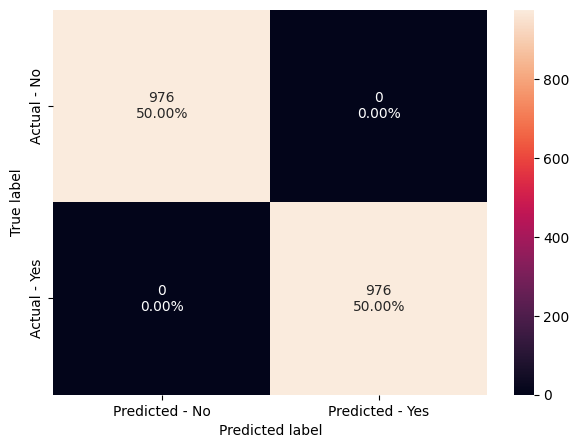

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
un_performance_rforest_train_set = display_metrics(train_models_instance_un_data,5,train_set=True,X_train_set=X_train_un,y_train_set=y_train_un)

Model Name: Random_forest 

Validation Performance:
   Accuracy  Recall  Precision    F1
0     0.934   0.939      0.729 0.820


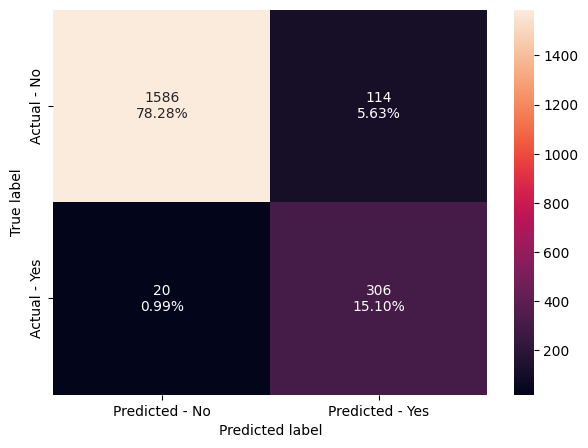

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
un_performance_rforest_val_set = display_metrics(train_models_instance_un_data,5,val_set=True,X_train_set=X_train_un,y_train_set=y_train_un)

* Overall model performance is good but overfitting on training set
* Recall observed 93.9%
* FN ration is also lower

In [ ]:
un_models_train_perf = pd.concat([
un_performance_dTree_train_set,
un_performance_adboost_train_set,
un_performance_gbm_train_set,
un_performance_xgboost_train_set,
un_performance_bagging_train_set,
un_performance_rforest_train_set],axis=0)

un_models_train_perf['<= Training | Validation =>']=''

un_models_train_perf.set_index([pd.Index(models_name)], inplace=True)

un_models_val_perf = pd.concat([un_performance_dTree_val_set,
un_performance_adboost_val_set,
un_performance_gbm_val_set,
un_performance_xgboost_val_set,
un_performance_bagging_val_set,
un_performance_rforest_val_set],axis=0)

un_models_val_perf.set_index([pd.Index(models_name)], inplace=True)

print("\n","Training performance Vs Validation performance comparison:","\n")

un_all_models = pd.concat([un_models_train_perf,un_models_val_perf],axis=1 )
un_all_models


 Training performance Vs Validation performance comparison: 



Accuracy  Recall  Precision    F1 <= Training | Validation =>  \
Decision Tree      1.000   1.000      1.000 1.000                               
AdaBoost           0.950   0.953      0.947 0.950                               
Gradient Boost     0.974   0.981      0.969 0.975                               
XGBoost            1.000   1.000      1.000 1.000                               
Bagging            0.995   0.991      1.000 0.995                               
Random_forest      1.000   1.000      1.000 1.000                               

                Accuracy  Recall  Precision    F1  
Decision Tree      0.895   0.920      0.616 0.738  
AdaBoost           0.929   0.960      0.705 0.813  
Gradient Boost     0.935   0.957      0.726 0.825  
XGBoost            0.944   0.969      0.752 0.847  
Bagging            0.925   0.929      0.701 0.799  
Random_forest      0.934   0.939      0.729 0.820

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

* The best performing models are the Adaboost, Gradient boost and XGBoost.

### HyperparameterTuning

Comparing all previous 18 models, the best 3 models moving forward to the hyper-parameter tuning are:

* Adabost with undersampled data
* GBoost with undersampled data
* XGBoost with Undersampled data

#### **Tuning Adaboost**

In [ ]:
model_adaboost = AdaBoostClassifier(random_state=1 )

# Parameter grid to pass in RandomizedSearchCV
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),
                      DecisionTreeClassifier(max_depth=3),DecisionTreeClassifier(max_depth=5),
                      DecisionTreeClassifier(max_depth=7)],
    "n_estimators": np.arange(10,150,10),
    "learning_rate":np.arange(0.1,2,0.1)
}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=model_adaboost,
    param_distributions=parameters,
    n_iter=40,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'n_estimators': 120, 'learning_rate': 1.4000000000000001, 'base_estimator': DecisionTreeClassifier(max_depth=7)} with CV score=0.9661904761904762:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#creating a new model with the tuned parameter
model_adaboost_tuned =  AdaBoostClassifier(n_estimators= 120, learning_rate= 1.4000000000000001,
                                     base_estimator= DecisionTreeClassifier(max_depth=7),random_state=1 )
Adaboost_tuned = model_adaboost_tuned.fit(X_train_un, y_train_un)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#model performance evaluation on train set
perf_ada_tuned_train_set = model_performance_classification_sklearn(Adaboost_tuned, X_train_un, y_train_un)
print("\n",'Model Performance on training set',"\n")
perf_ada_tuned_train_set


 Model Performance on training set 



Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

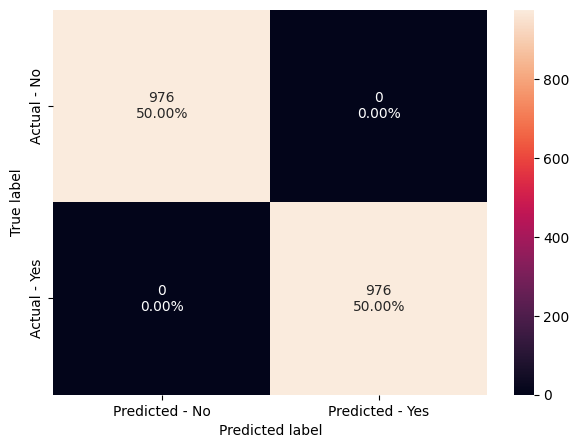

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
make_confusion_matrix(Adaboost_tuned, X_train_un, y_train_un)

In [ ]:
#model performance evaluation on val set
perf_ada_tuned_val_set = model_performance_classification_sklearn(Adaboost_tuned, X_val, y_val)
print("\n",'Model Performance on validation set',"\n")
perf_ada_tuned_val_set



 Model Performance on validation set 



Accuracy  Recall  Precision    F1
0     0.938   0.972      0.730 0.834

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

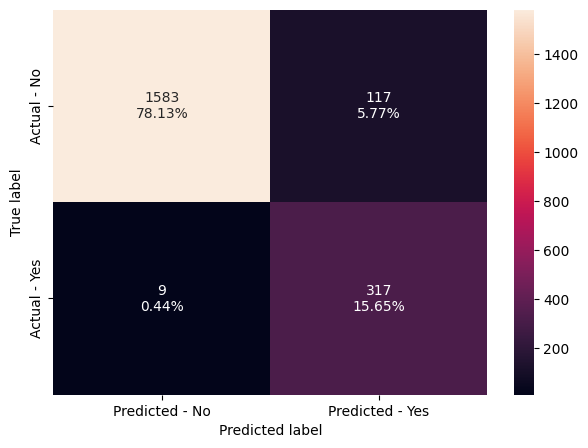

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
make_confusion_matrix(Adaboost_tuned, X_val, y_val)

#### **Tuning Gradient Boost**

In [ ]:
model_gbm = GradientBoostingClassifier(init = LogisticRegression(random_state=1, solver = 'newton-cg'), random_state=1)

# Parameter grid to pass in RandomizedSearchCV
# Grid of parameters to choose from
parameters = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(10,150,10),
    "subsample":np.arange(0.7,0.9,0.1),
    "max_features":np.arange(0.3,1,0.1),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],

}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=model_gbm,
    param_distributions=parameters,
    n_iter=40,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'subsample': 0.7999999999999999, 'n_estimators': 130, 'max_features': 0.9000000000000001, 'learning_rate': 0.2, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.9528623757195186:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#creating a new model with the tuned parameter
model_gbm_tuned =  GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                              subsample= 0.7999999999999999,
                                             n_estimators=130,
                                              max_features= 0.9000000000000001,
                                              learning_rate=0.2,
                                              random_state=1)
gboost_tuned = model_gbm_tuned.fit(X_train_un, y_train_un)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
perf_gboost_tuned_train_set = model_performance_classification_sklearn(gboost_tuned, X_train_un, y_train_un)
print("\n",'Model Performance on training set',"\n")
perf_gboost_tuned_train_set


 Model Performance on training set 



Accuracy  Recall  Precision    F1
0     0.998   1.000      0.996 0.998

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

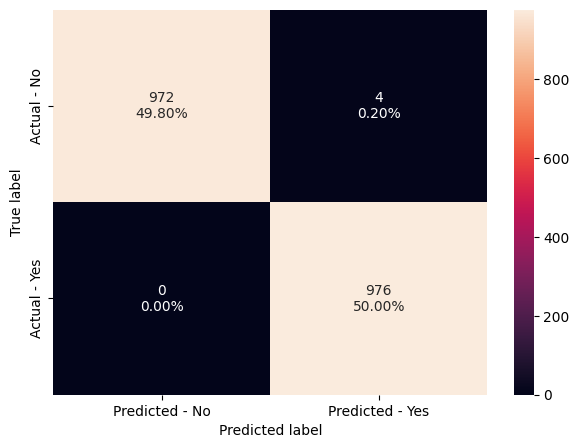

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
make_confusion_matrix(gboost_tuned, X_train_un, y_train_un)

In [ ]:
perf_gboost_tuned_val_set = model_performance_classification_sklearn(gboost_tuned, X_val, y_val)
print("\n",'Model Performance on validation set',"\n")
perf_gboost_tuned_val_set


 Model Performance on validation set 



Accuracy  Recall  Precision    F1
0     0.948   0.975      0.764 0.857

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

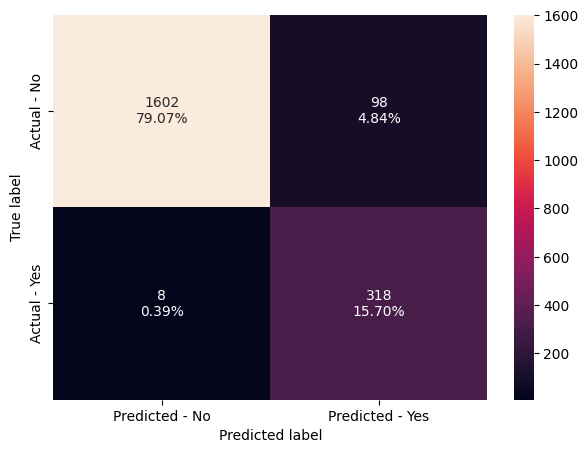

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
make_confusion_matrix(gboost_tuned,  X_val, y_val)

#### **Tuning XGBoost**

In [ ]:
model_xgboost = XGBClassifier(random_state=1, eval_metric='logloss')

# Parameter grid to pass in RandomizedSearchCV
# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(10,50,10),
    "scale_pos_weight":np.arange(1,5,1),
    "subsample":np.arange(0.3,1,0.1),
    "learning_rate":np.arange(0.05, 0.1,0.01),
    "colsample_bytree":np.arange(0.3,1,0.1),
    "colsample_bylevel":np.arange(0.3,0.9,0.1)
}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=model_xgboost,
    param_distributions=parameters,
    n_iter=40,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'subsample': 0.7000000000000002, 'scale_pos_weight': 2, 'n_estimators': 10, 'learning_rate': 0.07, 'colsample_bytree': 0.3, 'colsample_bylevel': 0.3} with CV score=1.0:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#creating a new model with the tuned parameter
model_xgboost_tuned =  XGBClassifier(subsample=0.7000000000000002, scale_pos_weight = 2,
                                             n_estimators= 10, learning_rat= 0.07,
                                             colsample_bytree= 0.3, colsample_bylevel= 0.3,
                                             random_state=1, eval_metric='logloss')
xgboost_tuned = model_xgboost_tuned.fit(X_train_un, y_train_un)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
perf_xgboost_tuned_train_set = model_performance_classification_sklearn(xgboost_tuned, X_train_un, y_train_un)
print("\n",'Model Performance on training set',"\n")
perf_xgboost_tuned_train_set


 Model Performance on training set 



Accuracy  Recall  Precision    F1
0     0.834   0.970      0.762 0.854

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

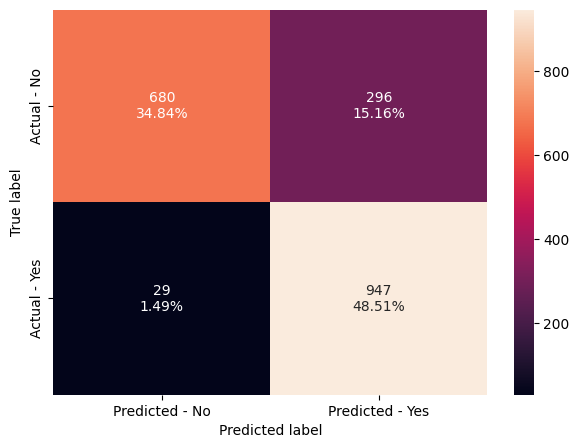

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
make_confusion_matrix(xgboost_tuned, X_train_un, y_train_un)

In [ ]:
perf_xgboost_tuned_val_set = model_performance_classification_sklearn(xgboost_tuned, X_val, y_val)
print("\n",'Model Performance on validation set',"\n")
perf_xgboost_tuned_val_set


 Model Performance on validation set 



Accuracy  Recall  Precision    F1
0     0.656   0.933      0.311 0.466

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

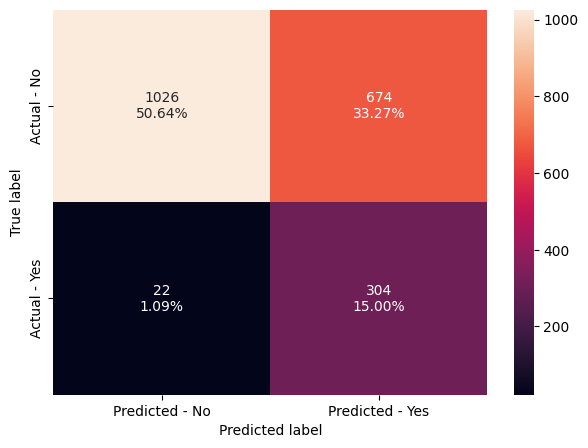

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
make_confusion_matrix(xgboost_tuned, X_val, y_val)

## Model Comparison and Final Model Selection

* Compare the model performance of tuned models - Choose the best model

In [ ]:
models_tuned = ['AdaBoost_tuned','Gradient Boost_tuned','XGBoost_tuned']

train_perf_tuned= pd.concat([
perf_ada_tuned_train_set,
perf_gboost_tuned_train_set,
perf_xgboost_tuned_train_set],axis=0)

train_perf_tuned['<= Training | Validation =>']=''

train_perf_tuned.set_index([pd.Index(models_tuned)], inplace=True)


val_perf_tuned = pd.concat([
perf_ada_tuned_val_set,
perf_gboost_tuned_val_set,
perf_xgboost_tuned_val_set],axis=0)

val_perf_tuned.set_index([pd.Index(models_tuned)], inplace=True)

print("Training performance VS Validation performance comparison with the best 3 models to tune:")

tuned_models = pd.concat([train_perf_tuned,val_perf_tuned],axis=1 )
tuned_models

Training performance VS Validation performance comparison with the best 3 models to tune:


Accuracy  Recall  Precision    F1  \
AdaBoost_tuned           1.000   1.000      1.000 1.000   
Gradient Boost_tuned     0.998   1.000      0.996 0.998   
XGBoost_tuned            0.834   0.970      0.762 0.854   

                     <= Training | Validation =>  Accuracy  Recall  Precision  \
AdaBoost_tuned                                       0.938   0.972      0.730   
Gradient Boost_tuned                                 0.948   0.975      0.764   
XGBoost_tuned                                        0.656   0.933      0.311   

                        F1  
AdaBoost_tuned       0.834  
Gradient Boost_tuned 0.857  
XGBoost_tuned        0.466

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

* Gradient boosting model trained with undersampled data has generalised performance, so let's consider it as the best model.

In [ ]:
# Let's check the performance on test set
gbm2_test = model_performance_classification_sklearn(gboost_tuned, X_test, y_test)
gbm2_test

Accuracy  Recall  Precision    F1
0     0.945   0.963      0.758 0.848

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

* **The model has given good performance on test set.**

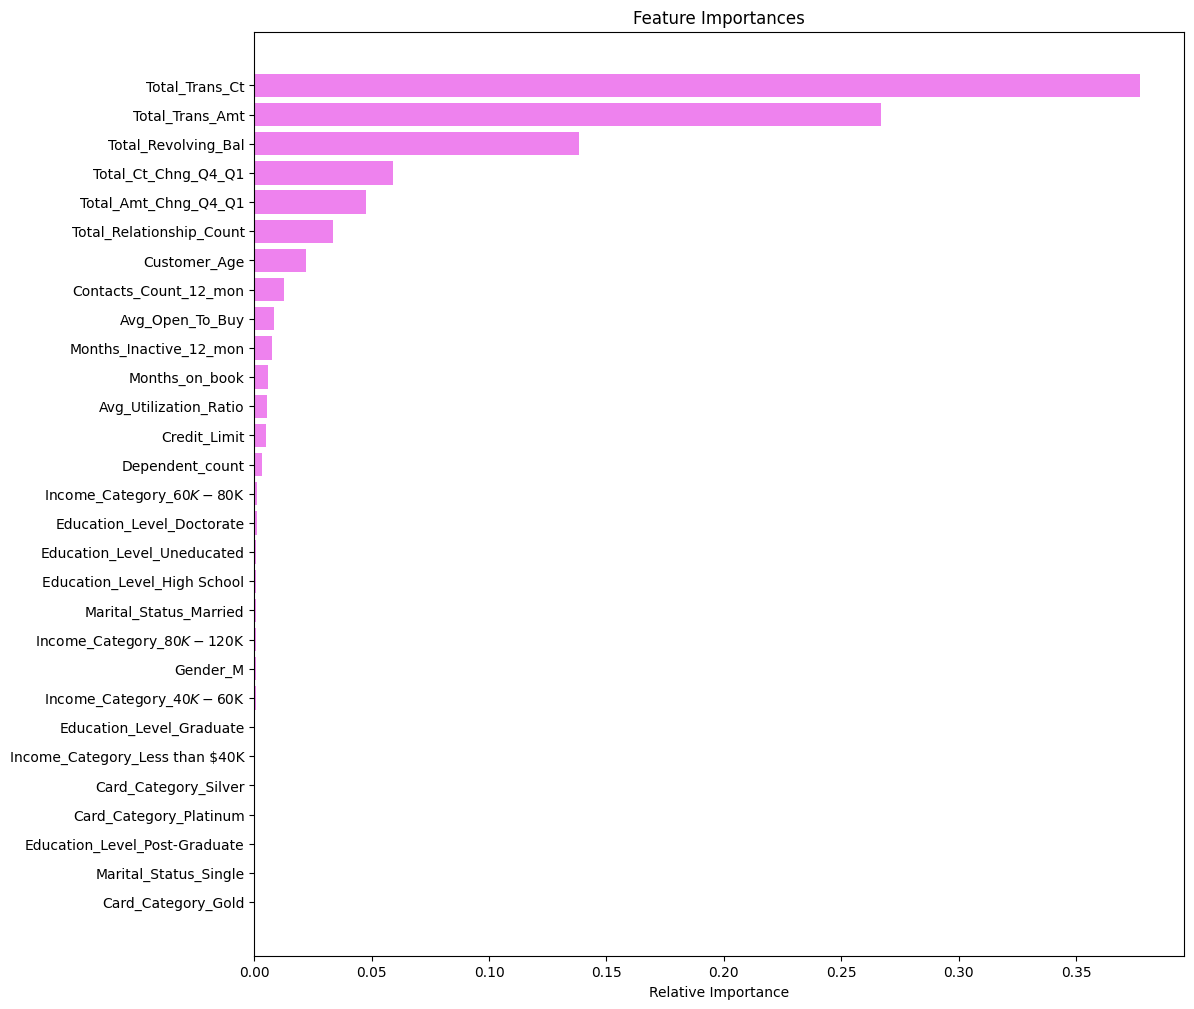

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
feature_names = X_train.columns
importances = gboost_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* **Total_Trans_Ct** is the most important variable in predicting credit card churn followed by
  * Total_Trans_Amt
  * Total_Revolving_Bal
  * Total_Ct_Chng_Q4_Q1
  * Total_Amt_Chng_Q4_Q1
  * Total_Relationship_Count

## Let's use Column Transformer to build the final model

* We will create 2 different pipelines, one for numerical columns and one for categorical columns
* For numerical columns, we will do missing value imputation as pre-processing
* For categorical columns, we will do one hot encoding and missing value imputation as pre-processing

* We are doing missing value imputation for the whole data, so that if there is any missing value in the data in future that can be taken care of.

In [ ]:
# creating a list of numerical variables
numerical_features = [
     'Customer_Age', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

# creating a transformer for numerical variables, which will apply simple imputer on the numerical variables
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median"))])


# creating a list of categorical variables
categorical_features = ['Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category']

# creating a transformer for categorical variables, which will first apply simple imputer and
#then do one hot encoding for categorical variables
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)
# handle_unknown = "ignore", allows model to handle any unknown category in the test data

# combining categorical transformer and numerical transformer using a column transformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder="drop",
)
# remainder = "drop" has been used, it will drop the variables that are not present in "numerical_features"
# and "categorical_features"

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
churn = df.copy()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Separating target variable and other variables
X = churn.drop(columns="Attrition_Flag")
Y = churn["Attrition_Flag"]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

* **pre-processing**

In [ ]:
# CLIENTNUM consists of uniques ID for clients and hence will not add value to the modeling
X.drop(["CLIENTNUM"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
X["Income_Category"].replace("abc", np.nan, inplace=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
## Encoding Existing and Attrited customers to 0 and 1 respectively, for analysis.
Y.replace("Existing Customer", 0, inplace=True)
Y.replace("Attrited Customer", 1, inplace=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

* We already selected the best model to process with, so  no need to divide data into 3 parts

In [ ]:
# Splitting the data into train and test sets
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)
print(X_train_final.shape, X_test_final.shape)

(7088, 19) (3039, 19)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Creating new pipeline with best parameters
model = Pipeline(
    steps=[
        ("pre", preprocessor),
        (
            "GBM",
            GradientBoostingClassifier(
                random_state=1,
                subsample=0.7999999999999999,
                n_estimators=130,
                max_features=0.9000000000000001,
                learning_rate=0.2,
                init=AdaBoostClassifier(random_state=1),
            ),
        ),
    ]
)
# Fit the model on training data
model.fit(X_train_final, y_train_final)


Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Customer_Age',
                                                   'Months_on_book',
                                                   'Total_Relationship_Count',
                                                   'Months_Inactive_12_mon',
                                                   'Contacts_Count_12_mon',
                                                   'Credit_Limit',
                                                   'Total_Revolving_Bal',
                                                   'Avg_Open_To_Buy',
                                                   'Total_Amt_Chng_Q4_Q1',
                                                   'Total_Trans_Amt',
                                                   'Total_Trans_Ct',
                                                   'To...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Dependent_count',
                                                   'Education_Level',
                                                   'Marital_Status',
                                                   'Income_Category',
                                                   'Card_Category'])])),
                ('GBM',
                 GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                            learning_rate=0.2,
                                            max_features=0.9000000000000001,
                                            n_estimators=130, random_state=1,
                                            subsample=0.7999999999999999))])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#model performance evaluation on training set
final_train_set =  model_performance_classification_sklearn(model, X_train_final, y_train_final)
print("\n",'Model Performance on final training set',"\n")
final_train_set


 Model Performance on final training set 



Accuracy  Recall  Precision    F1
0     0.990   0.960      0.979 0.969

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

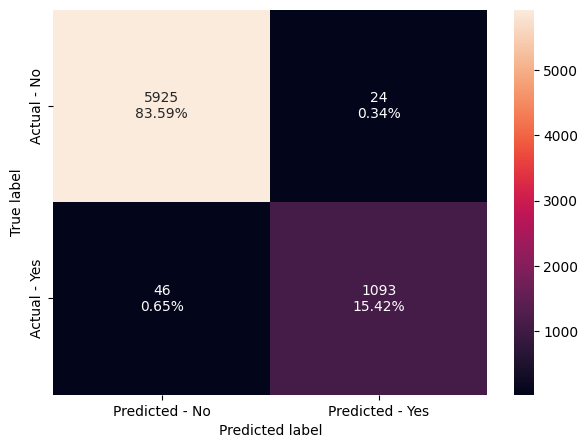

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
make_confusion_matrix(model,X_train_final, y_train_final)

In [ ]:
#model performance evaluation on training set
final_test_set =  model_performance_classification_sklearn(model, X_test_final, y_test_final)
print("\n",'Model Performance on final test set',"\n")
final_test_set


 Model Performance on final test set 



Accuracy  Recall  Precision    F1
0     0.977   0.908      0.947 0.927

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

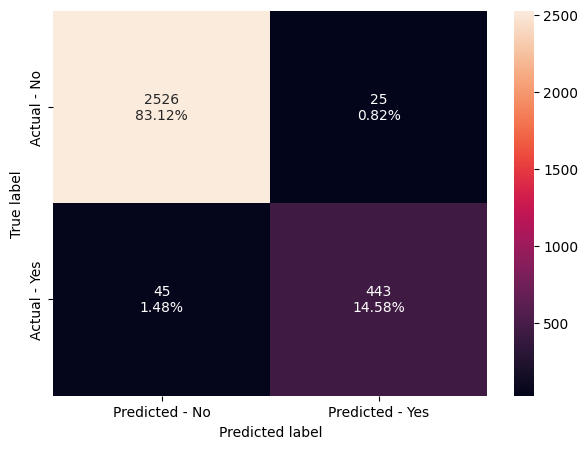

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
make_confusion_matrix(model,X_test_final, y_test_final)

* The final recall observed on the test set is very good.
* Recall observed on Test set 90.8%

# Business Insights and Conclusions

### Business insights: ##
* The Analysis shows the below common characteristics among customers:
  * 16.1% of the customers as Attrited and 83.9% as existing
  * 53% of the client base are females
  * 93% carry the Blue card
  * 35% belong to the Income_category less than USD 40K
  * 46% of customers are married
  * 30% are graduates
  * The Credit_Limit and Avg_Open_To_Buy variables are very strongy correlated
  * The Total_Trans_Amt and Total_Trans_Ct variables are strongly correlated
  * **Factors that drive the attrition -** Total_Trans_Ct, Total_Revolving_Bal, Total_Trans_Amt, Total_Relationship_Count
  * Less number of transactions in a year leads to attrition of a customer
    * **Explore Distribution:** Examine the distribution of the "Total Transaction Count" for both churned and non-churned customers. This can help identify patterns and differences in behavior.
    * **Communication Strategies:** Tailor communication and retention strategies based on transaction behavior. For example, customers with declining transaction counts might benefit from targeted offers or engagement campaigns.
  * Less number of transactions can lead to less transaction amount and eventually leads to customer attrition
  * Customers with less total revolving balance are the ones who attrited
    * **Threshold Analysis:** Explore whether certain thresholds of revolving balances are linked to a higher likelihood of attrition.
Customer Behavior Analysis: Explore why customers with specific revolving balances might be more prone to attrition. Are there patterns in spending behavior or credit utilization that contribute to churn?
  * Attrition is highest among the customers who are using 1 or 2 products offered by the bank
    * **Product Bundling:** Explore the possibility of bundling or cross-selling additional products to customers with 1 or 2 existing products. This strategy aims to increase the number of products each customer holds, potentially reducing attrition by enhancing their overall engagement with the bank.

    * **Targeted Marketing:** Implement targeted marketing campaigns specifically designed for customers with 1 or 2 products. Promote the benefits of additional products, discounts, or exclusive offers to encourage them to expand their product portfolio.




### Conclusion ##
The model is also giving a strong preditcion on the existing customers, this can be utilized to explore closely the existing customers and the services they are satisfied with and enhancing them as a measure of strengthening the relationship and avoiding less to chrun in the future.

### Recommendations for the Bank: ##
* **Retention Programs:** Implement targeted customer retention programs, especially focused on those customers who exhibit signs of attrition. Offer personalized incentives, discounts, or loyalty rewards to encourage them to stay.

* **Feedback Mechanisms:** Establish effective feedback mechanisms to understand the reasons behind attrition. Conduct surveys or feedback sessions to gather insights into customer concerns and expectations. Use this information to make improvements.

* **Product Customization:** Offer customizable credit card solutions based on individual customer preferences and spending patterns. Tailoring products to match specific needs can increase customer satisfaction and loyalty.

* **Digital Enhancements:** Invest in digital platforms and technologies to provide a seamless and convenient credit card experience. Mobile apps, online account management, and digital payment options can enhance customer satisfaction.

* **Risk Management Strategies:** Develop strategies to manage credit risk effectively, ensuring that credit limits and terms are aligned with customers' financial capabilities. This can minimize defaults and contribute to long-term customer relationships.

* **Cross-Selling Opportunities:** Identify opportunities for cross-selling additional banking products or services to credit card customers. Bundling financial products can deepen customer relationships and increase retention.

* **Continuous Monitoring:** Implement a system for continuous monitoring of customer behavior, transaction patterns, and satisfaction levels. Timely intervention based on real-time data can prevent attrition.